# OBJECTIVES
From the Nigerian Stocks Exchange market that this dataset was gotten, for use by MOLTEN TRUST. This expected data requires a Machine Learning Time Series approach to **analyse** and **forecast** future events based on the data. Therefore, this requires a long-array of task/steps to achieve our goals.

### PROJECT GOALS
<ul>
     <li>
          <strong>WHAT IS THE GOAL OF THE ANALYSIS?</strong>
          <br>
          The goal of the <em>analysis</em> is to;
          <br>
          <ul>
               <li>determine what stocks are doing well over the years</li>
               <li>the high and low of each stocks</li>
               <li>what stocks have been good previously and doing poorly recently, i.e how they perform over time</li> <br>
          </ul>
     </li>
</ul>
<ul>
     <li>
          <strong>WHAT IS THE GOAL OF THE FORECASTING?</strong>
          <br>
          The goal of the <em>forecasting</em> is to predict;
          <br>
          <ul>
               <li>he <strong><em>closeprice</em></strong> for the next 10months, 1 year, 2 years, 3 years maybe!</li>
               <li>the <strong><em>PERatio</em></strong> for the next ...........................................</li>
          </ul>
     </li>
<ul>


The objectives of this project includes the machine learning for time series analysis and forecasting end-to-end pipeline stages, processing and model building steps;

0. Data Ingestion
1. Data Preprocessing
2. Data Exploration
3. Data Visualization
4. Time Series Analysis Techniques
5. Feature Engineering
6. Model Selection and Building
7. Model Evaluation
8. Forecasting
9. Sector-wise Analysis
10. Risk Assessment

# 0. DATA INGESTION

## * installing and importing python libraries

In [1]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [2]:
# !pip install statsmodels --verbose

vermos

In [1]:
import numpy as np
import pandas as pd

import math
import random

import seaborn as sns
sns.set_style('darkgrid')

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf

from statsmodels.tsa.arima.model import ARIMA

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, DateFormatter
import matplotlib.dates as mdates

from scipy import stats
from scipy.stats import norm

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

import warnings
# warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

/home/lordmax/.virtualenvs/jupyterworld/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### testing prophet model

In [2]:
# `df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
# df.head()

In [3]:
# m = Prophet()
# m.fit(df)

In [4]:
# future = m.make_future_dataframe(periods=365)
# future.tail()

In [5]:
# forecast = m.predict(future)
# forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [8]:
# fig1 = m.plot(forecast)

In [9]:
# fig2 = m.plot_components(forecast)

In [10]:
# plot_plotly(m, forecast)

In [11]:
# plot_components_plotly(m, forecast)

## ** load the data

In [2]:
# datapath = '/content/gdrive/MyDrive/Molten Trust Limited/stock market time series data/Stock Market Time Series Data from 2003 to 2023.csv'
datapath = '../datasets/Stock Market Time Series Data from 2003 to 2023.csv'

In [3]:
tsdata = pd.read_csv(datapath, parse_dates=['DATE'], index_col='DATE')

## *** understand the data properties

In [4]:
tsdata.shape

(952405, 12)

In [5]:
tsdata.columns

Index(['SYMBOL', 'NAME', 'CLOSEPRICE', 'Volume', 'Value', 'NoOfTransaction',
       'OpenPrice', 'Low', 'High', 'EPS', 'PERatio', 'SECTOR'],
      dtype='object')

In [6]:
print(tsdata.SYMBOL.nunique())

317


# 1-2. DATA PREPROCESSING AND EXPLORATION
  * check & handle missing values
  * understanding the data with plots; time series of randomly selected stocks
  * descriptive analysis
  * correlation between stocks

## * overview

In [7]:
tsdata

SYMBOL                      NAME  CLOSEPRICE      Volume  \
DATE                                                                       
2003-01-03         7UP  7-UP BOTTLING COMP. PLC.        6.00     29300.0   
2003-01-06         7UP  7-UP BOTTLING COMP. PLC.        5.80     58010.0   
2003-01-07         7UP  7-UP BOTTLING COMP. PLC.        6.00     34550.0   
2003-01-08         7UP  7-UP BOTTLING COMP. PLC.        5.97     16013.0   
2003-01-09         7UP  7-UP BOTTLING COMP. PLC.        5.87     29812.0   
...                ...                       ...         ...         ...   
2023-02-22  ZENITHBANK           ZENITH BANK PLC       25.20  13000968.0   
2023-02-23  ZENITHBANK           ZENITH BANK PLC       25.35  11525976.0   
2023-02-24  ZENITHBANK           ZENITH BANK PLC       25.75   8129969.0   
2023-02-27  ZENITHBANK           ZENITH BANK PLC       25.95   7953025.0   
2023-02-28  ZENITHBANK           ZENITH BANK PLC       26.50  34247198.0   

                   Value  NoOfTransaction  OpenPrice    Low   High        EPS  \
DATE                                                                            
2003-01-03  1.753140e+05             11.0       0.00    NaN    NaN   3.510000   
2003-01-06  3.378608e+05              7.0       0.00    NaN    NaN   3.510000   
2003-01-07  2.070690e+05             12.0       0.00    NaN    NaN   3.510000   
2003-01-08  9.562535e+04             12.0       0.00    NaN    NaN   3.510000   
2003-01-09  1.764836e+05             13.0       0.00    NaN    NaN   3.510000   
...                  ...              ...        ...    ...    ...        ...   
2023-02-22  3.261339e+08            212.0      25.00  25.00  25.20  13.303581   
2023-02-23  2.921314e+08            199.0      25.20  25.30  25.40  13.303581   
2023-02-24  2.066553e+08            167.0      25.35  25.35  25.75  13.303581   
2023-02-27  2.055500e+08            193.0      25.75  25.65  26.00  13.303581   
2023-02-28  9.075359e+08            350.0      25.95  26.00  27.00  13.303581   

             PERatio              SECTOR  
DATE                                      
2003-01-03  1.709402      CONSUMER GOODS  
2003-01-06  1.652422      CONSUMER GOODS  
2003-01-07  1.709402      CONSUMER GOODS  
2003-01-08  1.700855      CONSUMER GOODS  
2003-01-09  1.672365      CONSUMER GOODS  
...              ...                 ...  
2023-02-22  1.894227  FINANCIAL SERVICES  
2023-02-23  1.905502  FINANCIAL SERVICES  
2023-02-24  1.935569  FINANCIAL SERVICES  
2023-02-27  1.950603  FINANCIAL SERVICES  
2023-02-28  1.991945  FINANCIAL SERVICES  

[952405 rows x 12 columns]

In [14]:
tsdata.isna().sum()

SYMBOL                  0
NAME                    0
CLOSEPRICE              5
Volume                  0
Value              254598
NoOfTransaction    248546
OpenPrice               0
Low                693808
High               693807
EPS                 56056
PERatio                 0
SECTOR                  0
dtype: int64

make a **copy** of the original data; the copy will be analyzed throughout the whole process

In [15]:
# make a copy of the original time series data
tsdata_copy = tsdata.copy()

# drop columns "High" and "Low" from the copy data
tsdata_copy.drop(columns=['Low', 'High'], inplace=True)
tsdata_copy.head()

SYMBOL                      NAME  CLOSEPRICE   Volume      Value  \
DATE                                                                          
2003-01-03    7UP  7-UP BOTTLING COMP. PLC.        6.00  29300.0  175314.00   
2003-01-06    7UP  7-UP BOTTLING COMP. PLC.        5.80  58010.0  337860.80   
2003-01-07    7UP  7-UP BOTTLING COMP. PLC.        6.00  34550.0  207069.00   
2003-01-08    7UP  7-UP BOTTLING COMP. PLC.        5.97  16013.0   95625.35   
2003-01-09    7UP  7-UP BOTTLING COMP. PLC.        5.87  29812.0  176483.64   

            NoOfTransaction  OpenPrice   EPS   PERatio          SECTOR  
DATE                                                                    
2003-01-03             11.0        0.0  3.51  1.709402  CONSUMER GOODS  
2003-01-06              7.0        0.0  3.51  1.652422  CONSUMER GOODS  
2003-01-07             12.0        0.0  3.51  1.709402  CONSUMER GOODS  
2003-01-08             12.0        0.0  3.51  1.700855  CONSUMER GOODS  
2003-01-09             13.0        0.0  3.51  1.672365  CONSUMER GOODS

In [16]:
tsdata_copy.shape

(952405, 10)

In [17]:
print(tsdata_copy.dtypes)

SYMBOL              object
NAME                object
CLOSEPRICE         float64
Volume             float64
Value              float64
NoOfTransaction    float64
OpenPrice          float64
EPS                float64
PERatio            float64
SECTOR              object
dtype: object


## ** cleaning, checking and handling missing values

In [18]:
tsdata_copy.isna().sum()

SYMBOL                  0
NAME                    0
CLOSEPRICE              5
Volume                  0
Value              254598
NoOfTransaction    248546
OpenPrice               0
EPS                 56056
PERatio                 0
SECTOR                  0
dtype: int64

the missing values columns are `CLOSEPRICE`, `Value`, `NoOfTransaction` and `EPS`

## *** descriptive analysis

In [19]:
tsdata_copy.describe()

CLOSEPRICE        Volume         Value  NoOfTransaction  \
count  952400.000000  9.524050e+05  6.978070e+05    703859.000000   
mean       32.691054  1.748262e+06  2.548796e+07        37.803723   
std       296.019186  1.896733e+07  2.025416e+08       152.794370   
min         0.000000  0.000000e+00  0.000000e+00         0.000000   
25%         0.610000  0.000000e+00  4.240000e+02         1.000000   
50%         2.230000  3.091000e+03  2.414220e+05         7.000000   
75%         7.870000  2.953000e+05  4.488236e+06        32.000000   
max      7634.150000  6.767899e+09  4.596086e+10     82287.000000   

           OpenPrice            EPS        PERatio  
count  952405.000000  896349.000000  952405.000000  
mean        9.003340       2.337381      22.343826  
std        74.993298      38.121579     438.933748  
min         0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000  
50%         0.000000       0.110000       4.772727  
75%         0.210000       0.638091      14.387981  
max      2040.000000    2139.910000   26533.018868

### (i) 'closeprice' missing values
filling the missing values of the `CLOSEPRICE` with 0

In [20]:
tsdata_copy[tsdata_copy['CLOSEPRICE'].isna()]

SYMBOL                        NAME  CLOSEPRICE  Volume  Value  \
DATE                                                                          
2021-06-10    CAPOIL             CAPITAL OIL PLC         NaN     0.0    0.0   
2023-02-09    CAPOIL             CAPITAL OIL PLC         NaN     0.0    0.0   
2023-02-09      JULI                   JULI PLC.         NaN     0.0    0.0   
2023-02-09  RAKUNITY   RAK UNITY PET. COMP. PLC.         NaN     0.0    0.0   
2023-02-09   SMURFIT  SMART PRODUCTS NIGERIA PLC         NaN     0.0    0.0   

            NoOfTransaction  OpenPrice  EPS  PERatio                    SECTOR  
DATE                                                                            
2021-06-10              0.0       0.20  NaN      0.0               OIL AND GAS  
2023-02-09              0.0       0.20  NaN      0.0               OIL AND GAS  
2023-02-09              0.0       0.79  NaN      0.0                  SERVICES  
2023-02-09              0.0       0.30  NaN      0.0               OIL AND GAS  
2023-02-09              0.0       0.22  NaN      0.0  CONSTRUCTION/REAL ESTATE

In [21]:
tsdata_copy['CLOSEPRICE'].fillna(0, inplace = True)

In [22]:
tsdata_copy.isnull().sum()

SYMBOL                  0
NAME                    0
CLOSEPRICE              0
Volume                  0
Value              254598
NoOfTransaction    248546
OpenPrice               0
EPS                 56056
PERatio                 0
SECTOR                  0
dtype: int64

### (ii) 'value' and 'nooftransaction' missing values

filling with interpolation

In [23]:
# Value
print(tsdata_copy["Value"].isna().sum())
tsdata_copy[tsdata_copy["Value"].isna()]

254598


SYMBOL                      NAME  CLOSEPRICE      Volume  \
DATE                                                                       
2003-07-07         7UP  7-UP BOTTLING COMP. PLC.        9.25         0.0   
2003-01-02      ABATEX    ABA TEXTILE MILLS PLC.        0.91         0.0   
2003-01-03      ABATEX    ABA TEXTILE MILLS PLC.        0.91         0.0   
2003-01-06      ABATEX    ABA TEXTILE MILLS PLC.        0.91         0.0   
2003-01-07      ABATEX    ABA TEXTILE MILLS PLC.        0.91         0.0   
...                ...                       ...         ...         ...   
2018-07-18    WEMABANK            WEMA BANK PLC.        0.62   2009628.0   
2018-07-16  ZENITHBANK           ZENITH BANK PLC       23.95  16614440.0   
2018-07-17  ZENITHBANK           ZENITH BANK PLC       23.80  15424268.0   
2018-07-18  ZENITHBANK           ZENITH BANK PLC       23.95  15145318.0   
2022-10-04      GEREGU          GEREGU POWER PLC      100.00         0.0   

            Value  NoOfTransaction  OpenPrice       EPS    PERatio  \
DATE                                                                 
2003-07-07    NaN              NaN       0.00  3.050000   3.032787   
2003-01-02    NaN              NaN       0.00  0.000000   0.000000   
2003-01-03    NaN              NaN       0.00  0.000000   0.000000   
2003-01-06    NaN              NaN       0.00  0.000000   0.000000   
2003-01-07    NaN              NaN       0.00  0.000000   0.000000   
...           ...              ...        ...       ...        ...   
2018-07-18    NaN             45.0       0.68  0.039647  15.638005   
2018-07-16    NaN            271.0      24.00  3.300000   7.257575   
2018-07-17    NaN            293.0      23.95  3.300000   7.212121   
2018-07-18    NaN            322.0      23.80  3.300000   7.257575   
2022-10-04    NaN              NaN       0.00       NaN   0.000000   

                        SECTOR  
DATE                            
2003-07-07      CONSUMER GOODS  
2003-01-02      CONSUMER GOODS  
2003-01-03      CONSUMER GOODS  
2003-01-06      CONSUMER GOODS  
2003-01-07      CONSUMER GOODS  
...                        ...  
2018-07-18  FINANCIAL SERVICES  
2018-07-16  FINANCIAL SERVICES  
2018-07-17  FINANCIAL SERVICES  
2018-07-18  FINANCIAL SERVICES  
2022-10-04           UTILITIES  

[254598 rows x 10 columns]

In [24]:
# NoOfTransaction
print(tsdata_copy["NoOfTransaction"].isna().sum())
tsdata_copy[tsdata_copy["NoOfTransaction"].isna()]

248546


SYMBOL                                      NAME  CLOSEPRICE  \
DATE                                                                           
2003-07-07         7UP                  7-UP BOTTLING COMP. PLC.        9.25   
2003-01-02      ABATEX                    ABA TEXTILE MILLS PLC.        0.91   
2003-01-03      ABATEX                    ABA TEXTILE MILLS PLC.        0.91   
2003-01-06      ABATEX                    ABA TEXTILE MILLS PLC.        0.91   
2003-01-07      ABATEX                    ABA TEXTILE MILLS PLC.        0.91   
...                ...                                       ...         ...   
2021-08-17     UNHOMES        UNION HOMES SAVINGS AND LOANS PLC.        3.02   
2021-08-17    UNIONDAC  UNION DIAGNOSTIC & CLINICAL SERVICES PLC        0.28   
2021-08-17  UNIONDICON                     UNION DICON SALT PLC.        9.90   
2021-08-17     VANLEER                         GREIF NIGERIA PLC        6.05   
2022-10-04      GEREGU                          GEREGU POWER PLC      100.00   

            Volume  Value  NoOfTransaction  OpenPrice       EPS   PERatio  \
DATE                                                                        
2003-07-07     0.0    NaN              NaN       0.00  3.050000  3.032787   
2003-01-02     0.0    NaN              NaN       0.00  0.000000  0.000000   
2003-01-03     0.0    NaN              NaN       0.00  0.000000  0.000000   
2003-01-06     0.0    NaN              NaN       0.00  0.000000  0.000000   
2003-01-07     0.0    NaN              NaN       0.00  0.000000  0.000000   
...            ...    ...              ...        ...       ...       ...   
2021-08-17     0.0    0.0              NaN       3.02  0.000000  0.000000   
2021-08-17     0.0    0.0              NaN       0.28  0.102687  2.726733   
2021-08-17     0.0    0.0              NaN       9.90  0.000000  0.000000   
2021-08-17     0.0    0.0              NaN       6.05  0.000000  0.000000   
2022-10-04     0.0    NaN              NaN       0.00       NaN  0.000000   

                        SECTOR  
DATE                            
2003-07-07      CONSUMER GOODS  
2003-01-02      CONSUMER GOODS  
2003-01-03      CONSUMER GOODS  
2003-01-06      CONSUMER GOODS  
2003-01-07      CONSUMER GOODS  
...                        ...  
2021-08-17  FINANCIAL SERVICES  
2021-08-17          HEALTHCARE  
2021-08-17      CONSUMER GOODS  
2021-08-17    INDUSTRIAL GOODS  
2022-10-04           UTILITIES  

[248546 rows x 10 columns]

**Method:** ----- `Using time-based linear interpolation`

`Value`

In [25]:
tsdata_copy['Value'] = tsdata_copy['Value'].interpolate(method = 'time')
print(tsdata_copy["Value"].isna().sum())

0


`NoOfTransaction`

In [26]:
tsdata_copy['NoOfTransaction'] = tsdata_copy['NoOfTransaction'].interpolate(method = 'time')
print(tsdata_copy["NoOfTransaction"].isna().sum())

0


In [27]:
tsdata_copy.isnull().sum()

SYMBOL                 0
NAME                   0
CLOSEPRICE             0
Volume                 0
Value                  0
NoOfTransaction        0
OpenPrice              0
EPS                56056
PERatio                0
SECTOR                 0
dtype: int64

### (iii) 'eps' missing values

filling with mean imputation

In [28]:
# NoOfTransaction
print(tsdata_copy["EPS"].isna().sum())
tsdata_copy[tsdata_copy["EPS"].isna()]

56056


SYMBOL                           NAME  CLOSEPRICE  Volume  \
DATE                                                                      
2003-01-02    AFROIL                     AFROIL PLC        0.25     0.0   
2003-01-03    AFROIL                     AFROIL PLC        0.25     0.0   
2003-01-06    AFROIL                     AFROIL PLC        0.25     0.0   
2003-01-07    AFROIL                     AFROIL PLC        0.25     0.0   
2003-01-08    AFROIL                     AFROIL PLC        0.25     0.0   
...              ...                            ...         ...     ...   
2023-02-23  RONCHESS  RONCHESS GLOBAL RESOURCES PLC       81.00     0.0   
2023-02-24  RONCHESS  RONCHESS GLOBAL RESOURCES PLC       81.00     0.0   
2023-02-27  RONCHESS  RONCHESS GLOBAL RESOURCES PLC       81.00     0.0   
2023-02-28  RONCHESS  RONCHESS GLOBAL RESOURCES PLC       81.00     0.0   
2023-02-09   SMURFIT     SMART PRODUCTS NIGERIA PLC        0.00     0.0   

                Value  NoOfTransaction  OpenPrice  EPS  PERatio  \
DATE                                                              
2003-01-02   42000.00              7.0       0.00  NaN      0.0   
2003-01-03    1660.00              1.0       0.00  NaN      0.0   
2003-01-06  346284.45              8.0       0.00  NaN      0.0   
2003-01-07     500.00              7.0       0.00  NaN      0.0   
2003-01-08    1080.00             15.0       0.00  NaN      0.0   
...               ...              ...        ...  ...      ...   
2023-02-23       0.00              0.0      81.00  NaN      0.0   
2023-02-24       0.00              0.0      81.00  NaN      0.0   
2023-02-27       0.00              0.0      81.00  NaN      0.0   
2023-02-28       0.00              0.0      81.00  NaN      0.0   
2023-02-09       0.00              0.0       0.22  NaN      0.0   

                              SECTOR  
DATE                                  
2003-01-02               OIL AND GAS  
2003-01-03               OIL AND GAS  
2003-01-06               OIL AND GAS  
2003-01-07               OIL AND GAS  
2003-01-08               OIL AND GAS  
...                              ...  
2023-02-23  CONSTRUCTION/REAL ESTATE  
2023-02-24  CONSTRUCTION/REAL ESTATE  
2023-02-27  CONSTRUCTION/REAL ESTATE  
2023-02-28  CONSTRUCTION/REAL ESTATE  
2023-02-09  CONSTRUCTION/REAL ESTATE  

[56056 rows x 10 columns]

In [29]:
tsdata_copy['EPS'].fillna(tsdata_copy.EPS.mean(), inplace=True)

In [30]:
tsdata_copy.isnull().sum()

SYMBOL             0
NAME               0
CLOSEPRICE         0
Volume             0
Value              0
NoOfTransaction    0
OpenPrice          0
EPS                0
PERatio            0
SECTOR             0
dtype: int64

### (iv) remove `NAME` column

In [31]:
del tsdata_copy['NAME']

In [32]:
tsdata_copy.head()

SYMBOL  CLOSEPRICE   Volume      Value  NoOfTransaction  OpenPrice  \
DATE                                                                            
2003-01-03    7UP        6.00  29300.0  175314.00             11.0        0.0   
2003-01-06    7UP        5.80  58010.0  337860.80              7.0        0.0   
2003-01-07    7UP        6.00  34550.0  207069.00             12.0        0.0   
2003-01-08    7UP        5.97  16013.0   95625.35             12.0        0.0   
2003-01-09    7UP        5.87  29812.0  176483.64             13.0        0.0   

             EPS   PERatio          SECTOR  
DATE                                        
2003-01-03  3.51  1.709402  CONSUMER GOODS  
2003-01-06  3.51  1.652422  CONSUMER GOODS  
2003-01-07  3.51  1.709402  CONSUMER GOODS  
2003-01-08  3.51  1.700855  CONSUMER GOODS  
2003-01-09  3.51  1.672365  CONSUMER GOODS

In [33]:
tsdata_copy.shape

(952405, 9)

duplicated values

In [34]:
duplicates = tsdata_copy.index.duplicated(keep=False)
duplicated_rows = tsdata_copy[duplicates]
duplicated_rows

SYMBOL  CLOSEPRICE      Volume         Value  NoOfTransaction  \
DATE                                                                            
2003-01-03         7UP        6.00     29300.0  1.753140e+05             11.0   
2003-01-06         7UP        5.80     58010.0  3.378608e+05              7.0   
2003-01-07         7UP        6.00     34550.0  2.070690e+05             12.0   
2003-01-08         7UP        5.97     16013.0  9.562535e+04             12.0   
2003-01-09         7UP        5.87     29812.0  1.764836e+05             13.0   
...                ...         ...         ...           ...              ...   
2023-02-22  ZENITHBANK       25.20  13000968.0  3.261339e+08            212.0   
2023-02-23  ZENITHBANK       25.35  11525976.0  2.921314e+08            199.0   
2023-02-24  ZENITHBANK       25.75   8129969.0  2.066553e+08            167.0   
2023-02-27  ZENITHBANK       25.95   7953025.0  2.055500e+08            193.0   
2023-02-28  ZENITHBANK       26.50  34247198.0  9.075359e+08            350.0   

            OpenPrice        EPS   PERatio              SECTOR  
DATE                                                            
2003-01-03       0.00   3.510000  1.709402      CONSUMER GOODS  
2003-01-06       0.00   3.510000  1.652422      CONSUMER GOODS  
2003-01-07       0.00   3.510000  1.709402      CONSUMER GOODS  
2003-01-08       0.00   3.510000  1.700855      CONSUMER GOODS  
2003-01-09       0.00   3.510000  1.672365      CONSUMER GOODS  
...               ...        ...       ...                 ...  
2023-02-22      25.00  13.303581  1.894227  FINANCIAL SERVICES  
2023-02-23      25.20  13.303581  1.905502  FINANCIAL SERVICES  
2023-02-24      25.35  13.303581  1.935569  FINANCIAL SERVICES  
2023-02-27      25.75  13.303581  1.950603  FINANCIAL SERVICES  
2023-02-28      25.95  13.303581  1.991945  FINANCIAL SERVICES  

[952405 rows x 9 columns]

In [36]:
tsdata_copy.to_csv('cleaned_stock_market_data.csv', index=True)

## **** understanding data plots of randomly selected stocks

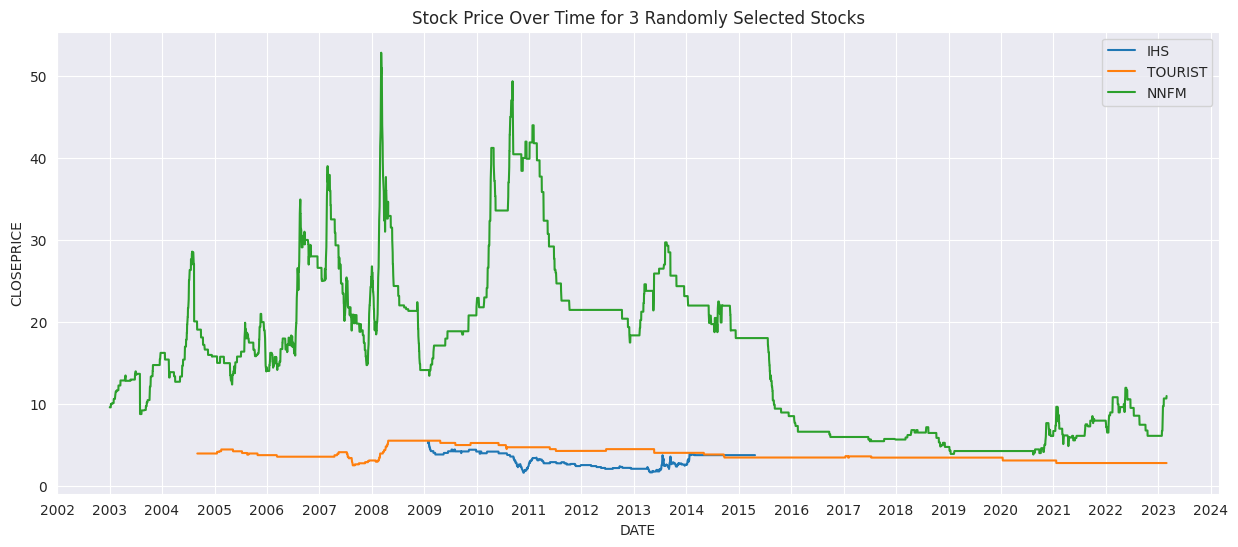

In [40]:
# plot 3 random data from symbol
unique_symbols = tsdata_copy['SYMBOL'].unique()
selected_symbols = np.random.choice(unique_symbols, size=3, replace=False)

# filter to include only rows of the selected symbols values
selected_data = tsdata_copy[tsdata_copy['SYMBOL'].isin(selected_symbols)]

# Plot the visualization based on the index date
plt.figure(figsize=(15, 6))

for symbol in selected_symbols:
    plt.plot(selected_data[selected_data['SYMBOL'] == symbol].index,
             selected_data[selected_data['SYMBOL'] == symbol]['CLOSEPRICE'],
             label=symbol)

# Customize x-axis to display only the years from 2003 to 2023
years = YearLocator()
date_format = DateFormatter('%Y')
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(date_format)

plt.xlabel('DATE')
plt.ylabel('CLOSEPRICE')
plt.title('Stock Price Over Time for 3 Randomly Selected Stocks')
plt.legend()
plt.show()

Taking the data of a single stock and plotting it below for a more clearer view

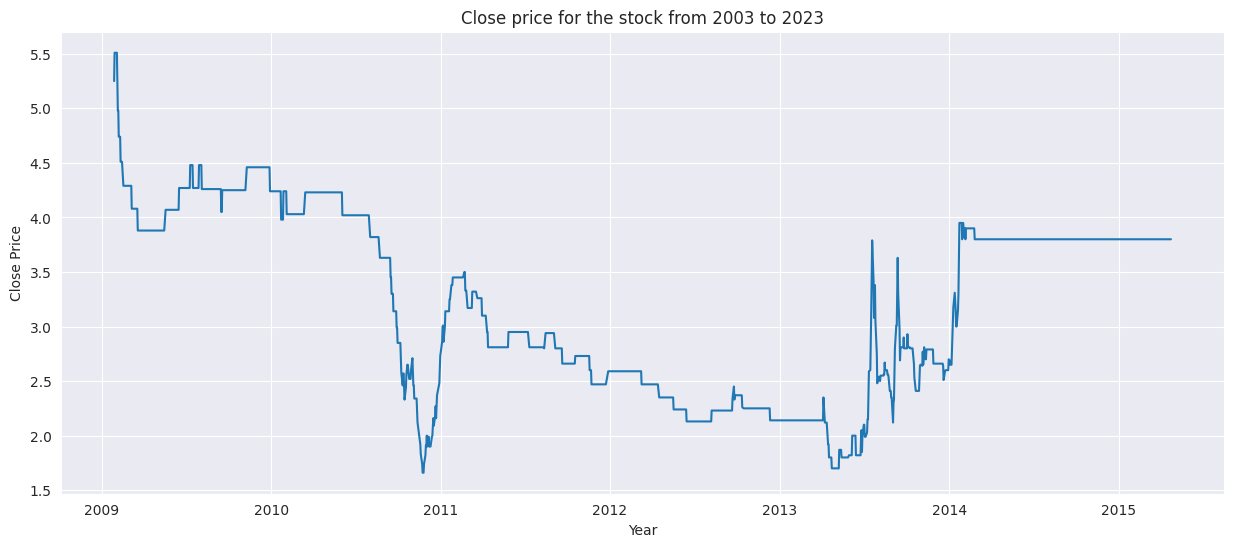

In [41]:
# the stock you to look into
actual_stock = 'IHS' # stock by symbol

# filter data based on the specific stock
stock_filter = tsdata_copy[tsdata_copy['SYMBOL'] == actual_stock]

# dataframe to show the specified stock
actual_stock_data = stock_filter[['CLOSEPRICE', 'Volume', 'Value', 'NoOfTransaction', 'OpenPrice', 'EPS', 'PERatio', 'SECTOR']].copy()

# plotting the stock
plt.rcParams['figure.figsize'] = (15, 6)
plt.plot(actual_stock_data.index, actual_stock_data['CLOSEPRICE'])
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.title('Close price for the stock from 2003 to 2023')

# years = [2003, 2007, 2009, 2011, 2013, 2015, 2017, 2019, 2021, 2023]
# plt.yticks(years) # set y-axis ticks to display specific years
# plt.gca().xaxis.set_major_locator(mdates.YearLocator()) # format the date on x-axis


plt.grid(True)
plt.show()

## ***** correlations between stocks

### for general data

In [42]:
# calculate the correlation matrix using `.corr()` pandas function
correlation_matrix = tsdata_copy.corr()
correlation_matrix

CLOSEPRICE    Volume     Value  NoOfTransaction  OpenPrice  \
CLOSEPRICE         1.000000 -0.006838  0.019537         0.009091   0.243784   
Volume            -0.006838  1.000000  0.337048         0.129505  -0.004666   
Value              0.019537  0.337048  1.000000         0.152507   0.060778   
NoOfTransaction    0.009091  0.129505  0.152507         1.000000   0.003696   
OpenPrice          0.243784 -0.004666  0.060778         0.003696   1.000000   
EPS                0.527484 -0.002622  0.011315         0.009842   0.098637   
PERatio            0.013911  0.001252  0.044701         0.026942   0.061264   

                      EPS   PERatio  
CLOSEPRICE       0.527484  0.013911  
Volume          -0.002622  0.001252  
Value            0.011315  0.044701  
NoOfTransaction  0.009842  0.026942  
OpenPrice        0.098637  0.061264  
EPS              1.000000 -0.001823  
PERatio         -0.001823  1.000000

This is a Pearson Correlation coefficient, measuring the linear relationship between two variables

Visualization using an heatmap

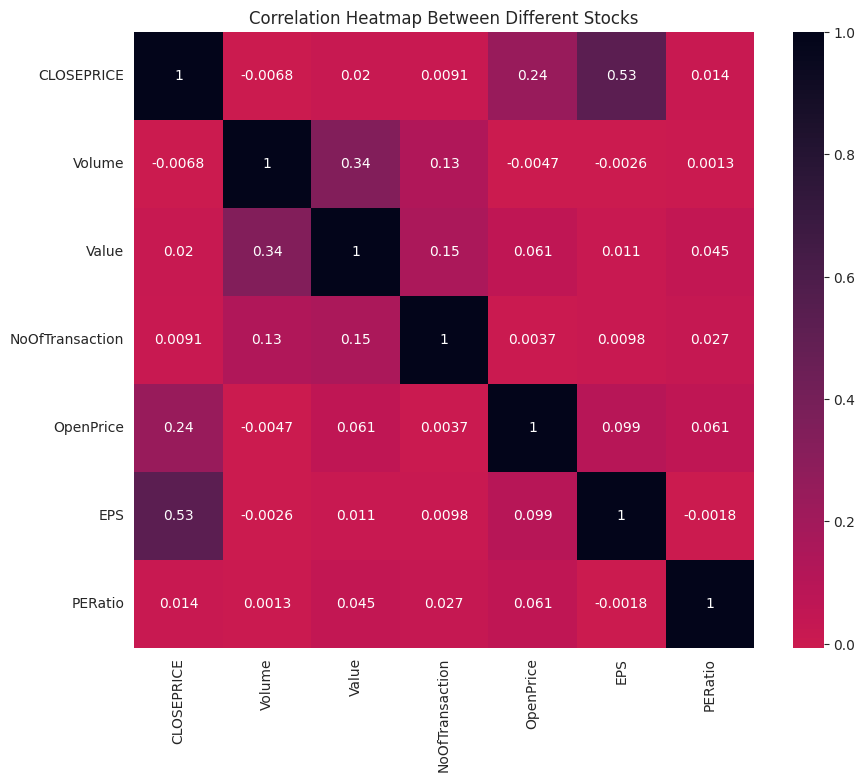

In [43]:
# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='rocket_r', center=0) # another attribut for cmap = 'coolwarm'
plt.title('Correlation Heatmap Between Different Stocks')
plt.show()

from our correlation heatmap, we can deduce that the variables with the most correlation are
* `CLOSEPRICE` and `EPS` of **0.53** (moderately correlated)
* check for `Volume` and `Value` having **0.34**

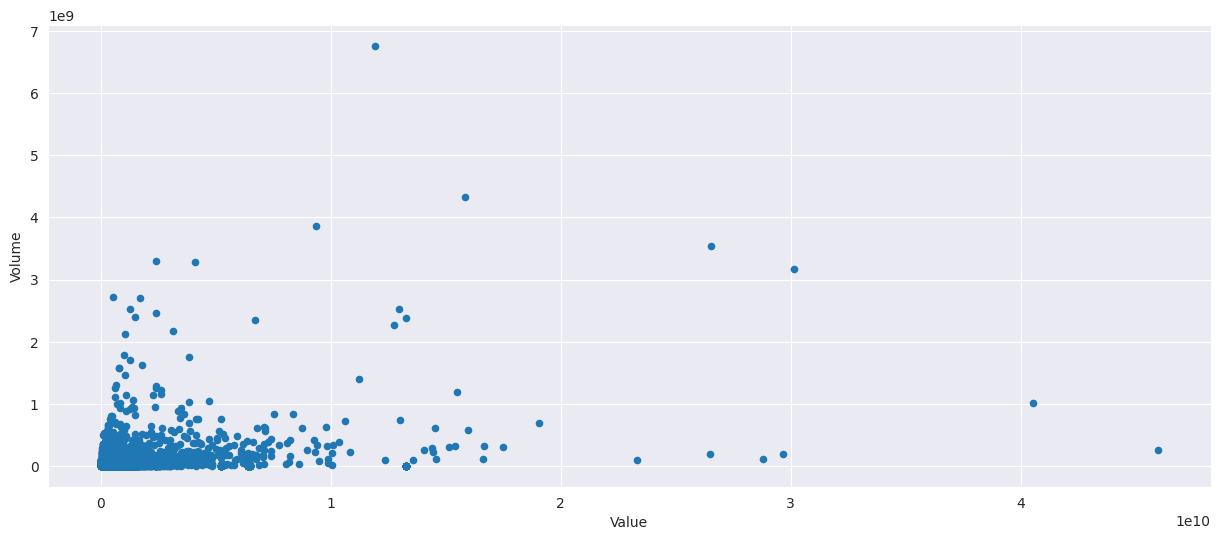

In [44]:
# plotting a scatterplot to check for CLOSEPRICE and EPS correlation
tsdata_copy.plot(kind = 'scatter', x = 'Value', y = 'Volume')
plt.show()

the data is relatively skewed making the data too concentrated on one region due to large values. To resolve this, two methods are possible
* Log Transformation
* Normalization

but, we will be using `log transformation` for now.

In [45]:
# # Log-transform the volume and value columns
# tsdata_copy['LogVolume'] = tsdata_copy['Volume'].apply(lambda x: 0 if x == 0 else math.log10(x))
# tsdata_copy['LogValue'] = tsdata_copy['Value'].apply(lambda x: 0 if x == 0 else math.log10(x))

# # Create a scatterplot with log-transformed values
# plt.figure(figsize=(15, 6))
# plt.scatter(tsdata_copy['LogVolume'], tsdata_copy['LogValue'], alpha=0.5)
# plt.xlabel('Log Volume')
# plt.ylabel('Log Value')
# plt.title('Scatterplot of Log-Transformed Volume vs. Log-Transformed Value')
# plt.show()
print('visualization too rough')

visualization too rough


instead let's create it for a specific stocks selected at random

### for individual stock

RIETZCOT
                 CLOSEPRICE    Volume     Value  NoOfTransaction  OpenPrice  \
CLOSEPRICE         1.000000  0.044454  0.076078        -0.022430        NaN   
Volume             0.044454  1.000000 -0.003998        -0.021544        NaN   
Value              0.076078 -0.003998  1.000000         0.019650        NaN   
NoOfTransaction   -0.022430 -0.021544  0.019650         1.000000        NaN   
OpenPrice               NaN       NaN       NaN              NaN        NaN   
EPS                0.960458  0.059525  0.072388        -0.030111        NaN   
PERatio                 NaN       NaN       NaN              NaN        NaN   

                      EPS  PERatio  
CLOSEPRICE       0.960458      NaN  
Volume           0.059525      NaN  
Value            0.072388      NaN  
NoOfTransaction -0.030111      NaN  
OpenPrice             NaN      NaN  
EPS              1.000000      NaN  
PERatio               NaN      NaN  


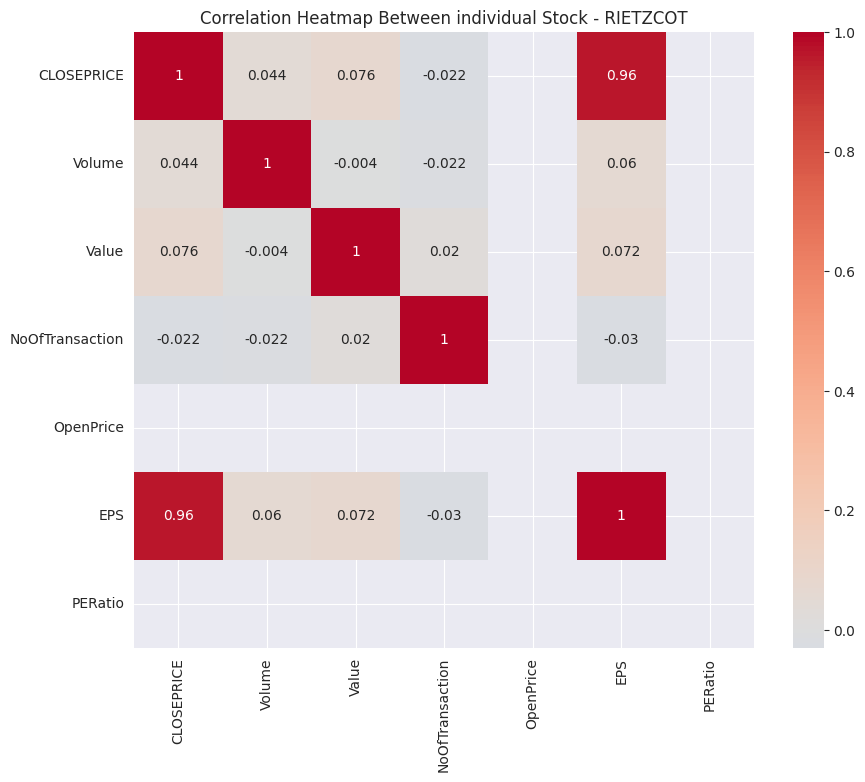

None


In [46]:
# 1. for specific selected stock
# specific_stock = 'CILEASING'
# specific_stock_data = tsdata_copy[tsdata_copy['SYMBOL'] == actual_stock]

# 2. for randomly selected stock
randchoice_stock = np.random.choice(tsdata_copy['SYMBOL'].unique())
randchoice_stock_data = tsdata_copy[tsdata_copy['SYMBOL'] == randchoice_stock]

print(randchoice_stock)

# calculate the correlation matrix using `.corr()` pandas function
corr_matrix = randchoice_stock_data.corr()
print(corr_matrix)

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title(f'Correlation Heatmap Between individual Stock - {randchoice_stock}')
print(plt.show())

# CILEASING have a higher correlation, of about 0.7+ for volume vs value and closeprice vs peratio
# PRESCO has a higher correlation, of about 0.92 for closeprice vs openprice and 0.81 for value vs volume
# MTNN has a higher correlation, of 0.98 for volume vs value and 0.88 for closeprice vs peratio

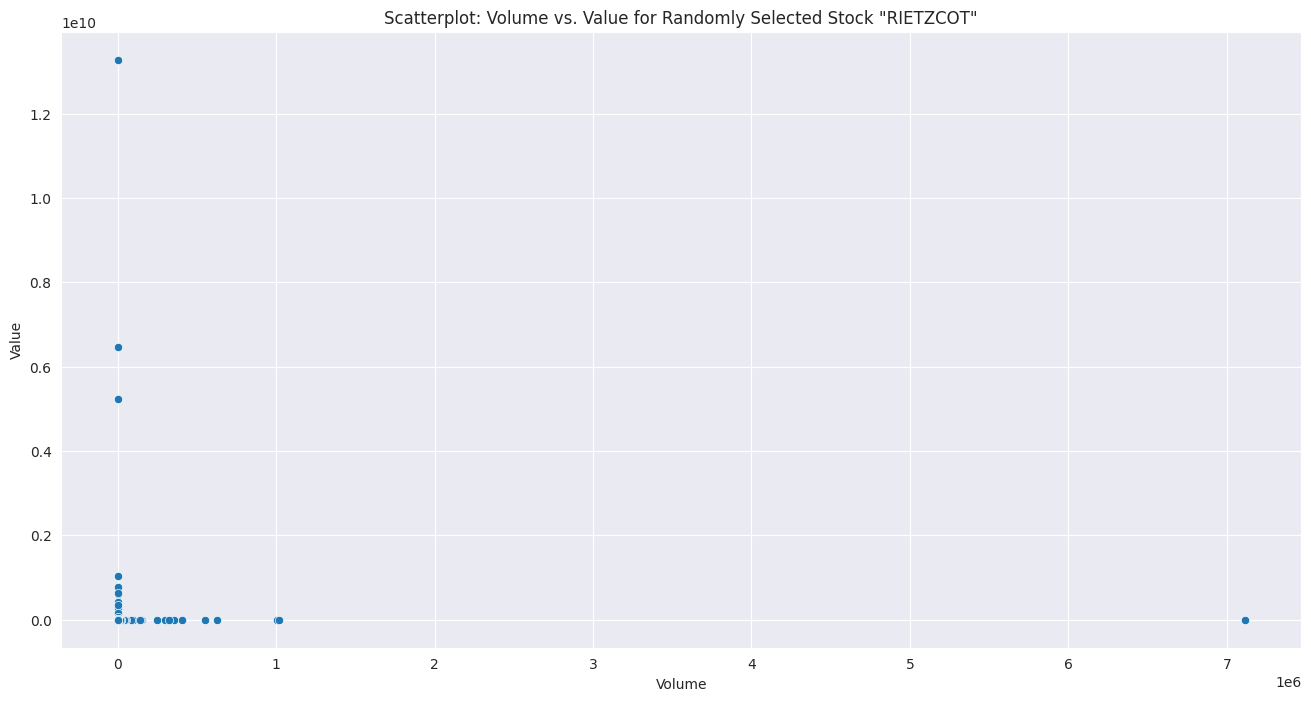

None


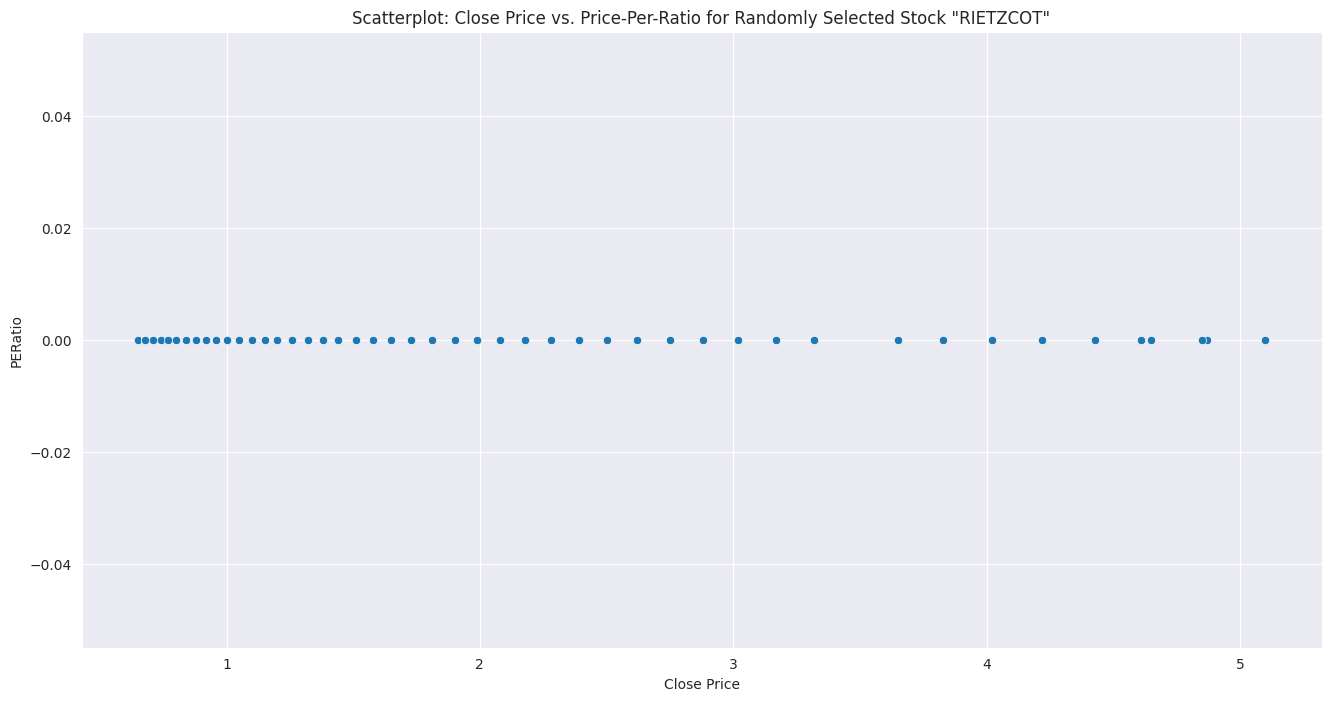

None


In [47]:
# log transformation - use when needed
# randchoice_stock_data['LogVolume'] = rand_stock_data['Volume'].apply(lambda x: 0 if x == 0 else math.log10(x))
# randchoice_stock_data['LogValue'] = rand_stock_data['Value'].apply(lambda x: 0 if x == 0 else math.log10(x))

# visualization for volume and value
plt.figure(figsize=(16, 8))
sns.scatterplot(data=randchoice_stock_data, x='Volume', y='Value')
plt.xlabel('Volume')
plt.ylabel('Value')
plt.title(f'Scatterplot: Volume vs. Value for Randomly Selected Stock "{randchoice_stock}"')
print(plt.show())

# visualization for CLOSEPRICE and PERation
plt.figure(figsize=(16, 8))
sns.scatterplot(data=randchoice_stock_data, x='CLOSEPRICE', y='PERatio')
plt.xlabel('Close Price')
plt.ylabel('PERatio')
plt.title(f'Scatterplot: Close Price vs. Price-Per-Ratio for Randomly Selected Stock "{randchoice_stock}"')
print(plt.show())

# 3. DATA VISUALIZATION
  * use various visualization techniques to gain insights to observe trends, seasonality & outliers, such as
    * lineplot
    * scatterplot
    * boxplot

  * extract stocks consistently from
    * 2003 to 2023 (20years)
    * 2008 to 2023 (15years)
    * 2013 to 2023 (10years)
    * 2018 to 2023 (5years)

  * visualize stocks within different sectors
  * visualize stocks recorded their highest & lows
    * yearly
    * monthly (5-10 years in-view)
  
  * create time series decomposition plots to identify the underlying components of the data (trends, seasonality & residual)
    * Resampling by daily frequency (with `agg()` function)
    * Resolve time series decomposition

## * plot various visualization (techniques) to gain insights

### line plot
Using line plot to observe visualized trends. Introducing **'rolling window average'** (also called moving average)

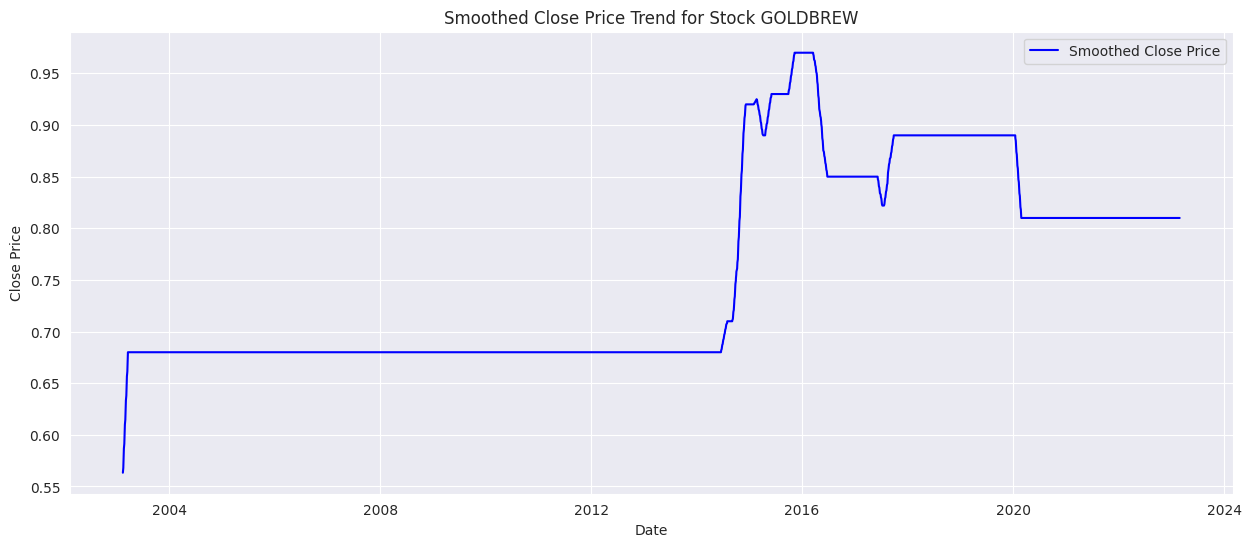

In [48]:
# plotting for price trends
# random stock selection
random_stock = np.random.choice(tsdata_copy['SYMBOL'].unique())
random_stock_data = tsdata_copy[tsdata_copy['SYMBOL'] == random_stock]

# rolling window average for data smoothening
rolling_window = 30
smoothed_data = random_stock_data['CLOSEPRICE'].rolling(window = rolling_window).mean()

# plot
plt.figure(figsize = (15, 6))
plt.plot(random_stock_data.index, smoothed_data, label = 'Smoothed Close Price', color = 'blue')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title(f'Smoothed Close Price Trend for Stock {random_stock}')
plt.legend()
plt.grid(True)
plt.show()

visualization plot to see relation of downward and upward trend with a rolling window average(otherwise called simple smoothing average)

In [49]:
random_stock = np.random.choice(tsdata_copy['SYMBOL'].unique())
random_stock_data = tsdata_copy[tsdata_copy['SYMBOL'] == random_stock]

# random_stock_data.head()
random_stock_data['SMA30'] = random_stock_data['CLOSEPRICE'].rolling(30).mean()
random_stock_data.dropna(inplace=True)

print(f'showing data for stock {random_stock}')
random_stock_data

showing data for stock NBC


SYMBOL  CLOSEPRICE    Volume       Value  NoOfTransaction  \
DATE                                                                   
2003-02-14    NBC        38.0   94266.0  3554495.19             24.0   
2003-02-17    NBC        38.5   60920.0  2320201.10             35.0   
2003-02-18    NBC        39.0  102667.0  3986315.90             39.0   
2003-02-19    NBC        39.5  134515.0  5238495.18             38.0   
2003-02-20    NBC        39.0  184519.0  7231530.70             39.0   
...           ...         ...       ...         ...              ...   
2011-11-03    NBC        41.0       0.0   269122.70              7.0   
2011-11-04    NBC        41.0       0.0     6500.00              1.0   
2011-11-09    NBC        41.0       0.0   421280.00              2.0   
2011-11-10    NBC        41.0       0.0  7628786.40              2.0   
2011-11-11    NBC        41.0       0.0   519678.38             13.0   

            OpenPrice   EPS    PERatio          SECTOR      SMA30  
DATE                                                               
2003-02-14        0.0  3.30  11.515152  CONSUMER GOODS  34.816333  
2003-02-17        0.0  3.30  11.666667  CONSUMER GOODS  35.049667  
2003-02-18        0.0  3.30  11.818182  CONSUMER GOODS  35.283000  
2003-02-19        0.0  3.30  11.969697  CONSUMER GOODS  35.499667  
2003-02-20        0.0  3.30  11.818182  CONSUMER GOODS  35.700000  
...               ...   ...        ...             ...        ...  
2011-11-03        0.0  1.52  26.973684  CONSUMER GOODS  41.000000  
2011-11-04        0.0  1.52  26.973684  CONSUMER GOODS  41.000000  
2011-11-09        0.0  1.52  26.973684  CONSUMER GOODS  41.000000  
2011-11-10        0.0  1.52  26.973684  CONSUMER GOODS  41.000000  
2011-11-11        0.0  1.52  26.973684  CONSUMER GOODS  41.000000  

[2164 rows x 10 columns]

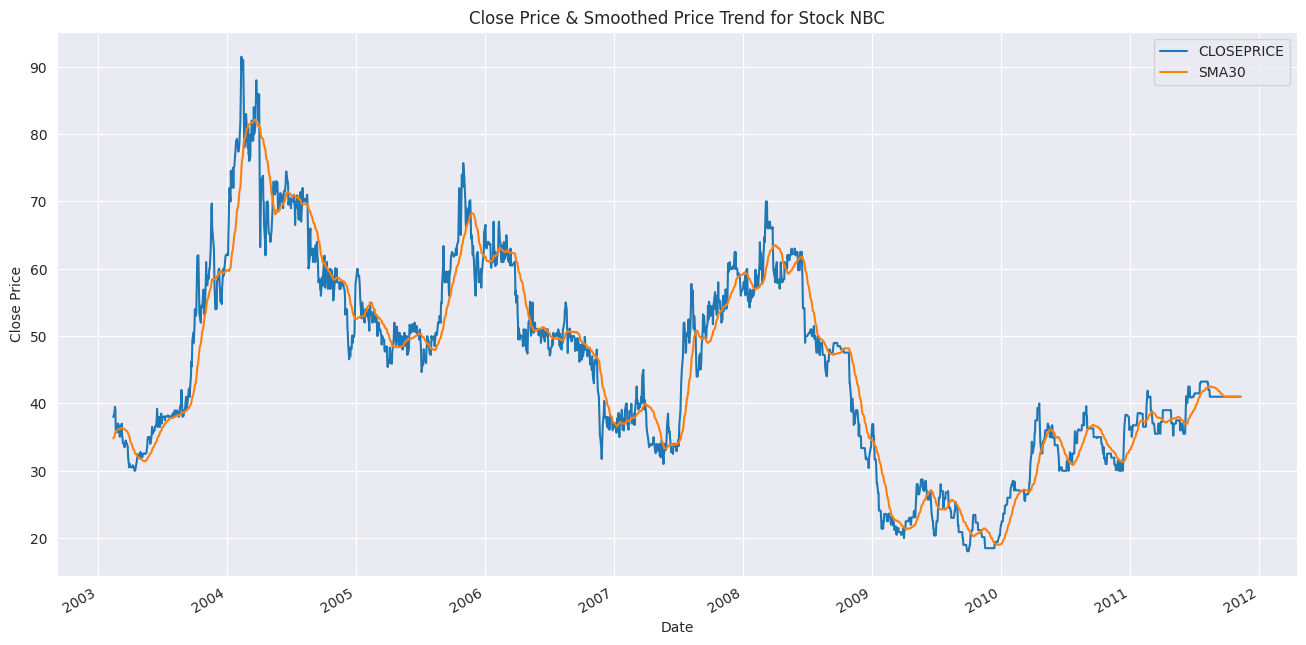

In [50]:
# visualization for the above
random_stock_data[['CLOSEPRICE', 'SMA30']].plot(label = 'Close Price & Smoothed Price', figsize = (16, 8))
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title(f'Close Price & Smoothed Price Trend for Stock {random_stock}')
plt.legend()
plt.grid(True)
plt.show()

### scatter plot
Using scatter plot to identify relationships

scatterplot have been treated under correlation, check the above under *data preprocessing and exploration* `last subsection`

### box plot
<p>check for outliers</p>
<img src='/home/lordmax/Downloads/Machine Learning Projects/Molten project/Time Series Data/MOLTEN TRUST/outlier.jpg'>

#### overview

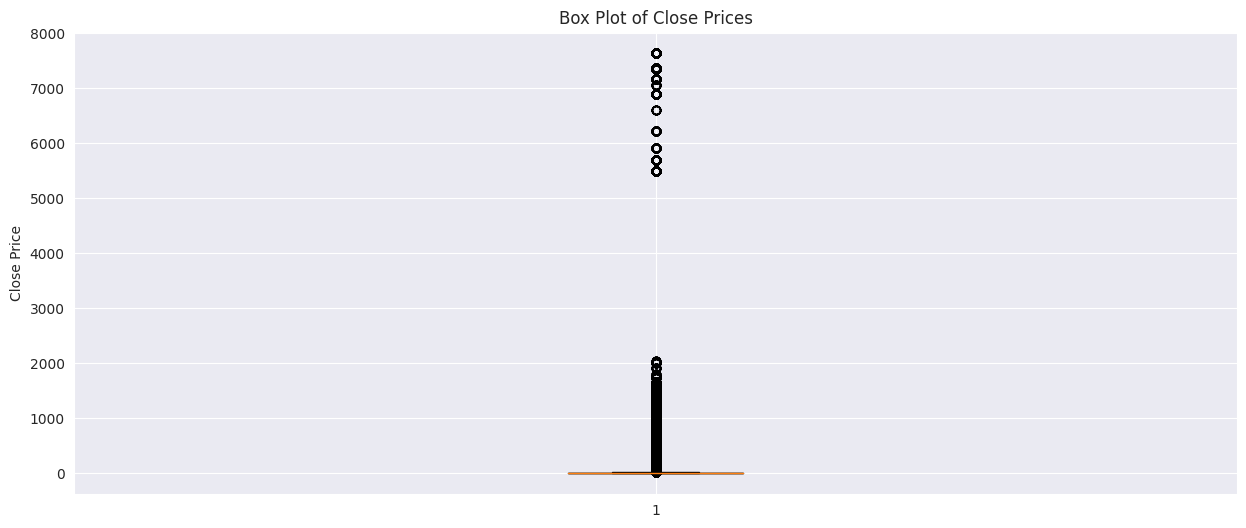

In [51]:
plt.boxplot(tsdata_copy['CLOSEPRICE'])
plt.ylabel("Close Price")
plt.title('Box Plot of Close Prices')
plt.show()

Our data consist of many outlier. The plot seems compressed downward, making it downwardly skewed, let's resove this

#### detecting outliers

In [52]:
# Make a dataset with the outliers
# Calculate Q1 and Q3
Q1 = tsdata_copy.quantile(0.25)
Q3 = tsdata_copy.quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# outlier data
IQR_outliers = tsdata_copy[((tsdata_copy < (Q1 - 1.5 * IQR)) |(tsdata_copy > (Q3 + 1.5 * IQR))).any(axis=1)]
IQR_outliers

SYMBOL  CLOSEPRICE      Volume         Value  NoOfTransaction  \
DATE                                                                            
2003-01-03         7UP        6.00     29300.0  1.753140e+05             11.0   
2003-01-06         7UP        5.80     58010.0  3.378608e+05              7.0   
2003-01-07         7UP        6.00     34550.0  2.070690e+05             12.0   
2003-01-08         7UP        5.97     16013.0  9.562535e+04             12.0   
2003-01-09         7UP        5.87     29812.0  1.764836e+05             13.0   
...                ...         ...         ...           ...              ...   
2023-02-22  ZENITHBANK       25.20  13000968.0  3.261339e+08            212.0   
2023-02-23  ZENITHBANK       25.35  11525976.0  2.921314e+08            199.0   
2023-02-24  ZENITHBANK       25.75   8129969.0  2.066553e+08            167.0   
2023-02-27  ZENITHBANK       25.95   7953025.0  2.055500e+08            193.0   
2023-02-28  ZENITHBANK       26.50  34247198.0  9.075359e+08            350.0   

            OpenPrice        EPS   PERatio              SECTOR  
DATE                                                            
2003-01-03       0.00   3.510000  1.709402      CONSUMER GOODS  
2003-01-06       0.00   3.510000  1.652422      CONSUMER GOODS  
2003-01-07       0.00   3.510000  1.709402      CONSUMER GOODS  
2003-01-08       0.00   3.510000  1.700855      CONSUMER GOODS  
2003-01-09       0.00   3.510000  1.672365      CONSUMER GOODS  
...               ...        ...       ...                 ...  
2023-02-22      25.00  13.303581  1.894227  FINANCIAL SERVICES  
2023-02-23      25.20  13.303581  1.905502  FINANCIAL SERVICES  
2023-02-24      25.35  13.303581  1.935569  FINANCIAL SERVICES  
2023-02-27      25.75  13.303581  1.950603  FINANCIAL SERVICES  
2023-02-28      25.95  13.303581  1.991945  FINANCIAL SERVICES  

[521579 rows x 9 columns]

#### numerical columns plots -- with IQR
<img src = '/home/lordmax/Downloads/Machine Learning Projects/Molten project/Time Series Data/MOLTEN TRUST/iqr.png'>

##### Closeprice

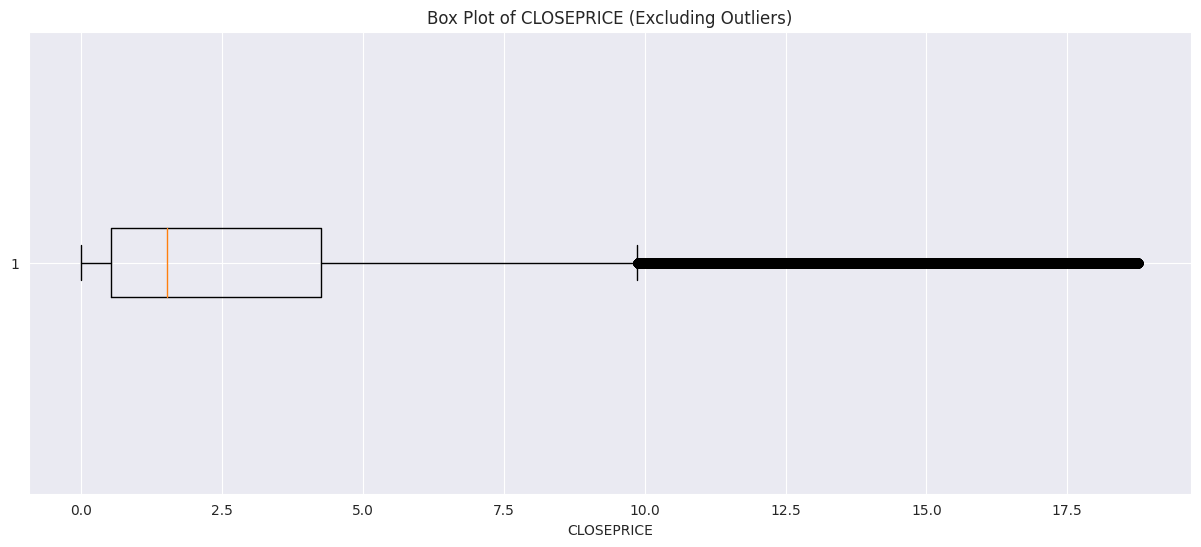

In [53]:
# column for visualization
specific_column = 'CLOSEPRICE'
column_data = tsdata_copy[specific_column]

# getting the outlier using interquatile range
q1 = column_data.quantile(0.25)
q3 = column_data.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# excluded outlier data
non_outlier_data = column_data[(column_data >= lower_bound) & (column_data <= upper_bound)]

# box plot with adjusted y-axis limits
plt.figure(figsize=(15, 6))
plt.boxplot(non_outlier_data, vert=False)
plt.xlabel(specific_column)
plt.title(f'Box Plot of {specific_column} (Excluding Outliers)')
plt.show()


##### Volume

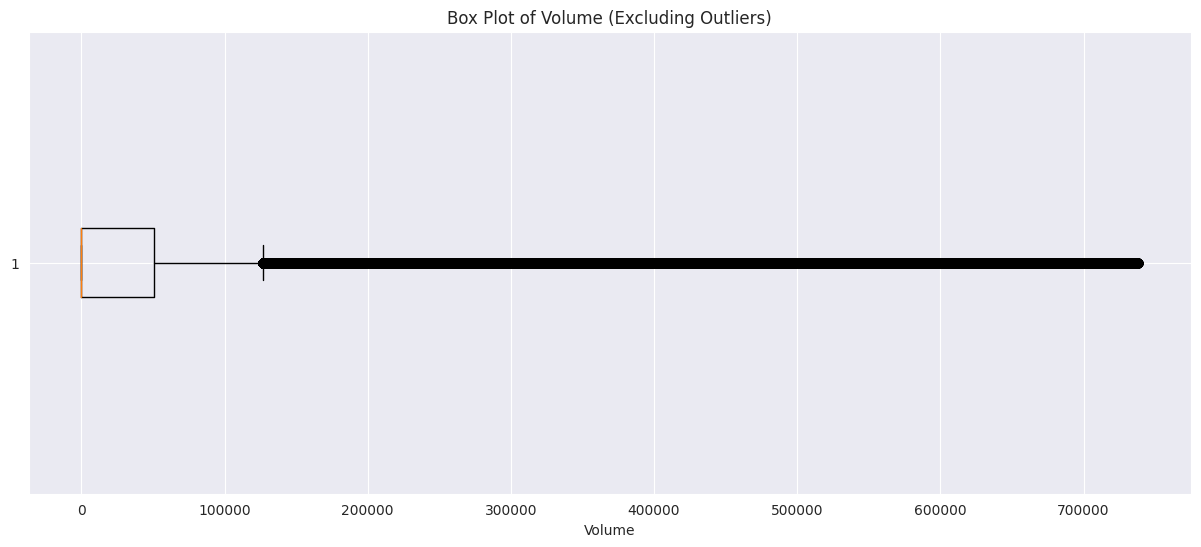

In [54]:
# column for visualization
specific_column = 'Volume'
column_data = tsdata_copy[specific_column]

# getting the outlier using interquatile range
q1 = column_data.quantile(0.25)
q3 = column_data.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# excluded outlier data
non_outlier_data = column_data[(column_data >= lower_bound) & (column_data <= upper_bound)]

# box plot with adjusted y-axis limits
plt.figure(figsize=(15, 6))
plt.boxplot(non_outlier_data, vert=False)
plt.xlabel(specific_column)
plt.title(f'Box Plot of {specific_column} (Excluding Outliers)')
plt.show()


##### Value

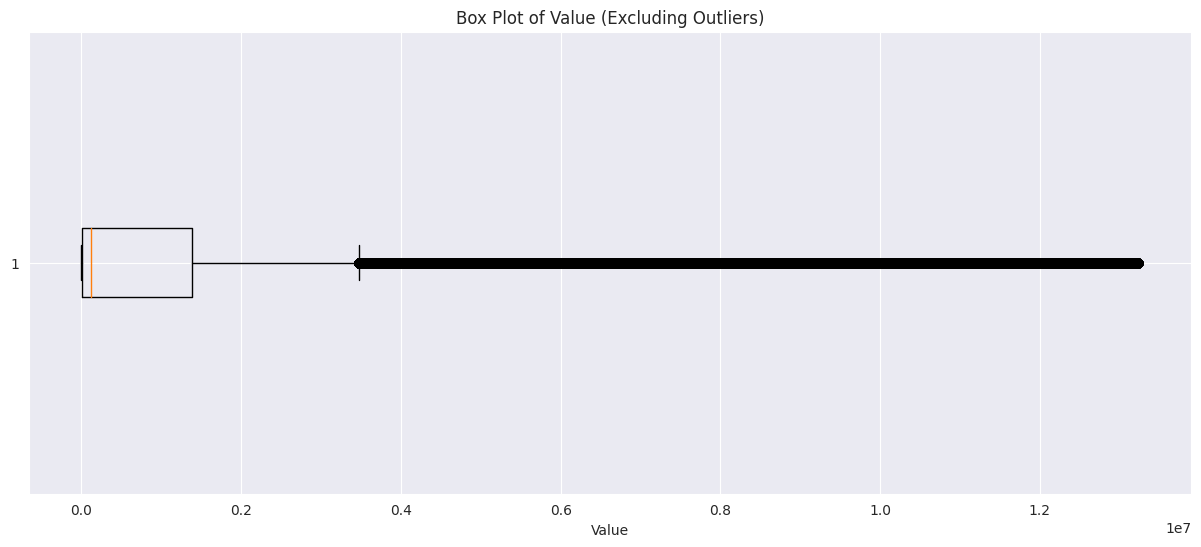

In [55]:
# column for visualization
specific_column = 'Value'
column_data = tsdata_copy[specific_column]

# getting the outlier using interquatile range
q1 = column_data.quantile(0.25)
q3 = column_data.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# excluded outlier data
non_outlier_data = column_data[(column_data >= lower_bound) & (column_data <= upper_bound)]

# box plot with adjusted y-axis limits
plt.figure(figsize=(15, 6))
plt.boxplot(non_outlier_data, vert=False)
plt.xlabel(specific_column)
plt.title(f'Box Plot of {specific_column} (Excluding Outliers)')
plt.show()


##### NoOfTransaction

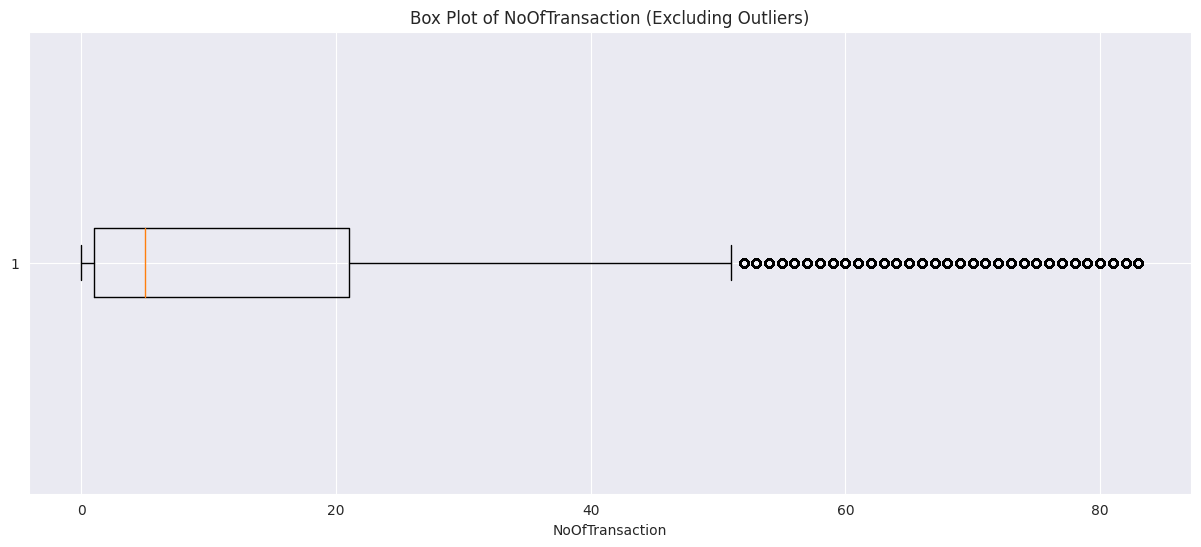

In [56]:
# column for visualization
specific_column = 'NoOfTransaction'
column_data = tsdata_copy[specific_column]

# getting the outlier using interquatile range
q1 = column_data.quantile(0.25)
q3 = column_data.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# excluded outlier data
non_outlier_data = column_data[(column_data >= lower_bound) & (column_data <= upper_bound)]

# box plot with adjusted y-axis limits
plt.figure(figsize=(15, 6))
plt.boxplot(non_outlier_data, vert=False)
plt.xlabel(specific_column)
plt.title(f'Box Plot of {specific_column} (Excluding Outliers)')
plt.show()


##### Openprice

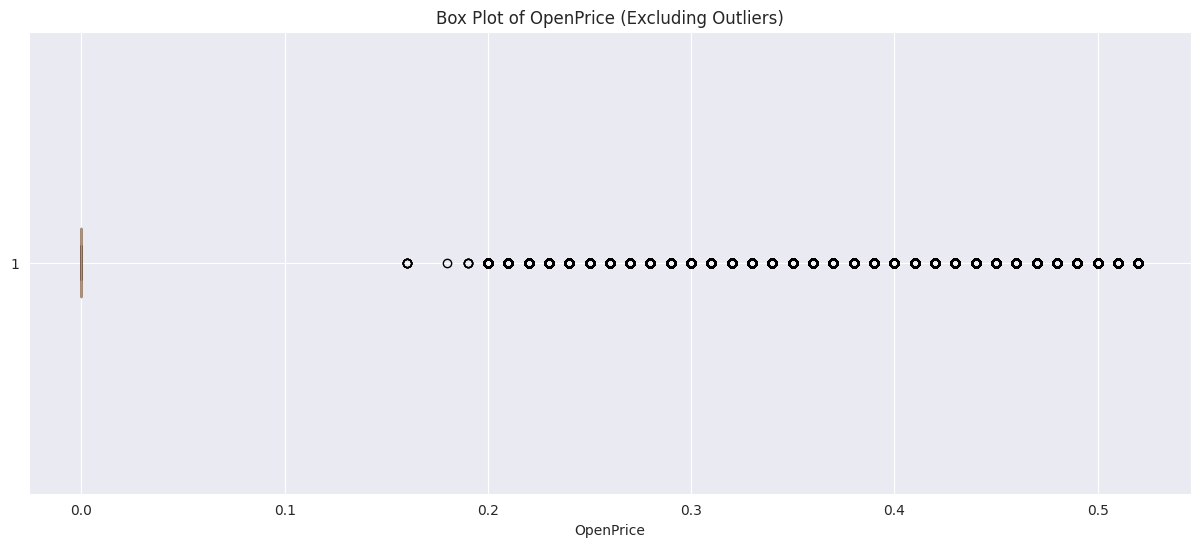

In [57]:
# column for visualization
specific_column = 'OpenPrice'
column_data = tsdata_copy[specific_column]

# getting the outlier using interquatile range
q1 = column_data.quantile(0.25)
q3 = column_data.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# excluded outlier data
non_outlier_data = column_data[(column_data >= lower_bound) & (column_data <= upper_bound)]

# box plot with adjusted y-axis limits
plt.figure(figsize=(15, 6))
plt.boxplot(non_outlier_data, vert=False)
plt.xlabel(specific_column)
plt.title(f'Box Plot of {specific_column} (Excluding Outliers)')
plt.show()


##### EPS

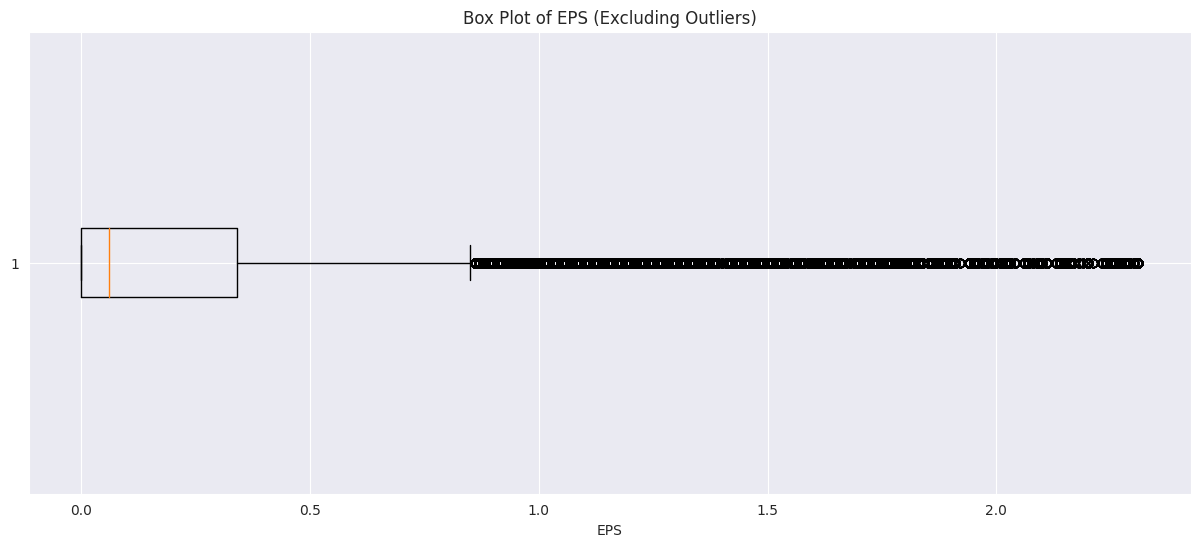

In [58]:
# column for visualization
specific_column = 'EPS'
column_data = tsdata_copy[specific_column]

# getting the outlier using interquatile range
q1 = column_data.quantile(0.25)
q3 = column_data.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# excluded outlier data
non_outlier_data = column_data[(column_data >= lower_bound) & (column_data <= upper_bound)]

# box plot with adjusted y-axis limits
plt.figure(figsize=(15, 6))
plt.boxplot(non_outlier_data, vert=False)
plt.xlabel(specific_column)
plt.title(f'Box Plot of {specific_column} (Excluding Outliers)')
plt.show()


##### PERatio

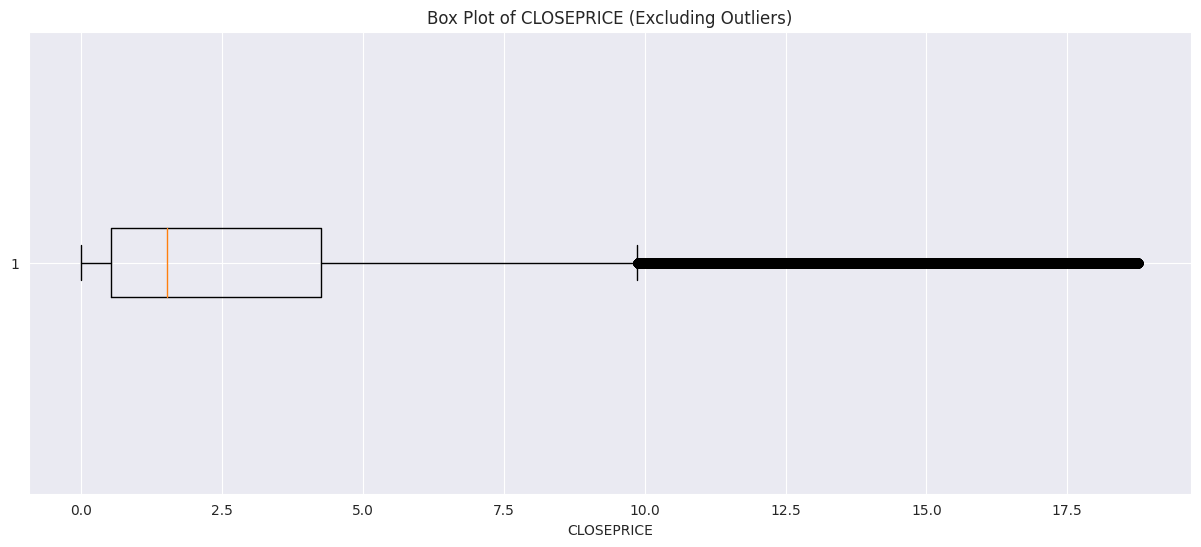

In [59]:
# column for visualization
specific_column = 'CLOSEPRICE'
column_data = tsdata_copy[specific_column]

# getting the outlier using interquatile range
q1 = column_data.quantile(0.25)
q3 = column_data.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# excluded outlier data
non_outlier_data = column_data[(column_data >= lower_bound) & (column_data <= upper_bound)]

# box plot with adjusted y-axis limits
plt.figure(figsize=(15, 6))
plt.boxplot(non_outlier_data, vert=False)
plt.xlabel(specific_column)
plt.title(f'Box Plot of {specific_column} (Excluding Outliers)')
plt.show()


## ** stocks extraction
TOTAL stocks insights: 172

### 2003 to 2023 consistency (20years)

measuring yearly consistency

In [60]:
# start and end year
start_year = 2003
end_year = 2023
required_years = list(range(start_year, end_year + 1))

consistent_stocks = []

for stock_symbol, stock_data in tsdata_copy.groupby('SYMBOL'):
    years_with_data = stock_data.index.year.unique()
    if set(required_years) == set(years_with_data):
        consistent_stocks.append(stock_symbol)

consistent_data = tsdata_copy[tsdata_copy['SYMBOL'].isin(consistent_stocks)]
print(consistent_data.SYMBOL.nunique())
print(consistent_data.SYMBOL.unique())

84
['ACADEMY' 'ACCESSCORP' 'AIICO' 'ALEX' 'ARBICO' 'ARDOVA' 'BERGER'
 'BETAGLAS' 'CADBURY' 'CAP' 'CAPOIL' 'CHAMPION' 'CHELLARAM' 'CILEASING'
 'CONOIL' 'CORNERST' 'CUTIX' 'DUNLOP' 'EKOCORP' 'ELLAHLAKES' 'ENAMELWA'
 'ETERNA' 'EUNISELL' 'FBNH' 'FLOURMILL' 'GLAXOSMITH' 'GOLDBREW' 'GTCO'
 'GUINEAINS' 'GUINNESS' 'IMG' 'INTBREW' 'JBERGER' 'JOHNHOLT' 'JULI'
 'LASACO' 'LEARNAFRCA' 'LINKASSURE' 'LIVESTOCK' 'MAYBAKER' 'MBENEFIT'
 'MEYER' 'MORISON' 'MRS' 'NASCON' 'NB' 'NCR' 'NEIMETH' 'NEM' 'NESF'
 'NESTLE' 'NIGERINS' 'NNFM' 'OANDO' 'OKOMUOIL' 'PHARMDEKO' 'PREMPAINTS'
 'PRESCO' 'PRESTIGE' 'PZ' 'RAKUNITY' 'ROYALEX' 'RTBRISCOE' 'SCOA'
 'SMURFIT' 'STDINSURE' 'STERLNBANK' 'SUNUASSUR' 'THOMASWY' 'TOTAL'
 'TRANSEXPR' 'TRIPPLEG' 'UACN' 'UBA' 'UBN' 'UNILEVER' 'UNIONDICON' 'UPDC'
 'UPL' 'VANLEER' 'VITAFOAM' 'WAPCO' 'WAPIC' 'WEMABANK']


plot

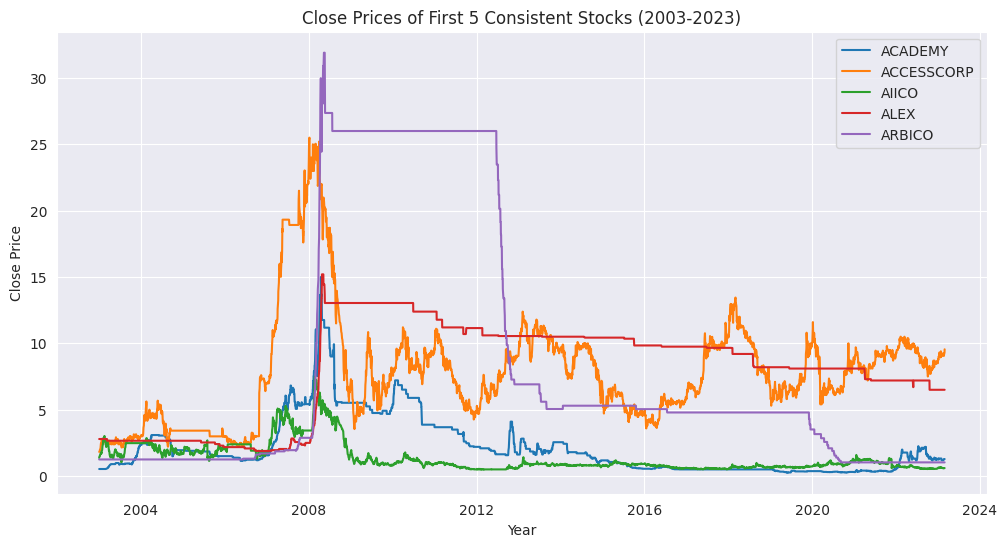

In [61]:
plt.figure(figsize=(12, 6))

# first five stocks
consistent_stocks_subset = consistent_stocks[:5]

for stock_symbol, stock_data in consistent_data[consistent_data['SYMBOL'].isin(consistent_stocks_subset)].groupby('SYMBOL'):
    plt.plot(stock_data.index, stock_data['CLOSEPRICE'], label=stock_symbol)

plt.xlabel('Year')
plt.ylabel('Close Price')
plt.title('Close Prices of First 5 Consistent Stocks (2003-2023)')
plt.legend()
plt.grid(True)
plt.show()


### Others 1

IRRELEVANT ANALYSIS: 14
* **Delisted stocks:** ANINO, LAWUNION, EVANSMED, MOBIL, NIG-GERMAN, ROADS, UNIC, STUDPRESS, AGLEVENT, AFRIK, AFRPAINTS
* **Suspended stocks:** CCNN, 7UP

    * only `STUDPRESS` had a consistent range from 2003 to 2022
    * `EVANSMED, MOBIL, NIG-GERMAN, ROADS, UNIC` had a consistent range from 2003 to 2021
    * `EVANSMED, MOBIL, NIG-GERMAN, ROADS, UNIC` `AGLEVENT, ANINO, CCNN, LAWUNION` had a consistency range from 2003 to 2020
    * `FIRSTALUM` had a consistency range from 2003 to 2019
    * `7UP, AFRIK, AFRPAINTS` had a consistency range from 2003 to 2018
    


RELEVANT ANALYSIS: 21
* `FCMB, TOURIST, ZENITHBANK`, have a consistency range starting from 2004 to 2023
* `FIDELLITYBK, JAPAULGOLD, STANBIC, UNITYBNK`, have a consistency range from 2005 to 2023
* `ABCTRANS, ETI, NAHCO, SOVRENINS, TRANSCORP, UNHOMES`, have a consistency range from 2006 to 2023
* `CUSTODIAN, DANGSUGAR, DEAPCAP, IKEJAHOTEL, INTENEGINS, NSLTECH, REDSTAREX, STACO had a consistency range from 2007 to 2023

In [62]:
specific = 'STUDPRESS'
specific_data = tsdata[tsdata['SYMBOL'] == specific]
specific_data

SYMBOL                     NAME  CLOSEPRICE  Volume  Value  \
DATE                                                                        
2003-01-02  STUDPRESS  STUDIO PRESS (NIG) PLC.        1.70     0.0    NaN   
2003-01-03  STUDPRESS  STUDIO PRESS (NIG) PLC.        1.70     0.0    NaN   
2003-01-06  STUDPRESS  STUDIO PRESS (NIG) PLC.        1.70     0.0    NaN   
2003-01-07  STUDPRESS  STUDIO PRESS (NIG) PLC.        1.70     0.0    NaN   
2003-01-08  STUDPRESS  STUDIO PRESS (NIG) PLC.        1.70     0.0    NaN   
...               ...                      ...         ...     ...    ...   
2021-12-30  STUDPRESS  STUDIO PRESS (NIG) PLC.        1.78     0.0    0.0   
2021-12-31  STUDPRESS  STUDIO PRESS (NIG) PLC.        1.78     0.0    0.0   
2022-01-04  STUDPRESS  STUDIO PRESS (NIG) PLC.        1.78     0.0    0.0   
2022-01-05  STUDPRESS  STUDIO PRESS (NIG) PLC.        1.78     0.0    0.0   
2022-01-06  STUDPRESS  STUDIO PRESS (NIG) PLC.        1.78     0.0    0.0   

            NoOfTransaction  OpenPrice   Low  High      EPS  PERatio    SECTOR  
DATE                                                                            
2003-01-02              NaN       0.00   NaN   NaN  0.00000  0.00000  SERVICES  
2003-01-03              NaN       0.00   NaN   NaN  0.00000  0.00000  SERVICES  
2003-01-06              NaN       0.00   NaN   NaN  0.00000  0.00000  SERVICES  
2003-01-07              NaN       0.00   NaN   NaN  0.00000  0.00000  SERVICES  
2003-01-08              NaN       0.00   NaN   NaN  0.00000  0.00000  SERVICES  
...                     ...        ...   ...   ...      ...      ...       ...  
2021-12-30              0.0       1.78  1.78  1.78  0.92746  1.91922  SERVICES  
2021-12-31              0.0       1.78  1.78  1.78  0.92746  1.91922  SERVICES  
2022-01-04              0.0       1.78  1.78  1.78  0.92746  1.91922  SERVICES  
2022-01-05              0.0       1.78  1.78  1.78  0.92746  1.91922  SERVICES  
2022-01-06              0.0       1.78  1.78  1.78  0.92746  1.91922  SERVICES  

[4706 rows x 12 columns]

In [63]:
# start and end year
start_year = 2007
end_year = 2023
required_years = list(range(start_year, end_year + 1))

consistent_stocks = []

for stock_symbol, stock_data in tsdata_copy.groupby('SYMBOL'):
    years_with_data = stock_data.index.year.unique()
    if set(required_years) == set(years_with_data):
        consistent_stocks.append(stock_symbol)

consistent_data = tsdata_copy[tsdata_copy['SYMBOL'].isin(consistent_stocks)]
print(consistent_data.SYMBOL.nunique())
print(consistent_data.SYMBOL.unique())

8
['CUSTODIAN' 'DANGSUGAR' 'DEAPCAP' 'IKEJAHOTEL' 'INTENEGINS' 'NSLTECH'
 'REDSTAREX' 'STACO']


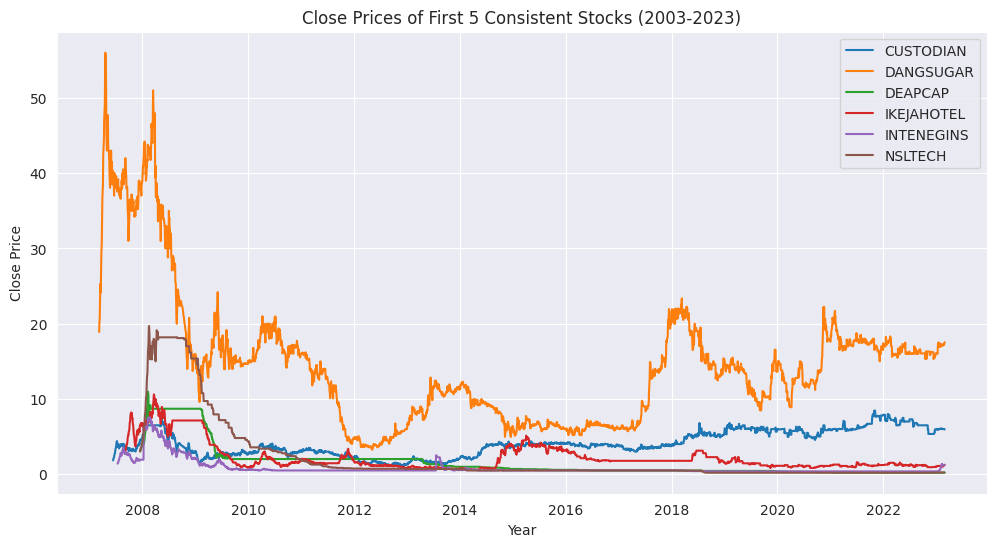

In [64]:
plt.figure(figsize=(12, 6))

# first five stocks
consistent_stocks_subset = consistent_stocks[:6]

for stock_symbol, stock_data in consistent_data[consistent_data['SYMBOL'].isin(consistent_stocks_subset)].groupby('SYMBOL'):
    plt.plot(stock_data.index, stock_data['CLOSEPRICE'], label=stock_symbol)

plt.xlabel('Year')
plt.ylabel('Close Price')
plt.title('Close Prices of First 5 Consistent Stocks (2003-2023)')
plt.legend()
plt.grid(True)
plt.show()


### 2008 to 2023 consistency (15years)

measuring yearly consistency

In [65]:
# start and end year
start_year = 2008
end_year = 2023
required_years = list(range(start_year, end_year + 1))

consistent_stocks = []

for stock_symbol, stock_data in tsdata_copy.groupby('SYMBOL'):
    years_with_data = stock_data.index.year.unique()
    if set(required_years) == set(years_with_data):
        consistent_stocks.append(stock_symbol)

consistent_data = tsdata_copy[tsdata_copy['SYMBOL'].isin(consistent_stocks)]
print(consistent_data.SYMBOL.nunique())
print(consistent_data.SYMBOL.unique())

15
['ABBEYBDS' 'ASOSAVINGS' 'CAPHOTEL' 'CHAMS' 'CHIPLC' 'DAARCOMM' 'FIDSON'
 'FTNCOCOA' 'GOLDINSURE' 'MULTIVERSE' 'OMATEK' 'REGALINS' 'SFSREIT'
 'TANTALIZER' 'UNIVINSURE']


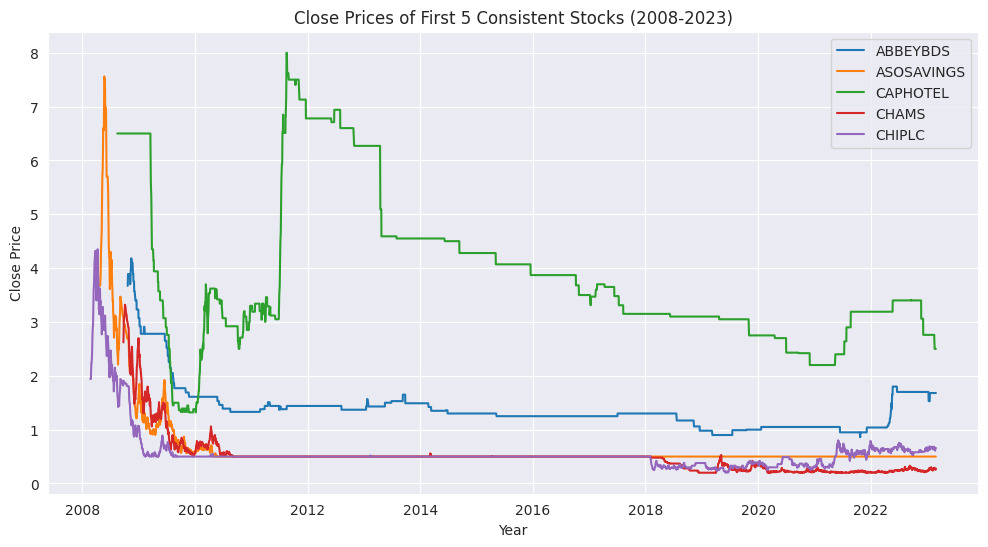

In [66]:
plt.figure(figsize=(12, 6))

# first five stocks
consistent_stocks_subset = consistent_stocks[:5]

for stock_symbol, stock_data in consistent_data[consistent_data['SYMBOL'].isin(consistent_stocks_subset)].groupby('SYMBOL'):
    plt.plot(stock_data.index, stock_data['CLOSEPRICE'], label=stock_symbol)

plt.xlabel('Year')
plt.ylabel('Close Price')
plt.title('Close Prices of First 5 Consistent Stocks (2008-2023)')
plt.legend()
plt.grid(True)
plt.show()

### Others 2

IRRELEVANT ANALYSIS: 2
* `UNIONDAC` had a consistency range from 2008 to 2022
* `DANGFLOUR` had a consistency range from 2008 to 2019

RELEVANT ANALYSIS: 14
* `AFRINSURE, AFROMEDIA, COURTVILLE, ETRANZACT, HONYFLOUR, MANSARD, MCNICHOLS, RESORTSAL, VERITASKAP` have a consistency range from 2009 to 2023
* `DANGCEM, MULTITREX, NPFMCRFBK, UHOMREIT` have a consistency range from 2010 to 2023
* `AUSTINLAZ` have a consistency range from 2012 to 2023

In [67]:
# start and end year
start_year = 2012
end_year = 2023
required_years = list(range(start_year, end_year + 1))

consistent_stocks = []

for stock_symbol, stock_data in tsdata_copy.groupby('SYMBOL'):
    years_with_data = stock_data.index.year.unique()
    if set(required_years) == set(years_with_data):
        consistent_stocks.append(stock_symbol)

consistent_data = tsdata_copy[tsdata_copy['SYMBOL'].isin(consistent_stocks)]
print(consistent_data.SYMBOL.nunique())
print(consistent_data.SYMBOL.unique())

1
['AUSTINLAZ']


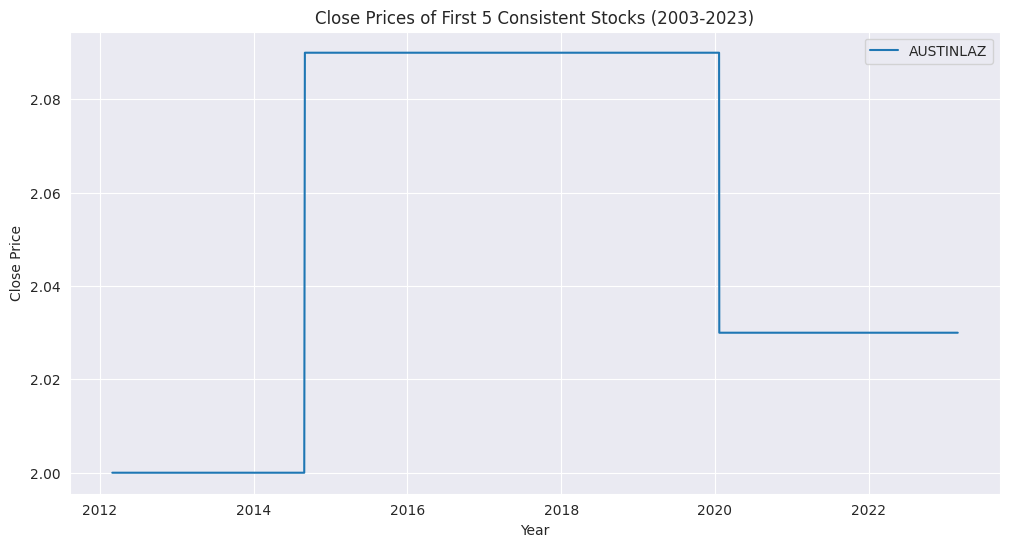

In [68]:
plt.figure(figsize=(12, 6))

# first five stocks
consistent_stocks_subset = consistent_stocks[:5]

for stock_symbol, stock_data in consistent_data[consistent_data['SYMBOL'].isin(consistent_stocks_subset)].groupby('SYMBOL'):
    plt.plot(stock_data.index, stock_data['CLOSEPRICE'], label=stock_symbol)

plt.xlabel('Year')
plt.ylabel('Close Price')
plt.title('Close Prices of First 5 Consistent Stocks (2003-2023)')
plt.legend()
plt.grid(True)
plt.show()


### 2013 to 2023 consistency (10years)

measuring yearly consistency

In [69]:
# start and end year
start_year = 2013
end_year = 2023
required_years = list(range(start_year, end_year + 1))

consistent_stocks = []

for stock_symbol, stock_data in tsdata_copy.groupby('SYMBOL'):
    years_with_data = stock_data.index.year.unique()
    if set(required_years) == set(years_with_data):
        consistent_stocks.append(stock_symbol)

consistent_data = tsdata_copy[tsdata_copy['SYMBOL'].isin(consistent_stocks)]
print(consistent_data.SYMBOL.nunique())
print(consistent_data.SYMBOL.unique())

5
['AFRIPRUD' 'CWG' 'INFINITY' 'UCAP' 'UPDCREIT']


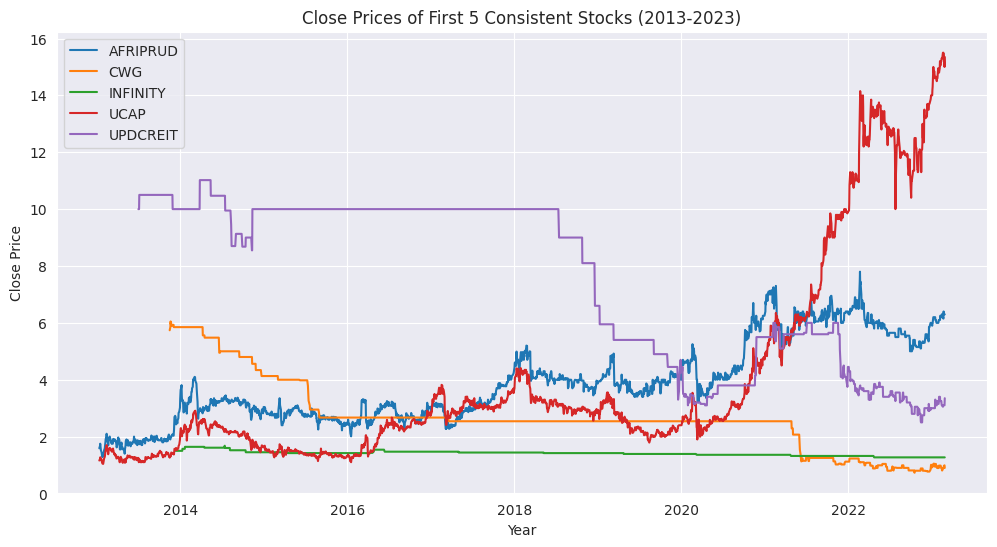

In [70]:
plt.figure(figsize=(12, 6))

# first five stocks
consistent_stocks_subset = consistent_stocks[:5]

for stock_symbol, stock_data in consistent_data[consistent_data['SYMBOL'].isin(consistent_stocks_subset)].groupby('SYMBOL'):
    plt.plot(stock_data.index, stock_data['CLOSEPRICE'], label=stock_symbol)

plt.xlabel('Year')
plt.ylabel('Close Price')
plt.title('Close Prices of First 5 Consistent Stocks (2013-2023)')
plt.legend()
plt.grid(True)
plt.show()

### Others 3

IRRELEVANT ANALYSIS: 0
* None

RELEVANT ANALYSIS: 7
* `CAVERTON, LIVINGTRUST, SEPLAT have a consistency range since 2014
* `TRANSCOHOT` have a consitency range since 2015
* `GSPECPLC, JAIZBANK, MEDVIEWAIR` have a consistency range since 2017

In [71]:
# start and end year
start_year = 2017
end_year = 2023
required_years = list(range(start_year, end_year + 1))

consistent_stocks = []

for stock_symbol, stock_data in tsdata_copy.groupby('SYMBOL'):
    years_with_data = stock_data.index.year.unique()
    if set(required_years) == set(years_with_data):
        consistent_stocks.append(stock_symbol)

consistent_data = tsdata_copy[tsdata_copy['SYMBOL'].isin(consistent_stocks)]
print(consistent_data.SYMBOL.nunique())
print(consistent_data.SYMBOL.unique())

3
['GSPECPLC' 'JAIZBANK' 'MEDVIEWAIR']


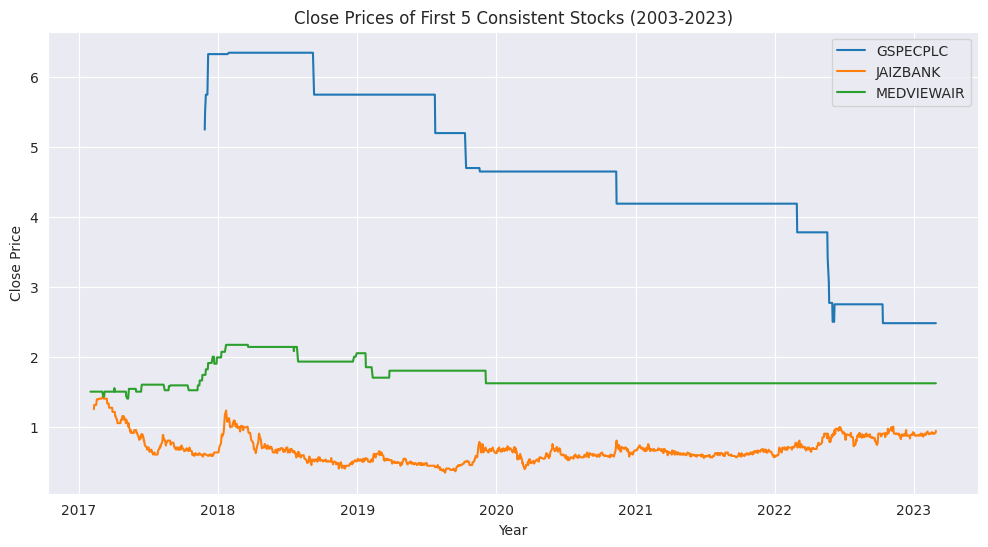

In [72]:
plt.figure(figsize=(12, 6))

# first five stocks
consistent_stocks_subset = consistent_stocks[:5]

for stock_symbol, stock_data in consistent_data[consistent_data['SYMBOL'].isin(consistent_stocks_subset)].groupby('SYMBOL'):
    plt.plot(stock_data.index, stock_data['CLOSEPRICE'], label=stock_symbol)

plt.xlabel('Year')
plt.ylabel('Close Price')
plt.title('Close Prices of First 5 Consistent Stocks (2003-2023)')
plt.legend()
plt.grid(True)
plt.show()


### 2018 to 2023 consistency (5years)

measuring year consistency 

In [73]:
# start and end year
start_year = 2018
end_year = 2023
required_years = list(range(start_year, end_year + 1))

consistent_stocks = []

for stock_symbol, stock_data in tsdata_copy.groupby('SYMBOL'):
    years_with_data = stock_data.index.year.unique()
    if set(required_years) == set(years_with_data):
        consistent_stocks.append(stock_symbol)

consistent_data = tsdata_copy[tsdata_copy['SYMBOL'].isin(consistent_stocks)]
print(consistent_data.SYMBOL.nunique())
print(consistent_data.SYMBOL.unique())

1
['NOTORE']


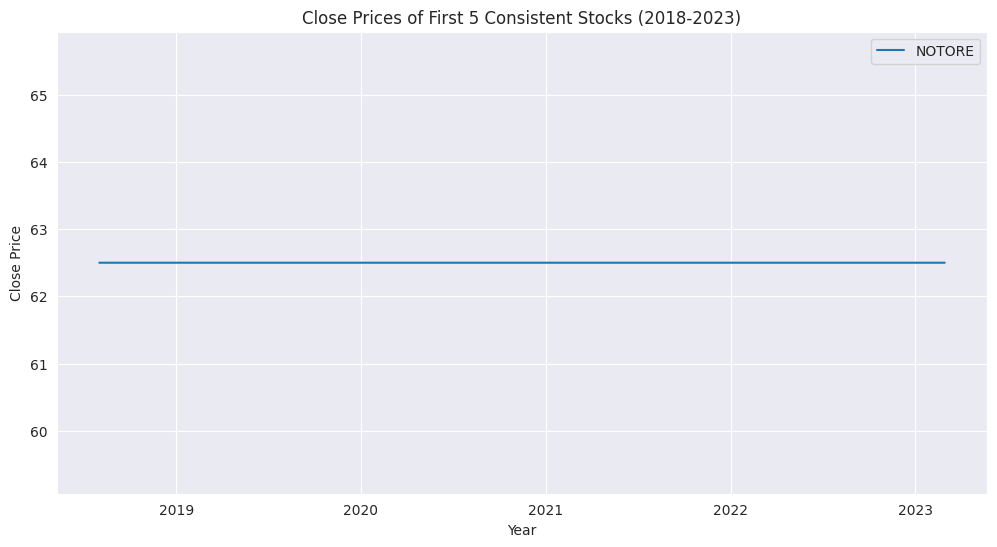

In [74]:
plt.figure(figsize=(12, 6))

# first five stocks
consistent_stocks_subset = consistent_stocks[:5]

for stock_symbol, stock_data in consistent_data[consistent_data['SYMBOL'].isin(consistent_stocks_subset)].groupby('SYMBOL'):
    plt.plot(stock_data.index, stock_data['CLOSEPRICE'], label=stock_symbol)

plt.xlabel('Year')
plt.ylabel('Close Price')
plt.title('Close Prices of First 5 Consistent Stocks (2018-2023)')
plt.legend()
plt.grid(True)
plt.show()


### Others 4

IRRELEVANT ANALYSIS: 0

RELEVANT ANALYSIS: 9
* `AIRTELAFRI, MTNN, SKYAVN` have a consistency range since 2019
* `BAUCEMENT` have a consistency range since 2020
* `BAPLC, NGXGROUP, RONCHESS, TIP` have a consistency range since 2021
* `BUAFOODS, GEREGU` have a consistency range since 2022

In [75]:
# start and end year
start_year = 2019
end_year = 2023
required_years = list(range(start_year, end_year + 1))

consistent_stocks = []

for stock_symbol, stock_data in tsdata_copy.groupby('SYMBOL'):
    years_with_data = stock_data.index.year.unique()
    if set(required_years) == set(years_with_data):
        consistent_stocks.append(stock_symbol)

consistent_data = tsdata_copy[tsdata_copy['SYMBOL'].isin(consistent_stocks)]
print(consistent_data.SYMBOL.nunique())
print(consistent_data.SYMBOL.unique())

3
['AIRTELAFRI' 'MTNN' 'SKYAVN']


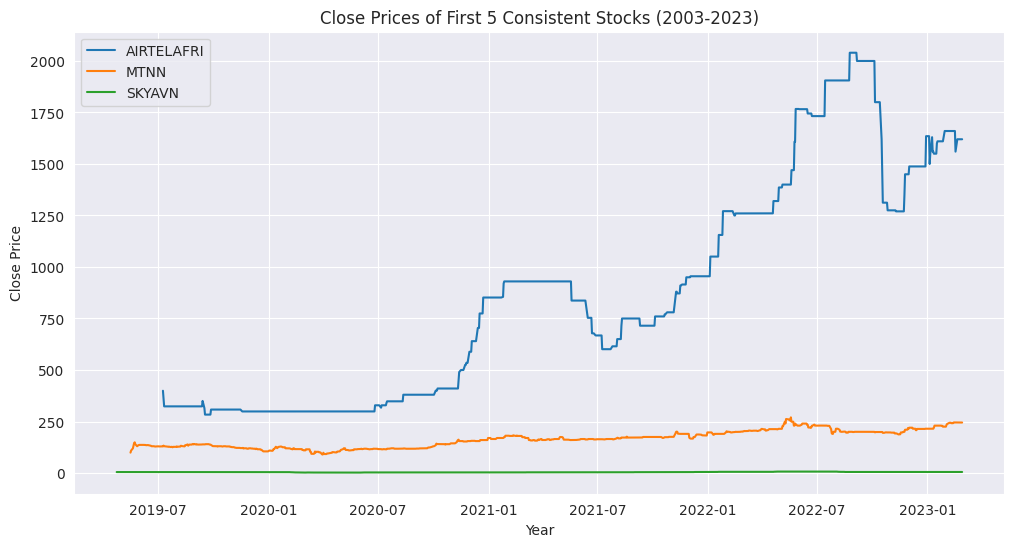

In [76]:
plt.figure(figsize=(12, 6))

# first five stocks
consistent_stocks_subset = consistent_stocks[:5]

for stock_symbol, stock_data in consistent_data[consistent_data['SYMBOL'].isin(consistent_stocks_subset)].groupby('SYMBOL'):
    plt.plot(stock_data.index, stock_data['CLOSEPRICE'], label=stock_symbol)

plt.xlabel('Year')
plt.ylabel('Close Price')
plt.title('Close Prices of First 5 Consistent Stocks (2003-2023)')
plt.legend()
plt.grid(True)
plt.show()


## *** stocks to sector visualization

In [77]:
print(tsdata_copy['SECTOR'].unique())
print(tsdata_copy['SECTOR'].nunique())

['CONSUMER GOODS' 'INDUSTRIAL GOODS' 'SERVICES' 'FINANCIAL SERVICES'
 'HEALTHCARE' 'OIL AND GAS' 'CONGLOMERATES' 'NATURAL RESOURCES'
 'CONSTRUCTION/REAL ESTATE' 'ICT' 'AGRICULTURE' 'UTILITIES']
12


### sector1 - consumer goods

step1: extract stock to sector 

In [78]:
consumer_target_sector = 'CONSUMER GOODS'
cg_stocks_sectordata = tsdata_copy[tsdata_copy['SECTOR'] == consumer_target_sector]
# cgstocks_sector = tsdata_copy[tsdata_copy['SECTOR'] == target_sector]['SYMBOL'] to get only the stocks

print(cg_stocks_sectordata.SYMBOL.nunique())
print(cg_stocks_sectordata.SYMBOL.unique())

51
['7UP' 'ABATEX' 'ABOSELAB' 'AFPRINT' 'ASABATEXT' 'BEVERAGES' 'BEWAC'
 'CADBURY' 'CHAMPION' 'DUNLOP' 'ENAMELWA' 'ENPEE' 'FERDINAND' 'FLOURMILL'
 'FOOTWEAR' 'FOREMOST' 'GOLDBREW' 'GUINNESS' 'INCAR' 'INTBREW'
 'INTRAMOTOR' 'JOSBREW' 'LIZOLOFIN' 'MANDRID' 'NASCON' 'NB' 'NBC' 'NESTLE'
 'NIGLAMPS' 'NNFM' 'NTM' 'PREMBREW' 'PZ' 'RIETZCOT' 'ROKANA' 'TATE'
 'UNILEVER' 'UNIONDICON' 'UNTL' 'UTC' 'VITAFOAM' 'VONO' 'BIGTREAT'
 'DANGSUGAR' 'DANGFLOUR' 'HONYFLOUR' 'MCNICHOLS' 'MULTITREX' 'NTC'
 'WESTEX' 'BUAFOODS']


In [79]:
cg_stocks_sectordata

SYMBOL  CLOSEPRICE    Volume       Value  NoOfTransaction  \
DATE                                                                      
2003-01-03       7UP        6.00   29300.0   175314.00             11.0   
2003-01-06       7UP        5.80   58010.0   337860.80              7.0   
2003-01-07       7UP        6.00   34550.0   207069.00             12.0   
2003-01-08       7UP        5.97   16013.0    95625.35             12.0   
2003-01-09       7UP        5.87   29812.0   176483.64             13.0   
...              ...         ...       ...         ...              ...   
2023-02-22  VITAFOAM       19.40  134622.0  2552199.00             24.0   
2023-02-23  VITAFOAM       19.40  232923.0  4420599.30             24.0   
2023-02-24  VITAFOAM       19.40   93658.0  1799902.65             20.0   
2023-02-27  VITAFOAM       19.40   26410.0   507132.25             15.0   
2023-02-28  VITAFOAM       19.40  140377.0  2664998.50             18.0   

            OpenPrice       EPS   PERatio          SECTOR  
DATE                                                       
2003-01-03        0.0  3.510000  1.709402  CONSUMER GOODS  
2003-01-06        0.0  3.510000  1.652422  CONSUMER GOODS  
2003-01-07        0.0  3.510000  1.709402  CONSUMER GOODS  
2003-01-08        0.0  3.510000  1.700855  CONSUMER GOODS  
2003-01-09        0.0  3.510000  1.672365  CONSUMER GOODS  
...               ...       ...       ...             ...  
2023-02-22       19.4  2.563085  7.569004  CONSUMER GOODS  
2023-02-23       19.4  2.563085  7.569004  CONSUMER GOODS  
2023-02-24       19.4  2.563085  7.569004  CONSUMER GOODS  
2023-02-27       19.4  2.563085  7.569004  CONSUMER GOODS  
2023-02-28       19.4  2.563085  7.569004  CONSUMER GOODS  

[153042 rows x 9 columns]

step2: visualization plot of sector stocks

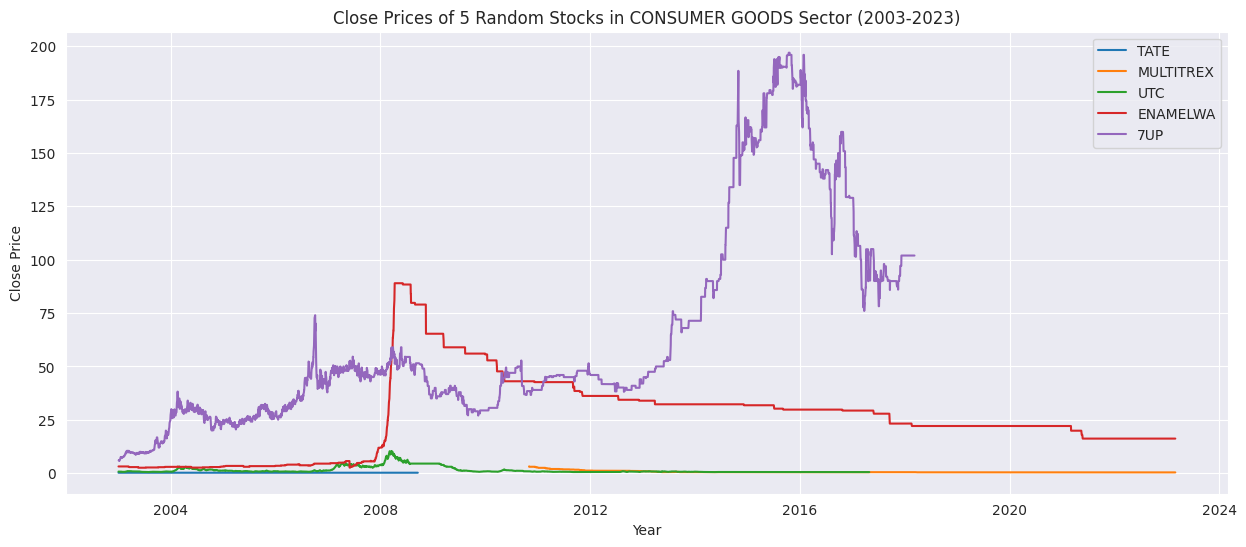

In [80]:
cg_random_stocks = random.sample(list(cg_stocks_sectordata['SYMBOL'].unique()), 5)
plt.figure(figsize = (15, 6))

for cg_stock_symbol in cg_random_stocks:
    cg_stockdata_subset = cg_stocks_sectordata[cg_stocks_sectordata['SYMBOL'] == cg_stock_symbol]
    plt.plot(cg_stockdata_subset.index, cg_stockdata_subset['CLOSEPRICE'], label = cg_stock_symbol)

plt.xlabel('Year')
plt.ylabel('Close Price')
plt.title(f'Close Prices of 5 Random Stocks in {consumer_target_sector} Sector (2003-2023)')
plt.legend()
plt.grid(True)
plt.show()

step3: high value stock to sector filtering and visualization

In [81]:
cg_highprice_stocks = cg_stocks_sectordata.groupby('SYMBOL')['CLOSEPRICE'].max().sort_values(ascending = False)
cg_highprice_stocks[0:10]

SYMBOL
NESTLE       1617.10
GUINNESS      297.41
7UP           197.00
NB            193.00
FLOURMILL     109.24
CADBURY       101.00
NBC            91.50
BUAFOODS       90.00
ENAMELWA       89.00
UNILEVER       76.00
Name: CLOSEPRICE, dtype: float64

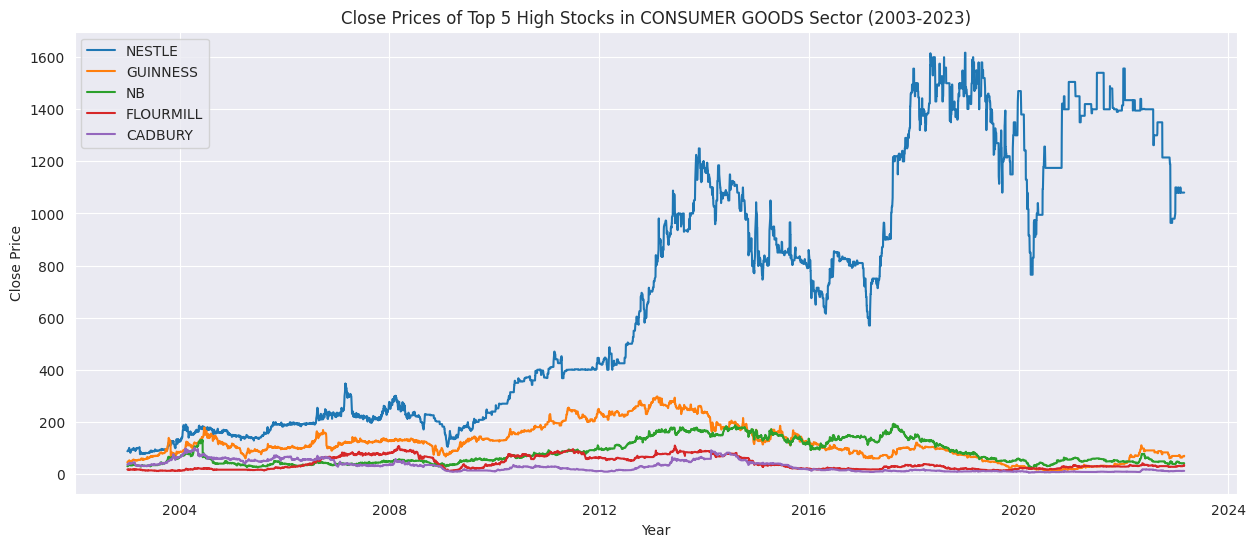

In [82]:
# excluding 7up
exclude = '7UP'
cg_top5_highstocks = cg_highprice_stocks[~cg_highprice_stocks.index.isin([exclude])].head(5)

plt.figure(figsize = (15, 6))

for cg_highstock_symbol in cg_top5_highstocks.index:
    cg_highstockdata_subset = cg_stocks_sectordata[cg_stocks_sectordata['SYMBOL'] == cg_highstock_symbol]
    plt.plot(cg_highstockdata_subset.index, cg_highstockdata_subset['CLOSEPRICE'], label = cg_highstock_symbol)

plt.xlabel('Year')
plt.ylabel('Close Price')
plt.title(f'Close Prices of Top 5 High Stocks in {consumer_target_sector} Sector (2003-2023)')
plt.legend()
plt.grid(True)
plt.show()

### sector2 - industrial goods

step1: extract stock to sector

In [83]:
industrial_target_sector = 'INDUSTRIAL GOODS'
ig_stocks_sectordata = tsdata_copy[tsdata_copy['SECTOR'] == industrial_target_sector]
# cgstocks_sector = tsdata_copy[tsdata_copy['SECTOR'] == target_sector]['SYMBOL'] to get only the stocks

print(ig_stocks_sectordata.SYMBOL.nunique())
print(ig_stocks_sectordata.SYMBOL.unique())

42
['ABPLAST' 'ADSWITCH' 'AFRPAINTS' 'ASHAKACEM' 'AVONCROWN' 'BCC' 'BERGER'
 'BETAGLAS' 'BHN' 'CAP' 'CCNN' 'CERAMIC' 'CUTIX' 'EPICDYNAM' 'FIRSTALUM'
 'FLEXIBLE' 'IPWA' 'MEYER' 'NAMPAK' 'NEWPAK' 'NIGERCEM' 'NIGROPES'
 'NIGSEWING' 'NIGWIRE' 'NIWICABLE' 'NIYAMCO' 'OLUGLASS' 'ONWUTEK'
 'POLYPROD' 'PREMPAINTS' 'STOKVIS' 'TRIPPLEG' 'VANLEER' 'WAGLASS' 'WAPCO'
 'BAGCO' 'PORTPAINT' 'DANGCEM' 'PAINTCOM' 'AUSTINLAZ' 'NOTORE' 'BUACEMENT']


In [84]:
ig_stocks_sectordata

SYMBOL  CLOSEPRICE     Volume         Value  NoOfTransaction  \
DATE                                                                        
2003-01-02  ABPLAST        1.11        0.0  4.200000e+04              7.0   
2003-01-03  ABPLAST        1.11        0.0  1.660000e+03              1.0   
2003-01-06  ABPLAST        1.11        0.0  3.462845e+05              8.0   
2003-01-07  ABPLAST        1.11        0.0  5.000000e+02              7.0   
2003-01-08  ABPLAST        1.11        0.0  1.080000e+03             15.0   
...             ...         ...        ...           ...              ...   
2023-02-22    WAPCO       25.50  1868594.0  4.764683e+07             54.0   
2023-02-23    WAPCO       25.80  1264679.0  3.262336e+07             54.0   
2023-02-24    WAPCO       25.60  4488351.0  1.150227e+08            123.0   
2023-02-27    WAPCO       26.00  3541732.0  9.181335e+07             72.0   
2023-02-28    WAPCO       27.40  4961879.0  1.338198e+08            220.0   

            OpenPrice       EPS    PERatio            SECTOR  
DATE                                                          
2003-01-02        0.0  0.100000  11.100000  INDUSTRIAL GOODS  
2003-01-03        0.0  0.100000  11.100000  INDUSTRIAL GOODS  
2003-01-06        0.0  0.100000  11.100000  INDUSTRIAL GOODS  
2003-01-07        0.0  0.100000  11.100000  INDUSTRIAL GOODS  
2003-01-08        0.0  0.100000  11.100000  INDUSTRIAL GOODS  
...               ...       ...        ...               ...  
2023-02-22       25.5  2.866096   8.897120  INDUSTRIAL GOODS  
2023-02-23       25.5  2.866096   9.001792  INDUSTRIAL GOODS  
2023-02-24       25.8  2.866096   8.932011  INDUSTRIAL GOODS  
2023-02-27       25.6  2.866096   9.071573  INDUSTRIAL GOODS  
2023-02-28       26.0  2.866096   9.560043  INDUSTRIAL GOODS  

[127344 rows x 9 columns]

step2: visualization plot of sector stocks

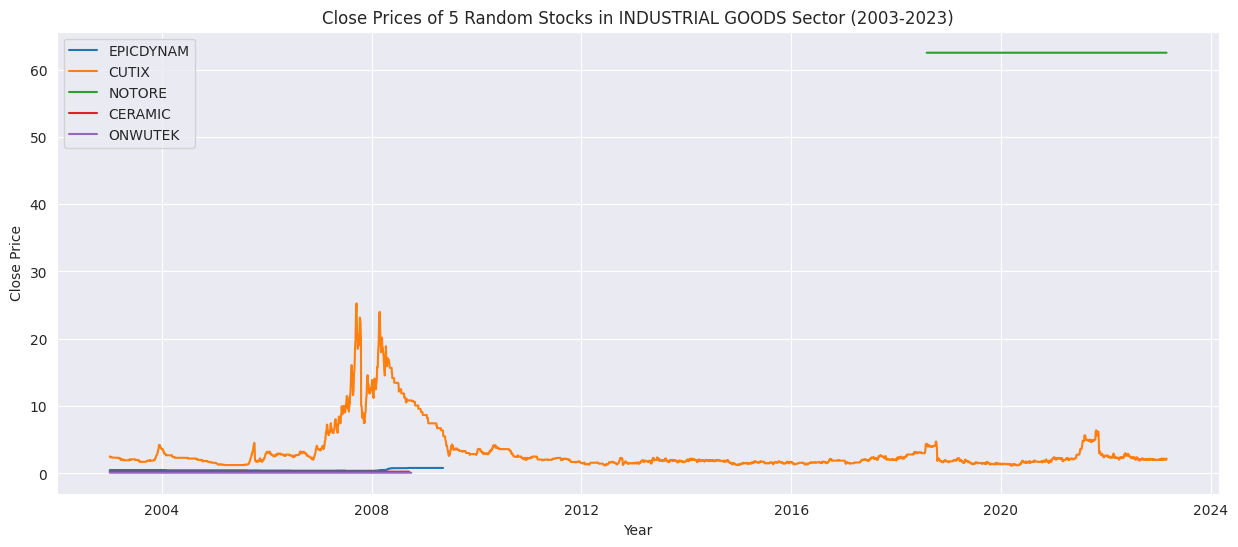

In [85]:
ig_random_stocks = random.sample(list(ig_stocks_sectordata['SYMBOL'].unique()), 5)
plt.figure(figsize = (15, 6))

for ig_stock_symbol in ig_random_stocks:
    ig_stockdata_subset = ig_stocks_sectordata[ig_stocks_sectordata['SYMBOL'] == ig_stock_symbol]
    plt.plot(ig_stockdata_subset.index, ig_stockdata_subset['CLOSEPRICE'], label = ig_stock_symbol)

plt.xlabel('Year')
plt.ylabel('Close Price')
plt.title(f'Close Prices of 5 Random Stocks in {industrial_target_sector} Sector (2003-2023)')
plt.legend()
plt.grid(True)
plt.show()

step3: high value stock to sector filtering and visualization

In [86]:
ig_highprice_stocks = ig_stocks_sectordata.groupby('SYMBOL')['CLOSEPRICE'].max().sort_values(ascending = False)
ig_highprice_stocks[0:10]

SYMBOL
DANGCEM      300.00
WAPCO        131.00
BUACEMENT     99.45
CAP           93.00
BETAGLAS      90.45
ASHAKACEM     84.89
BCC           70.00
NOTORE        62.50
CCNN          38.66
CUTIX         25.25
Name: CLOSEPRICE, dtype: float64

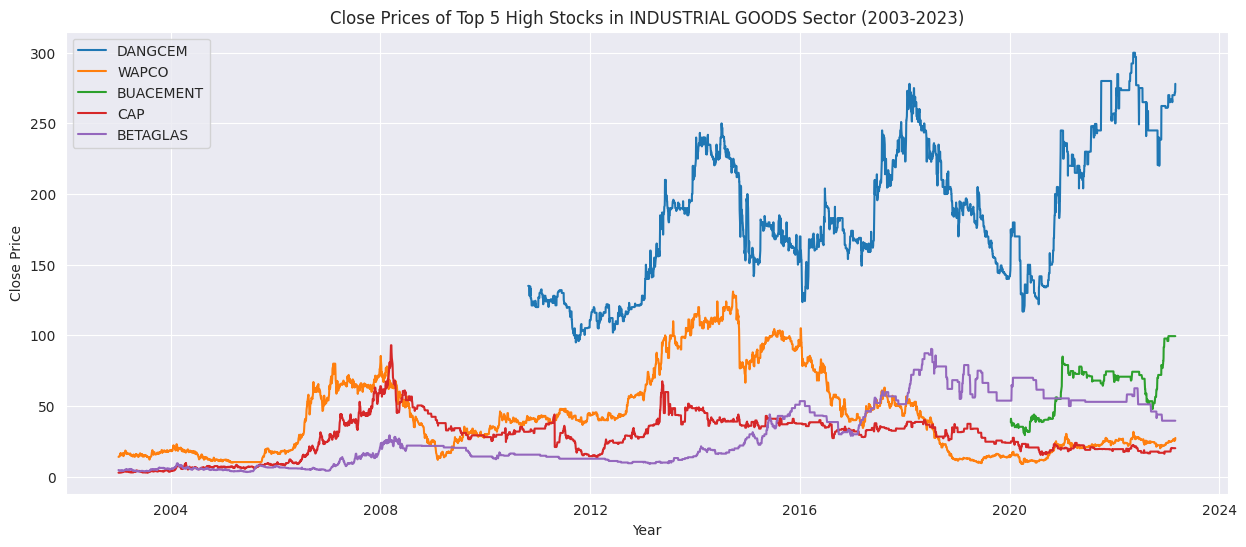

In [87]:
ig_top5_highstocks = ig_highprice_stocks.head(5)

plt.figure(figsize = (15, 6))

for ig_highstock_symbol in ig_top5_highstocks.index:
    ig_highstockdata_subset = ig_stocks_sectordata[ig_stocks_sectordata['SYMBOL'] == ig_highstock_symbol]
    plt.plot(ig_highstockdata_subset.index, ig_highstockdata_subset['CLOSEPRICE'], label = ig_highstock_symbol)

plt.xlabel('Year')
plt.ylabel('Close Price')
plt.title(f'Close Prices of Top 5 High Stocks in {industrial_target_sector} Sector (2003-2023)')
plt.legend()
plt.grid(True)
plt.show()

### sector3 - services

step1: extract stock to sector

In [88]:
service_target_sector = 'SERVICES'
s_stocks_sectordata = tsdata_copy[tsdata_copy['SECTOR'] == service_target_sector]
# cgstocks_sector = tsdata_copy[tsdata_copy['SECTOR'] == target_sector]['SYMBOL'] to get only the stocks

print(s_stocks_sectordata.SYMBOL.nunique())
print(s_stocks_sectordata.SYMBOL.unique())

33
['ACADEMY' 'ADC' 'ALBARKAIR' 'CILEASING' 'DTIMES' 'EUNISELL' 'JULI'
 'LEARNAFRCA' 'LENNARDS' 'MNS' 'RTBRISCOE' 'STUDPRESS' 'TRANSEXPR'
 'UDEOFSON' 'UPL' 'TOURIST' 'ABCTRANS' 'NAHCO' 'AIRSERVICE' 'IKEJAHOTEL'
 'NSLTECH' 'REDSTAREX' 'CAPHOTEL' 'DAARCOMM' 'TANTALIZER' 'AFROMEDIA'
 'CAVERTON' 'TRANSCOHOT' 'INITSPLC' 'GSPECPLC' 'MEDVIEWAIR' 'SKYAVN' 'TIP']


In [89]:
s_stocks_sectordata

SYMBOL  CLOSEPRICE    Volume      Value  NoOfTransaction  \
DATE                                                                    
2003-01-02  ACADEMY        0.53       0.0   42000.00              7.0   
2003-01-03  ACADEMY        0.53       0.0    1660.00              1.0   
2003-01-06  ACADEMY        0.53       0.0  346284.45              8.0   
2003-01-07  ACADEMY        0.53    2400.0    1272.00              1.0   
2003-01-08  ACADEMY        0.53    4460.0    2363.80              2.0   
...             ...         ...       ...        ...              ...   
2023-02-22      UPL        2.00  320433.0  637663.77              8.0   
2023-02-23      UPL        2.00       0.0       0.00              0.0   
2023-02-24      UPL        2.00   53638.0  107766.68              3.0   
2023-02-27      UPL        2.00       0.0       0.00              0.0   
2023-02-28      UPL        2.00       0.0       0.00              0.0   

            OpenPrice       EPS   PERatio    SECTOR  
DATE                                                 
2003-01-02        0.0  0.110000  4.818182  SERVICES  
2003-01-03        0.0  0.110000  4.818182  SERVICES  
2003-01-06        0.0  0.110000  4.818182  SERVICES  
2003-01-07        0.0  0.110000  4.818182  SERVICES  
2003-01-08        0.0  0.110000  4.818182  SERVICES  
...               ...       ...       ...       ...  
2023-02-22        1.9  0.586396  3.410664  SERVICES  
2023-02-23        2.0  0.586396  3.410664  SERVICES  
2023-02-24        2.0  0.586396  3.410664  SERVICES  
2023-02-27        2.0  0.586396  3.410664  SERVICES  
2023-02-28        2.0  0.586396  3.410664  SERVICES  

[107063 rows x 9 columns]

step2: visualization plot of stock to sector

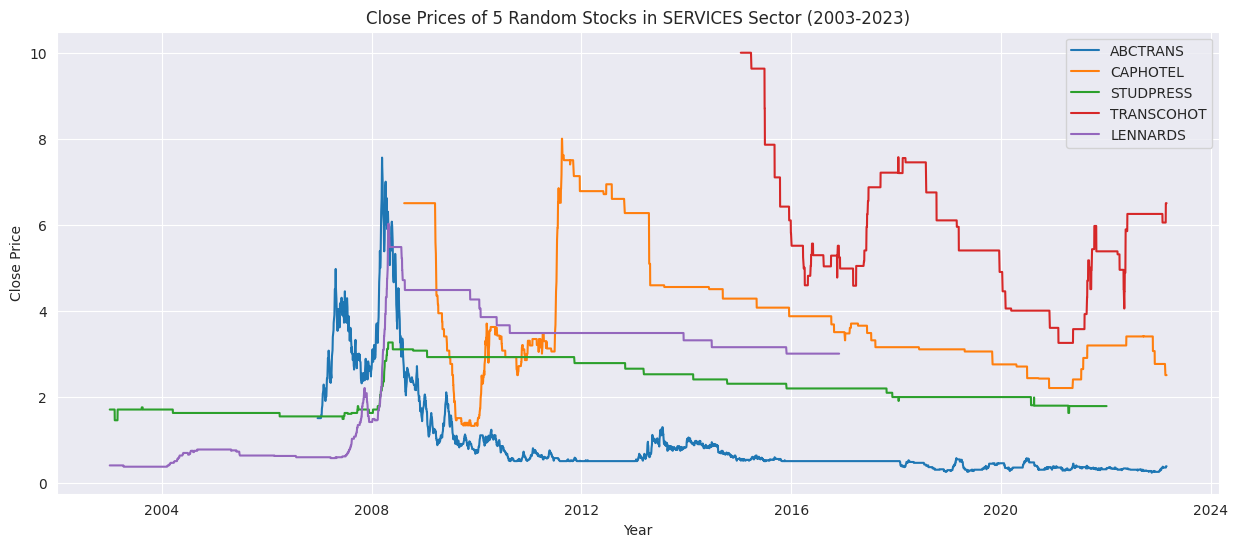

In [90]:
s_random_stocks = random.sample(list(s_stocks_sectordata['SYMBOL'].unique()), 5)
plt.figure(figsize = (15, 6))

for s_stock_symbol in s_random_stocks:
    s_stockdata_subset = s_stocks_sectordata[s_stocks_sectordata['SYMBOL'] == s_stock_symbol]
    plt.plot(s_stockdata_subset.index, s_stockdata_subset['CLOSEPRICE'], label = s_stock_symbol)

plt.xlabel('Year')
plt.ylabel('Close Price')
plt.title(f'Close Prices of 5 Random Stocks in {service_target_sector} Sector (2003-2023)')
plt.legend()
plt.grid(True)
plt.show()

step3: high value stock to sector filtering and visualization

In [91]:
s_highprice_stocks = s_stocks_sectordata.groupby('SYMBOL')['CLOSEPRICE'].max().sort_values(ascending = False)
s_highprice_stocks[0:10]

SYMBOL
MNS           87.90
NAHCO         70.05
RTBRISCOE     35.50
LEARNAFRCA    31.40
AIRSERVICE    28.51
NSLTECH       19.70
CILEASING     17.50
UPL           15.43
ACADEMY       15.00
REDSTAREX     12.45
Name: CLOSEPRICE, dtype: float64

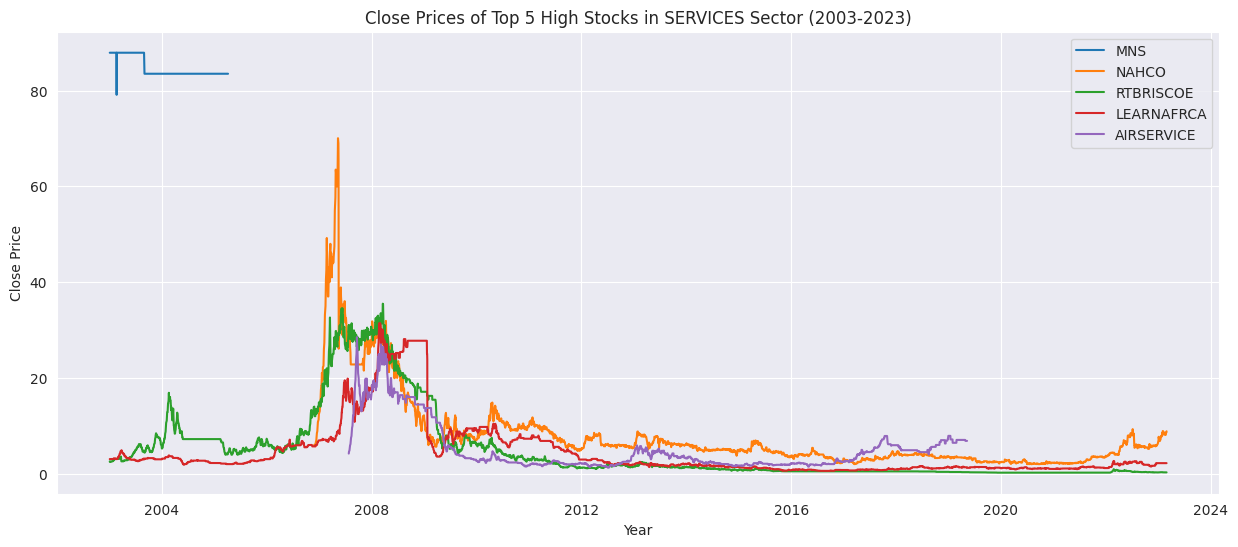

In [92]:
s_top5_highstocks = s_highprice_stocks.head(5)

plt.figure(figsize = (15, 6))

for s_highstock_symbol in s_top5_highstocks.index:
    s_highstockdata_subset = s_stocks_sectordata[s_stocks_sectordata['SYMBOL'] == s_highstock_symbol]
    plt.plot(s_highstockdata_subset.index, s_highstockdata_subset['CLOSEPRICE'], label = s_highstock_symbol)

plt.xlabel('Year')
plt.ylabel('Close Price')
plt.title(f'Close Prices of Top 5 High Stocks in {service_target_sector} Sector (2003-2023)')
plt.legend()
plt.grid(True)
plt.show()

### sector4 - financial service

step1: extrack stock data

In [93]:
financial_target_sector = 'FINANCIAL SERVICES'
fs_stocks_sectordata = tsdata_copy[tsdata_copy['SECTOR'] == financial_target_sector]
# cgstocks_sector = tsdata_copy[tsdata_copy['SECTOR'] == target_sector]['SYMBOL'] to get only the stocks

print(fs_stocks_sectordata.SYMBOL.nunique())
print(fs_stocks_sectordata.SYMBOL.unique())

105
['ACCESSCORP' 'AFEXBANK' 'AFRIBANK' 'AIICO' 'AMICABLE' 'ATLANTICBK'
 'BAICO' 'CHARTERED' 'CONFDINS' 'COOPBANK' 'COOPDEV' 'CORNERST' 'CRUSADER'
 'EKOBANK' 'FBNH' 'FIRSTCAP' 'FIRSTINLND' 'FSB' 'GTCO' 'GUINEAINS'
 'GULFBANK' 'HALLBANK' 'IMB' 'INTERCONT' 'LASACO' 'LAWUNION' 'LIBERTY'
 'LINKASSURE' 'LIONBANK' 'MANNYBANK' 'MBENEFIT' 'NEM' 'NESF' 'NIDBFUND'
 'NIGERINS' 'PRESTIGE' 'REGBANK' 'ROYALEX' 'SAVANNA' 'SECASSURE'
 'SPRINGBANK' 'STDINSURE' 'STERLNBANK' 'SUNINS' 'SUNUASSUR' 'TIB'
 'TRADEBANK' 'UBA' 'UBN' 'UNIC' 'UTB' 'WAPIC' 'WEMABANK' 'ACBINTBANK'
 'ACENINS' 'FCMB' 'OCEANIC' 'STB' 'ZENITHBANK' 'DIAMONDBNK' 'FIDELITYBK'
 'GNI' 'GUARDIANXP' 'PLATINUM' 'SKYEBANK' 'STANBIC' 'UNITYBNK' 'ECOBANK'
 'ETI' 'NFINSURE' 'SOVRENINS' 'UNHOMES' 'CONTINSURE' 'DEAPCAP'
 'INTENEGINS' 'OASISINS' 'STACO' 'ABBEYBDS' 'ASOSAVINGS' 'CHIPLC'
 'GOLDINSURE' 'IAINSURE' 'REGALINS' 'UNIVINSURE' 'AFRINSURE' 'MANSARD'
 'RESORTSAL' 'VERITASKAP' 'NPFMCRFBK' '1STFINBANK' '2NDINTERCO' 'ACB'
 'ALLIEDBANK' 'ALPHA' 'FOR

In [94]:
fs_stocks_sectordata

SYMBOL  CLOSEPRICE      Volume         Value  NoOfTransaction  \
DATE                                                                            
2003-01-02  ACCESSCORP        1.82    247250.0  4.582450e+05             14.0   
2003-01-03  ACCESSCORP        1.83  11989622.0  2.194100e+07              8.0   
2003-01-06  ACCESSCORP        1.90    946090.0  1.758260e+06             32.0   
2003-01-07  ACCESSCORP        1.90    597156.0  1.134996e+06             30.0   
2003-01-08  ACCESSCORP        1.98    244000.0  4.775200e+05             12.0   
...                ...         ...         ...           ...              ...   
2023-02-22  ZENITHBANK       25.20  13000968.0  3.261339e+08            212.0   
2023-02-23  ZENITHBANK       25.35  11525976.0  2.921314e+08            199.0   
2023-02-24  ZENITHBANK       25.75   8129969.0  2.066553e+08            167.0   
2023-02-27  ZENITHBANK       25.95   7953025.0  2.055500e+08            193.0   
2023-02-28  ZENITHBANK       26.50  34247198.0  9.075359e+08            350.0   

            OpenPrice        EPS    PERatio              SECTOR  
DATE                                                             
2003-01-02       0.00   0.110000  16.545455  FINANCIAL SERVICES  
2003-01-03       0.00   0.110000  16.636364  FINANCIAL SERVICES  
2003-01-06       0.00   0.110000  17.272727  FINANCIAL SERVICES  
2003-01-07       0.00   0.110000  17.272727  FINANCIAL SERVICES  
2003-01-08       0.00   0.110000  18.000000  FINANCIAL SERVICES  
...               ...        ...        ...                 ...  
2023-02-22      25.00  13.303581   1.894227  FINANCIAL SERVICES  
2023-02-23      25.20  13.303581   1.905502  FINANCIAL SERVICES  
2023-02-24      25.35  13.303581   1.935569  FINANCIAL SERVICES  
2023-02-27      25.75  13.303581   1.950603  FINANCIAL SERVICES  
2023-02-28      25.95  13.303581   1.991945  FINANCIAL SERVICES  

[274502 rows x 9 columns]

step2: visualization plot of stock to sector

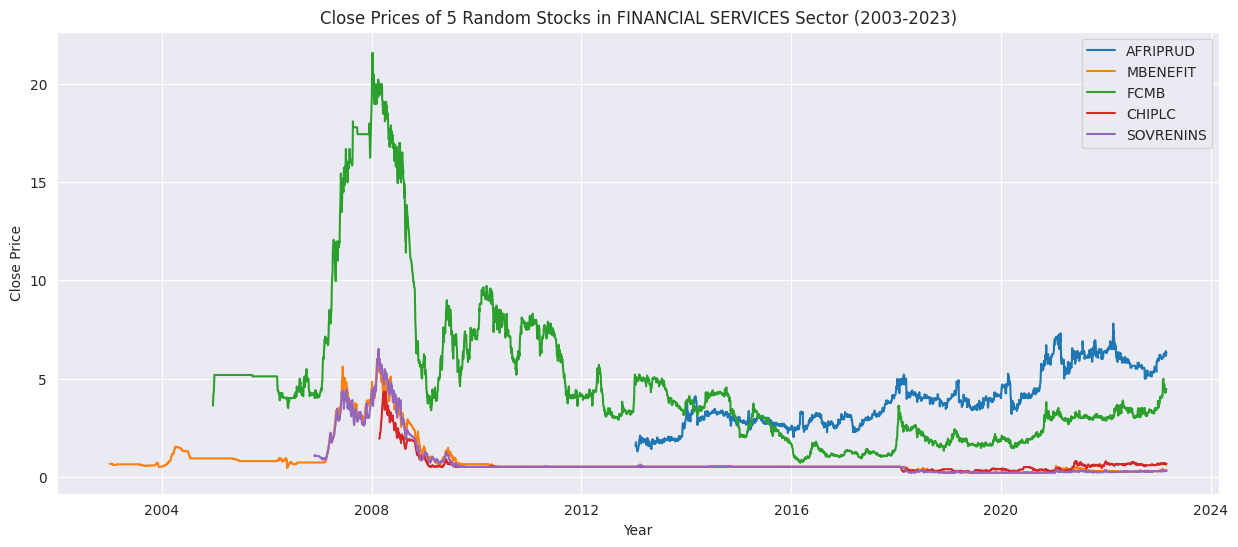

In [95]:
fs_random_stocks = random.sample(list(fs_stocks_sectordata['SYMBOL'].unique()), 5)
plt.figure(figsize = (15, 6))

for fs_stock_symbol in fs_random_stocks:
    fs_stockdata_subset = fs_stocks_sectordata[fs_stocks_sectordata['SYMBOL'] == fs_stock_symbol]
    plt.plot(fs_stockdata_subset.index, fs_stockdata_subset['CLOSEPRICE'], label = fs_stock_symbol)

plt.xlabel('Year')
plt.ylabel('Close Price')
plt.title(f'Close Prices of 5 Random Stocks in {financial_target_sector} Sector (2003-2023)')
plt.legend()
plt.grid(True)
plt.show()

step3: high value stock to sector filtering and visualization

In [96]:
fs_highprice_stocks = fs_stocks_sectordata.groupby('SYMBOL')['CLOSEPRICE'].max().sort_values(ascending = False)
fs_highprice_stocks[0:10]

SYMBOL
NIDBFUND      7634.15
NESF           945.00
ETI            337.73
FBNH            72.76
ZENITHBANK      68.97
UBA             63.94
GTCO            54.71
STANBIC         53.25
UBN             50.33
INTERCONT       45.79
Name: CLOSEPRICE, dtype: float64

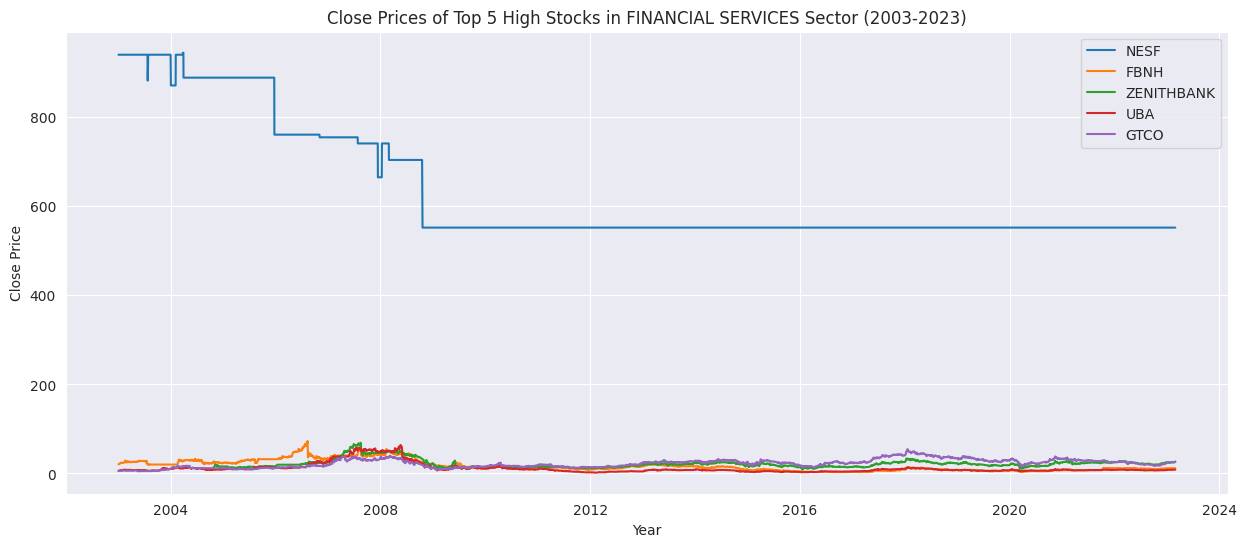

In [97]:
fs_exclude1 = 'NIDBFUND'
fs_exclude2 = 'ETI'
fs_top5_highstocks = fs_highprice_stocks[~fs_highprice_stocks.index.isin([fs_exclude1, fs_exclude2])].head(5)
# fs_top5_highstocks = fs_highprice_stocks.head(5)

plt.figure(figsize = (15, 6))

for fs_highstock_symbol in fs_top5_highstocks.index:
    fs_highstockdata_subset = fs_stocks_sectordata[fs_stocks_sectordata['SYMBOL'] == fs_highstock_symbol]
    plt.plot(fs_highstockdata_subset.index, fs_highstockdata_subset['CLOSEPRICE'], label = fs_highstock_symbol)

plt.xlabel('Year')
plt.ylabel('Close Price')
plt.title(f'Close Prices of Top 5 High Stocks in {financial_target_sector} Sector (2003-2023)')
plt.legend()
plt.grid(True)
plt.show()

### sector5 - healthcare


step1: extract stock data

In [98]:
healthcare_target_sector = 'HEALTHCARE'
h_stocks_sectordata = tsdata_copy[tsdata_copy['SECTOR'] == healthcare_target_sector]
# cgstocks_sector = tsdata_copy[tsdata_copy['SECTOR'] == target_sector]['SYMBOL'] to get only the stocks

print(h_stocks_sectordata.SYMBOL.nunique())
print(h_stocks_sectordata.SYMBOL.unique())

15
['AFRIK' 'BCN' 'CHRISTLIB' 'EKOCORP' 'EVANSMED' 'GLAXOSMITH' 'MAUREEN'
 'MAYBAKER' 'MORISON' 'NEIMETH' 'NIG-GERMAN' 'PHARMDEKO' 'FIDSON'
 'UNIONDAC' 'STERLING']


In [99]:
h_stocks_sectordata

SYMBOL  CLOSEPRICE   Volume      Value  NoOfTransaction  \
DATE                                                                     
2003-01-02      AFRIK        0.50      0.0   42000.00              7.0   
2003-01-03      AFRIK        0.50      0.0    1660.00              1.0   
2003-01-06      AFRIK        0.50      0.0  346284.45              8.0   
2003-01-07      AFRIK        0.50      0.0     500.00              7.0   
2003-01-08      AFRIK        0.50      0.0    1080.00             15.0   
...               ...         ...      ...        ...              ...   
2023-02-22  PHARMDEKO        1.89    950.0    1852.50              2.0   
2023-02-23  PHARMDEKO        1.89   2900.0    5655.00              2.0   
2023-02-24  PHARMDEKO        1.89      0.0       0.00              0.0   
2023-02-27  PHARMDEKO        1.89  11000.0   20610.00              5.0   
2023-02-28  PHARMDEKO        1.89      0.0       0.00              0.0   

            OpenPrice   EPS   PERatio      SECTOR  
DATE                                               
2003-01-02       0.00  0.06  8.333333  HEALTHCARE  
2003-01-03       0.00  0.06  8.333333  HEALTHCARE  
2003-01-06       0.00  0.06  8.333333  HEALTHCARE  
2003-01-07       0.00  0.06  8.333333  HEALTHCARE  
2003-01-08       0.00  0.06  8.333333  HEALTHCARE  
...               ...   ...       ...         ...  
2023-02-22       1.89  0.00  0.000000  HEALTHCARE  
2023-02-23       1.89  0.00  0.000000  HEALTHCARE  
2023-02-24       1.89  0.00  0.000000  HEALTHCARE  
2023-02-27       1.89  0.00  0.000000  HEALTHCARE  
2023-02-28       1.89  0.00  0.000000  HEALTHCARE  

[54369 rows x 9 columns]

step2: visualization plot of stock to sector

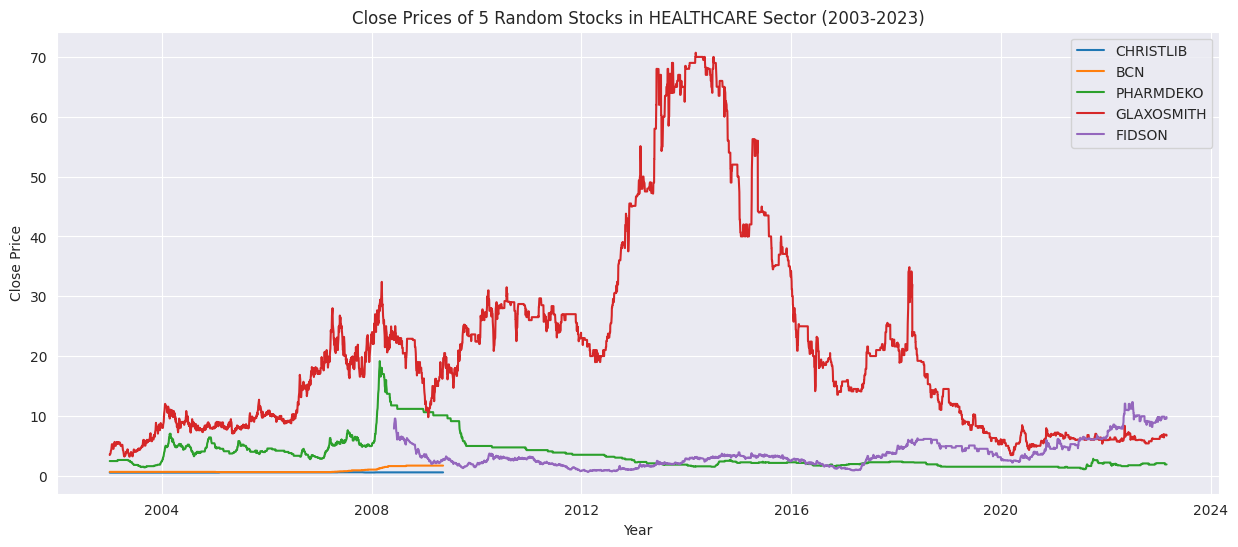

In [100]:
h_random_stocks = random.sample(list(h_stocks_sectordata['SYMBOL'].unique()), 5)
plt.figure(figsize = (15, 6))

for h_stock_symbol in h_random_stocks:
    h_stockdata_subset = h_stocks_sectordata[h_stocks_sectordata['SYMBOL'] == h_stock_symbol]
    plt.plot(h_stockdata_subset.index, h_stockdata_subset['CLOSEPRICE'], label = h_stock_symbol)

plt.xlabel('Year')
plt.ylabel('Close Price')
plt.title(f'Close Prices of 5 Random Stocks in {healthcare_target_sector} Sector (2003-2023)')
plt.legend()
plt.grid(True)
plt.show()

step3: high value stock to sector filtering and visualization

In [101]:
h_highprice_stocks = h_stocks_sectordata.groupby('SYMBOL')['CLOSEPRICE'].max().sort_values(ascending = False)
h_highprice_stocks[0:10]

SYMBOL
GLAXOSMITH    70.70
NIG-GERMAN    32.00
MORISON       25.00
PHARMDEKO     19.15
MAYBAKER      19.12
EKOCORP       15.31
NEIMETH       14.35
EVANSMED      14.00
FIDSON        12.30
STERLING       4.87
Name: CLOSEPRICE, dtype: float64

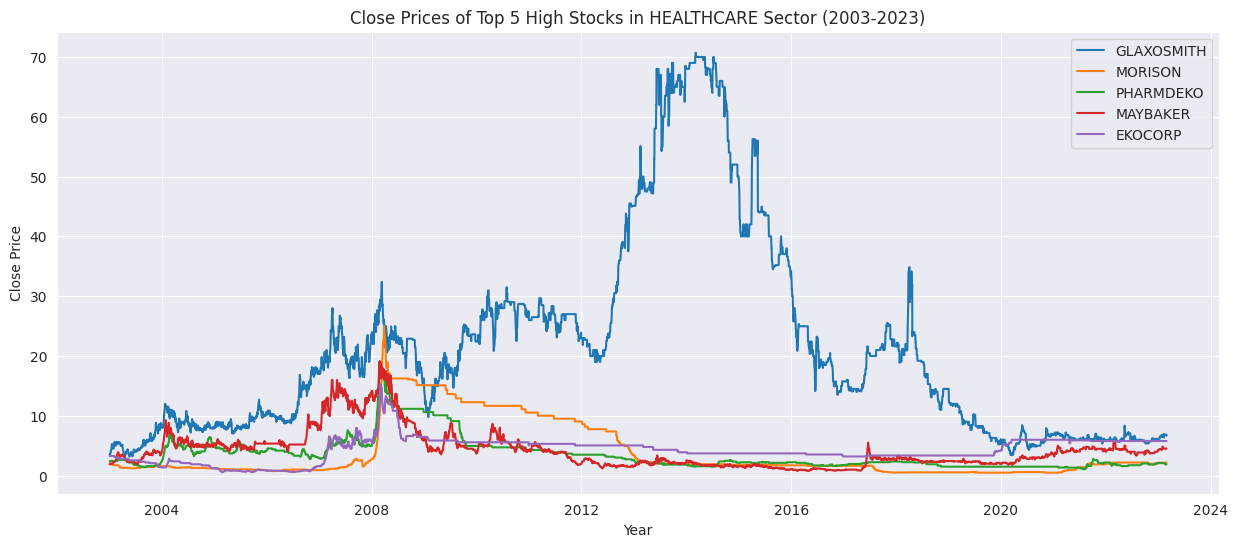

In [102]:
h_exclude = 'NIG-GERMAN'
h_top5_highstocks = h_highprice_stocks[~h_highprice_stocks.index.isin([h_exclude])].head(5)
# h_top5_highstocks = h_highprice_stocks.head(5)

plt.figure(figsize = (15, 6))

for h_highstock_symbol in h_top5_highstocks.index:
    h_highstockdata_subset = h_stocks_sectordata[h_stocks_sectordata['SYMBOL'] == h_highstock_symbol]
    plt.plot(h_highstockdata_subset.index, h_highstockdata_subset['CLOSEPRICE'], label = h_highstock_symbol)

plt.xlabel('Year')
plt.ylabel('Close Price')
plt.title(f'Close Prices of Top 5 High Stocks in {healthcare_target_sector} Sector (2003-2023)')
plt.legend()
plt.grid(True)
plt.show()

### sector6 - oil and gas

step1: extract stock data

In [103]:
og_target_sector = 'OIL AND GAS'
og_stocks_sectordata = tsdata_copy[tsdata_copy['SECTOR'] == og_target_sector]
# cgstocks_sector = tsdata_copy[tsdata_copy['SECTOR'] == target_sector]['SYMBOL'] to get only the stocks

print(og_stocks_sectordata.SYMBOL.nunique())
print(og_stocks_sectordata.SYMBOL.unique())

17
['AFROIL' 'AGIP' 'ANINO' 'ARDOVA' 'CAPOIL' 'CONOIL' 'ETERNA' 'MOBIL' 'MRS'
 'OANDO' 'RAKUNITY' 'TOTAL' 'TROPICPET' 'UNIONVENT' 'JAPAULGOLD'
 'BECOPETRO' 'SEPLAT']


In [104]:
og_stocks_sectordata

SYMBOL  CLOSEPRICE   Volume        Value  NoOfTransaction  \
DATE                                                                    
2003-01-02  AFROIL        0.25      0.0     42000.00              7.0   
2003-01-03  AFROIL        0.25      0.0      1660.00              1.0   
2003-01-06  AFROIL        0.25      0.0    346284.45              8.0   
2003-01-07  AFROIL        0.25      0.0       500.00              7.0   
2003-01-08  AFROIL        0.25      0.0      1080.00             15.0   
...            ...         ...      ...          ...              ...   
2023-02-22   TOTAL      218.80  36282.0   7694044.70             32.0   
2023-02-23   TOTAL      218.80  52699.0  11471403.80             28.0   
2023-02-24   TOTAL      218.80   3892.0    848813.60             12.0   
2023-02-27   TOTAL      218.80   2748.0    591380.50             17.0   
2023-02-28   TOTAL      218.80  39622.0   8658969.30             27.0   

            OpenPrice       EPS    PERatio       SECTOR  
DATE                                                     
2003-01-02        0.0  2.337381   0.000000  OIL AND GAS  
2003-01-03        0.0  2.337381   0.000000  OIL AND GAS  
2003-01-06        0.0  2.337381   0.000000  OIL AND GAS  
2003-01-07        0.0  2.337381   0.000000  OIL AND GAS  
2003-01-08        0.0  2.337381   0.000000  OIL AND GAS  
...               ...       ...        ...          ...  
2023-02-22      218.8  5.442333  40.203347  OIL AND GAS  
2023-02-23      218.8  5.442333  40.203347  OIL AND GAS  
2023-02-24      218.8  5.442333  40.203347  OIL AND GAS  
2023-02-27      218.8  5.442333  40.203347  OIL AND GAS  
2023-02-28      218.8  5.442333  40.203347  OIL AND GAS  

[65721 rows x 9 columns]

step2: visualization plot of stock to sector

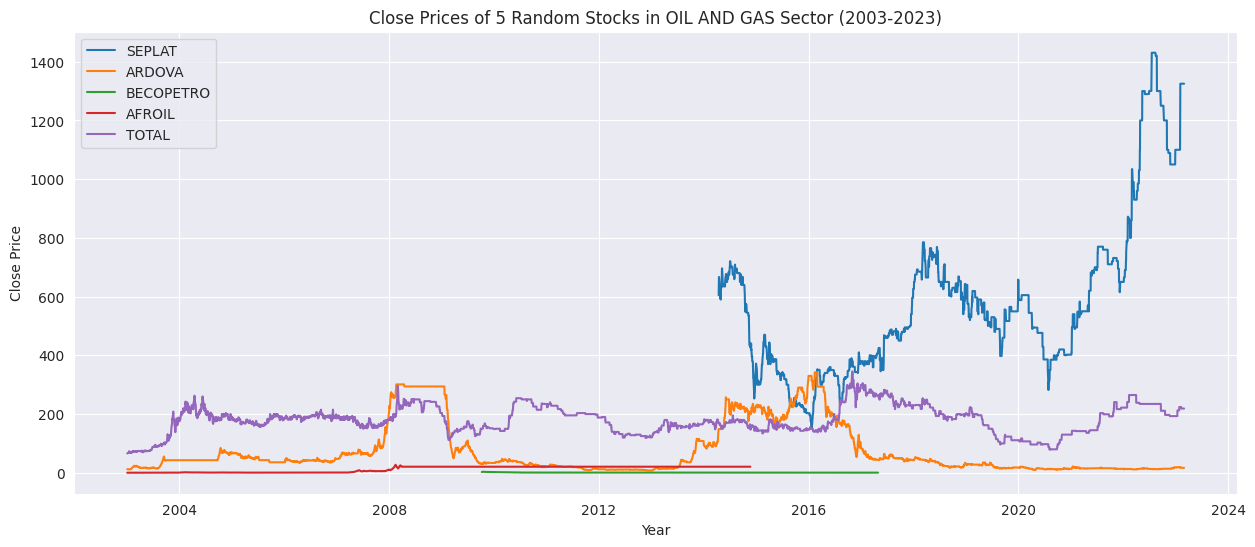

In [105]:
og_random_stocks = random.sample(list(og_stocks_sectordata['SYMBOL'].unique()), 5)
plt.figure(figsize = (15, 6))

for og_stock_symbol in og_random_stocks:
    og_stockdata_subset = og_stocks_sectordata[og_stocks_sectordata['SYMBOL'] == og_stock_symbol]
    plt.plot(og_stockdata_subset.index, og_stockdata_subset['CLOSEPRICE'], label = og_stock_symbol)

plt.xlabel('Year')
plt.ylabel('Close Price')
plt.title(f'Close Prices of 5 Random Stocks in {og_target_sector} Sector (2003-2023)')
plt.legend()
plt.grid(True)
plt.show()

step3: high value stock to sector filtering and visualization

In [106]:
og_highprice_stocks = og_stocks_sectordata.groupby('SYMBOL')['CLOSEPRICE'].max().sort_values(ascending = False)
og_highprice_stocks[0:10]

SYMBOL
SEPLAT    1430.50
MRS        441.00
MOBIL      402.00
TOTAL      345.00
ARDOVA     342.00
OANDO      282.77
CONOIL     195.51
ETERNA      54.72
AFROIL      27.46
AGIP        21.06
Name: CLOSEPRICE, dtype: float64

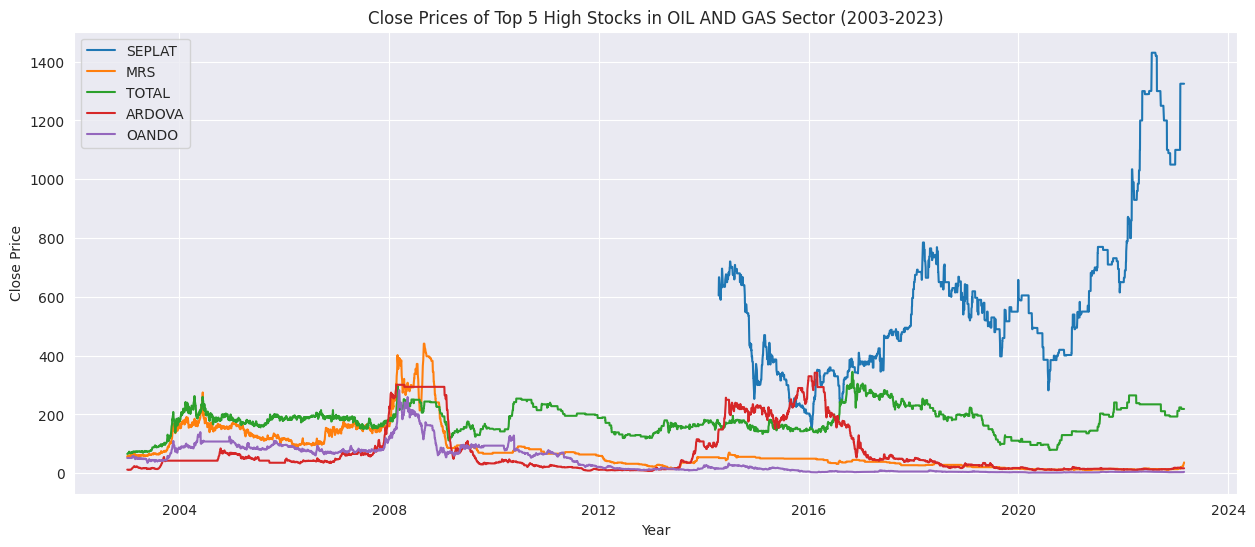

In [107]:
og_exclude = 'MOBIL'
og_top5_highstocks = og_highprice_stocks[~og_highprice_stocks.index.isin([og_exclude])].head(5)
# og_top5_highstocks = og_highprice_stocks.head(5)

plt.figure(figsize = (15, 6))

for og_highstock_symbol in og_top5_highstocks.index:
    og_highstockdata_subset = og_stocks_sectordata[og_stocks_sectordata['SYMBOL'] == og_highstock_symbol]
    plt.plot(og_highstockdata_subset.index, og_highstockdata_subset['CLOSEPRICE'], label = og_highstock_symbol)

plt.xlabel('Year')
plt.ylabel('Close Price')
plt.title(f'Close Prices of Top 5 High Stocks in {og_target_sector} Sector (2003-2023)')
plt.legend()
plt.grid(True)
plt.show()

### sector7 - conglomerates

step1: extract stock data

In [108]:
conglomerates_target_sector = 'CONGLOMERATES'
conglomerates_stocks_sectordata = tsdata_copy[tsdata_copy['SECTOR'] == conglomerates_target_sector]
# cgstocks_sector = tsdata_copy[tsdata_copy['SECTOR'] == target_sector]['SYMBOL'] to get only the stocks

print(conglomerates_stocks_sectordata.SYMBOL.nunique())
print(conglomerates_stocks_sectordata.SYMBOL.unique())

8
['AGLEVENT' 'CFAO' 'CHELLARAM' 'JOHNHOLT' 'SCOA' 'UACN' 'TRANSCORP'
 'CUSTODIAN']


In [109]:
conglomerates_stocks_sectordata

SYMBOL  CLOSEPRICE    Volume       Value  NoOfTransaction  \
DATE                                                                      
2003-01-02  AGLEVENT        0.60   44664.0    26798.40              7.0   
2003-01-03  AGLEVENT        0.58  245533.0   142409.86              6.0   
2003-01-06  AGLEVENT        0.58   99490.0    57704.20              5.0   
2003-01-07  AGLEVENT        0.56  164411.0    92182.16             10.0   
2003-01-08  AGLEVENT        0.54  240000.0   129600.00              6.0   
...              ...         ...       ...         ...              ...   
2023-02-22      UACN        8.90   79303.0   705302.60             22.0   
2023-02-23      UACN        8.90  209770.0  1873861.90             24.0   
2023-02-24      UACN        9.00  254800.0  2277920.00             11.0   
2023-02-27      UACN        9.00  289602.0  2585761.20             30.0   
2023-02-28      UACN        9.00  366912.0  3269448.55             24.0   

            OpenPrice       EPS    PERatio         SECTOR  
DATE                                                       
2003-01-02        0.0  0.040000  15.000000  CONGLOMERATES  
2003-01-03        0.0  0.040000  14.500000  CONGLOMERATES  
2003-01-06        0.0  0.040000  14.500000  CONGLOMERATES  
2003-01-07        0.0  0.040000  14.000000  CONGLOMERATES  
2003-01-08        0.0  0.040000  13.500000  CONGLOMERATES  
...               ...       ...        ...            ...  
2023-02-22        8.9  2.345351   3.794741  CONGLOMERATES  
2023-02-23        8.9  2.345351   3.794741  CONGLOMERATES  
2023-02-24        8.9  2.345351   3.837379  CONGLOMERATES  
2023-02-27        9.0  2.345351   3.837379  CONGLOMERATES  
2023-02-28        9.0  2.345351   3.837379  CONGLOMERATES  

[33160 rows x 9 columns]

step2: visualization plot of stock to sector

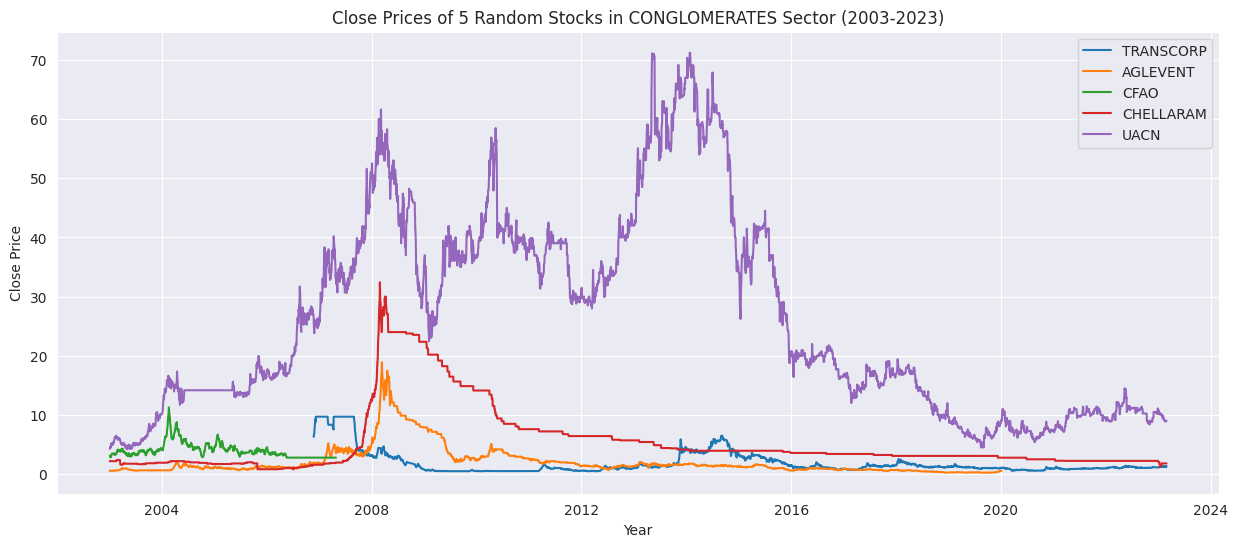

In [110]:
conglomerates_random_stocks = random.sample(list(conglomerates_stocks_sectordata['SYMBOL'].unique()), 5)
plt.figure(figsize = (15, 6))

for conglomerates_stock_symbol in conglomerates_random_stocks:
    conglomerates_stockdata_subset = conglomerates_stocks_sectordata[conglomerates_stocks_sectordata['SYMBOL'] == conglomerates_stock_symbol]
    plt.plot(conglomerates_stockdata_subset.index, conglomerates_stockdata_subset['CLOSEPRICE'], label = conglomerates_stock_symbol)

plt.xlabel('Year')
plt.ylabel('Close Price')
plt.title(f'Close Prices of 5 Random Stocks in {conglomerates_target_sector} Sector (2003-2023)')
plt.legend()
plt.grid(True)
plt.show()

step3: high value stock to sector filtering and visualization

In [111]:
conglomerates_highprice_stocks = conglomerates_stocks_sectordata.groupby('SYMBOL')['CLOSEPRICE'].max().sort_values(ascending = False)
conglomerates_highprice_stocks[0:10]

SYMBOL
UACN         71.20
CHELLARAM    32.41
JOHNHOLT     23.95
SCOA         20.80
AGLEVENT     18.90
CFAO         11.27
TRANSCORP     9.71
CUSTODIAN     8.45
Name: CLOSEPRICE, dtype: float64

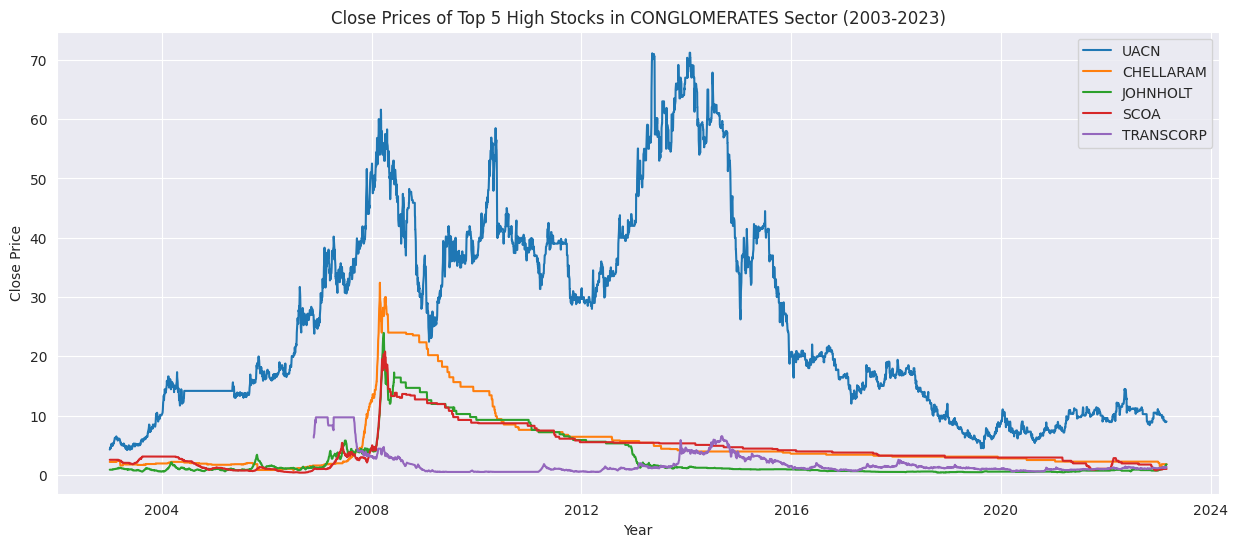

In [112]:
conglomerates_exclude1 = 'AGLEVENT'
conglomerates_exclude2 = 'CFAO'
conglomerates_top5_highstocks = conglomerates_highprice_stocks[~conglomerates_highprice_stocks.index.isin([conglomerates_exclude1, conglomerates_exclude2])].head(5)
# conglomerates_top5_highstocks = conglomerates_highprice_stocks.head(5)

plt.figure(figsize = (15, 6))

for conglomerates_highstock_symbol in conglomerates_top5_highstocks.index:
    conglomerates_highstockdata_subset = conglomerates_stocks_sectordata[conglomerates_stocks_sectordata['SYMBOL'] == conglomerates_highstock_symbol]
    plt.plot(conglomerates_highstockdata_subset.index, conglomerates_highstockdata_subset['CLOSEPRICE'], label = conglomerates_highstock_symbol)

plt.xlabel('Year')
plt.ylabel('Close Price')
plt.title(f'Close Prices of Top 5 High Stocks in {conglomerates_target_sector} Sector (2003-2023)')
plt.legend()
plt.grid(True)
plt.show()

### sector8 - natural resources

step1: extract stock data

In [113]:
natural_target_sector = 'NATURAL RESOURCES'
nr_stocks_sectordata = tsdata_copy[tsdata_copy['SECTOR'] == natural_target_sector]
# cgstocks_sector = tsdata_copy[tsdata_copy['SECTOR'] == target_sector]['SYMBOL'] to get only the stocks

print(nr_stocks_sectordata.SYMBOL.nunique())
print(nr_stocks_sectordata.SYMBOL.unique())

9
['ALEX' 'ALUMACO' 'HALLMARK' 'IMG' 'KRABO' 'THOMASWY' 'WAAP' 'WTN'
 'MULTIVERSE']


In [114]:
nr_stocks_sectordata

SYMBOL  CLOSEPRICE  Volume      Value  NoOfTransaction  \
DATE                                                                   
2003-01-02      ALEX        2.79     0.0   42000.00              7.0   
2003-01-03      ALEX        2.79     0.0    1660.00              1.0   
2003-01-06      ALEX        2.79     0.0  346284.45              8.0   
2003-01-07      ALEX        2.79     0.0     500.00              7.0   
2003-01-08      ALEX        2.79     0.0    1080.00             15.0   
...              ...         ...     ...        ...              ...   
2023-02-22  THOMASWY        1.30  7692.0    9749.60              2.0   
2023-02-23  THOMASWY        1.30  4105.0    5053.83              3.0   
2023-02-24  THOMASWY        1.30  7988.0    9745.36              3.0   
2023-02-27  THOMASWY        1.30     0.0       0.00              0.0   
2023-02-28  THOMASWY        1.30    95.0     123.50              1.0   

            OpenPrice   EPS  PERatio             SECTOR  
DATE                                                     
2003-01-02        0.0  0.03     93.0  NATURAL RESOURCES  
2003-01-03        0.0  0.03     93.0  NATURAL RESOURCES  
2003-01-06        0.0  0.03     93.0  NATURAL RESOURCES  
2003-01-07        0.0  0.03     93.0  NATURAL RESOURCES  
2003-01-08        0.0  0.03     93.0  NATURAL RESOURCES  
...               ...   ...      ...                ...  
2023-02-22        1.3  0.00      0.0  NATURAL RESOURCES  
2023-02-23        1.3  0.00      0.0  NATURAL RESOURCES  
2023-02-24        1.3  0.00      0.0  NATURAL RESOURCES  
2023-02-27        1.3  0.00      0.0  NATURAL RESOURCES  
2023-02-28        1.3  0.00      0.0  NATURAL RESOURCES  

[30945 rows x 9 columns]

step2: visualization plot of stock to sector

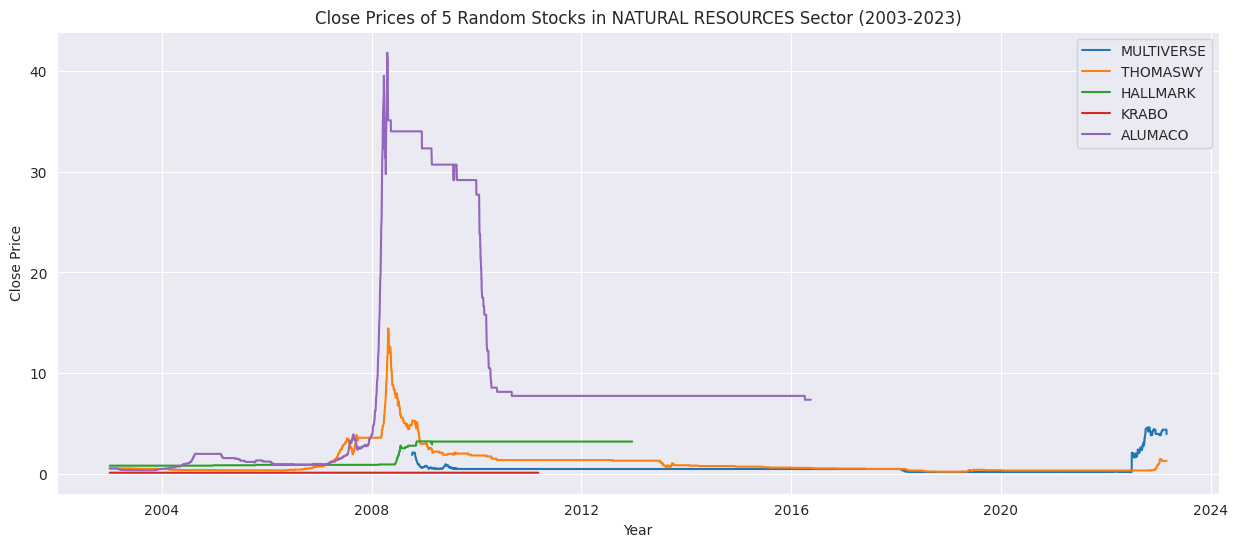

In [115]:
nr_random_stocks = random.sample(list(nr_stocks_sectordata['SYMBOL'].unique()), 5)
plt.figure(figsize = (15, 6))

for nr_stock_symbol in nr_random_stocks:
    nr_stockdata_subset = nr_stocks_sectordata[nr_stocks_sectordata['SYMBOL'] == nr_stock_symbol]
    plt.plot(nr_stockdata_subset.index, nr_stockdata_subset['CLOSEPRICE'], label = nr_stock_symbol)

plt.xlabel('Year')
plt.ylabel('Close Price')
plt.title(f'Close Prices of 5 Random Stocks in {natural_target_sector} Sector (2003-2023)')
plt.legend()
plt.grid(True)
plt.show()

step3: high value stock to sector filtering and visualization

In [116]:
nr_highprice_stocks = nr_stocks_sectordata.groupby('SYMBOL')['CLOSEPRICE'].max().sort_values(ascending = False)
nr_highprice_stocks[0:10]

SYMBOL
ALUMACO       41.79
IMG           31.16
ALEX          15.20
THOMASWY      14.46
MULTIVERSE     4.62
HALLMARK       3.24
WTN            2.92
WAAP           0.50
KRABO          0.13
Name: CLOSEPRICE, dtype: float64

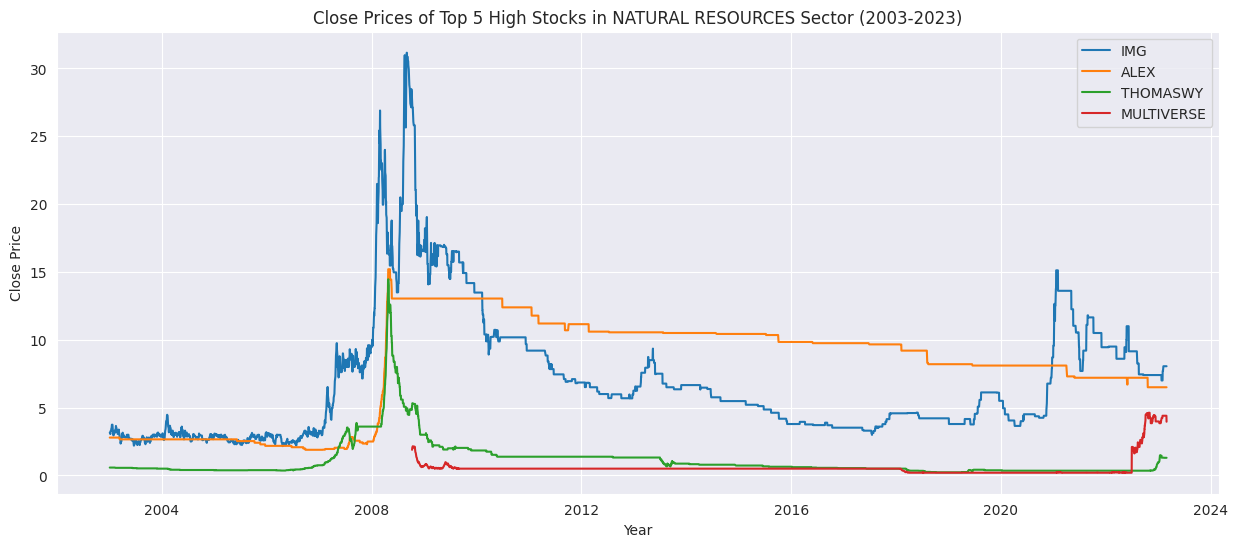

In [117]:
nr_exclude1 = 'ALUMACO'
nr_exclude2 = 'HALLMARK'
nr_exclude3 = 'WTN'
nr_exclude4 = 'WAAP'
nr_exclude5 = 'KRABO'
nr_top5_highstocks = nr_highprice_stocks[~nr_highprice_stocks.index.isin([nr_exclude1, nr_exclude2, nr_exclude3, nr_exclude4, nr_exclude5])].head(5)
# nr_top5_highstocks = nr_highprice_stocks.head(5)

plt.figure(figsize = (15, 6))

for nr_highstock_symbol in nr_top5_highstocks.index:
    nr_highstockdata_subset = nr_stocks_sectordata[nr_stocks_sectordata['SYMBOL'] == nr_highstock_symbol]
    plt.plot(nr_highstockdata_subset.index, nr_highstockdata_subset['CLOSEPRICE'], label = nr_highstock_symbol)

plt.xlabel('Year')
plt.ylabel('Close Price')
plt.title(f'Close Prices of Top 5 High Stocks in {natural_target_sector} Sector (2003-2023)')
plt.legend()
plt.grid(True)
plt.show()

### sector9 - construction & real estate

step1: extract stock data

In [118]:
cre_target_sector = 'CONSTRUCTION/REAL ESTATE'
cre_stocks_sectordata = tsdata_copy[tsdata_copy['SECTOR'] == cre_target_sector]
# cgstocks_sector = tsdata_copy[tsdata_copy['SECTOR'] == target_sector]['SYMBOL'] to get only the stocks

print(cre_stocks_sectordata.SYMBOL.nunique())
print(cre_stocks_sectordata.SYMBOL.unique())

13
['ARBICO' 'CAPALBETO' 'COSTAIN' 'GCAPPA' 'JBERGER' 'ROADS' 'SMURFIT'
 'UPDC' 'SFSREIT' 'PNG' 'UHOMREIT' 'UPDCREIT' 'RONCHESS']


In [119]:
cre_stocks_sectordata

SYMBOL  CLOSEPRICE    Volume      Value  NoOfTransaction  \
DATE                                                                     
2003-01-02    ARBICO        1.25       0.0   42000.00              7.0   
2003-01-03    ARBICO        1.25       0.0    1660.00              1.0   
2003-01-06    ARBICO        1.25       0.0  346284.45              8.0   
2003-01-07    ARBICO        1.25       0.0     500.00              7.0   
2003-01-08    ARBICO        1.25       0.0    1080.00             15.0   
...              ...         ...       ...        ...              ...   
2023-02-22  UPDCREIT        3.10    9378.0   30175.20              6.0   
2023-02-23  UPDCREIT        3.10   34870.0  109418.40             11.0   
2023-02-24  UPDCREIT        3.10  153969.0  486955.35             11.0   
2023-02-27  UPDCREIT        3.10    2526.0    7955.60              2.0   
2023-02-28  UPDCREIT        3.35  176723.0  579722.25             16.0   

            OpenPrice       EPS   PERatio                    SECTOR  
DATE                                                                 
2003-01-02        0.0  0.000000  0.000000  CONSTRUCTION/REAL ESTATE  
2003-01-03        0.0  0.000000  0.000000  CONSTRUCTION/REAL ESTATE  
2003-01-06        0.0  0.000000  0.000000  CONSTRUCTION/REAL ESTATE  
2003-01-07        0.0  0.000000  0.000000  CONSTRUCTION/REAL ESTATE  
2003-01-08        0.0  0.000000  0.000000  CONSTRUCTION/REAL ESTATE  
...               ...       ...       ...                       ...  
2023-02-22        3.1  0.566711  5.470160  CONSTRUCTION/REAL ESTATE  
2023-02-23        3.1  0.566711  5.470160  CONSTRUCTION/REAL ESTATE  
2023-02-24        3.1  0.566711  5.470160  CONSTRUCTION/REAL ESTATE  
2023-02-27        3.1  0.566711  5.470160  CONSTRUCTION/REAL ESTATE  
2023-02-28        3.1  0.566711  5.911302  CONSTRUCTION/REAL ESTATE  

[45222 rows x 9 columns]

step2: visualization plot of stock to sector

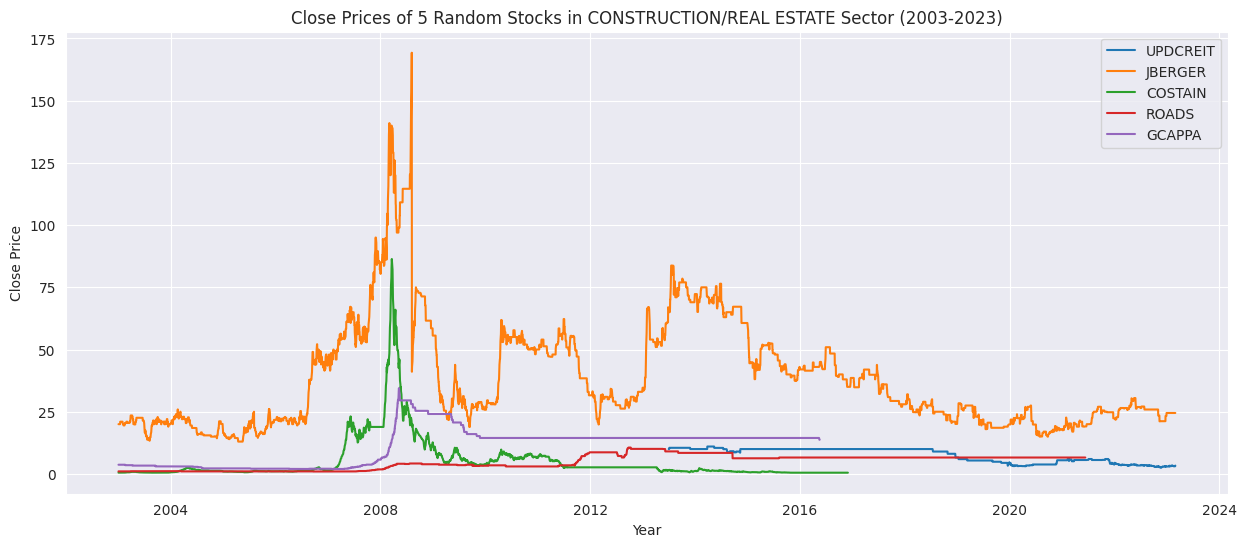

In [120]:
cre_random_stocks = random.sample(list(cre_stocks_sectordata['SYMBOL'].unique()), 5)
plt.figure(figsize = (15, 6))

for cre_stock_symbol in cre_random_stocks:
    cre_stockdata_subset = cre_stocks_sectordata[cre_stocks_sectordata['SYMBOL'] == cre_stock_symbol]
    plt.plot(cre_stockdata_subset.index, cre_stockdata_subset['CLOSEPRICE'], label = cre_stock_symbol)

plt.xlabel('Year')
plt.ylabel('Close Price')
plt.title(f'Close Prices of 5 Random Stocks in {cre_target_sector} Sector (2003-2023)')
plt.legend()
plt.grid(True)
plt.show()

step3: high value stock to sector filtering and visualization

In [121]:
cre_highprice_stocks = cre_stocks_sectordata.groupby('SYMBOL')['CLOSEPRICE'].max().sort_values(ascending = False)
cre_highprice_stocks[0:10]

SYMBOL
JBERGER      169.28
SFSREIT      150.01
CAPALBETO    147.00
COSTAIN       86.38
RONCHESS      81.00
UHOMREIT      52.50
GCAPPA        34.45
ARBICO        31.90
UPDC          30.00
UPDCREIT      11.02
Name: CLOSEPRICE, dtype: float64

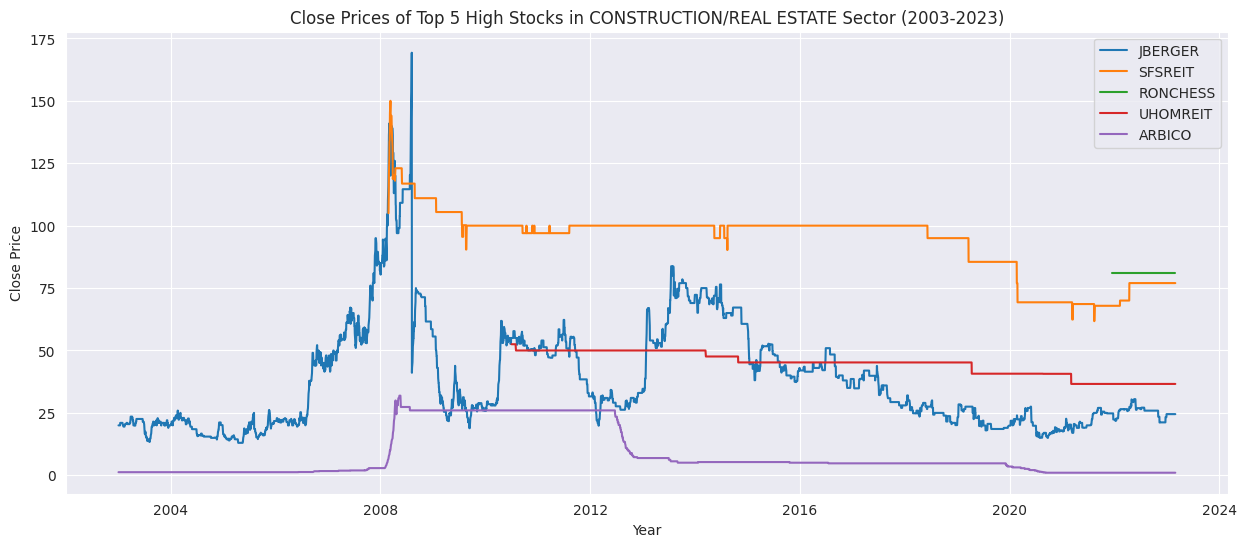

In [122]:
cre_exclude1 = 'CAPALBETO'
cre_exclude2 = 'COSTAIN'
cre_exclude3 = 'GCAPPA'
cre_top5_highstocks = cre_highprice_stocks[~cre_highprice_stocks.index.isin([cre_exclude1, cre_exclude2, cre_exclude3])].head(5)
# cre_top5_highstocks = cre_highprice_stocks.head(5)

plt.figure(figsize = (15, 6))

for cre_highstock_symbol in cre_top5_highstocks.index:
    cre_highstockdata_subset = cre_stocks_sectordata[cre_stocks_sectordata['SYMBOL'] == cre_highstock_symbol]
    plt.plot(cre_highstockdata_subset.index, cre_highstockdata_subset['CLOSEPRICE'], label = cre_highstock_symbol)

plt.xlabel('Year')
plt.ylabel('Close Price')
plt.title(f'Close Prices of Top 5 High Stocks in {cre_target_sector} Sector (2003-2023)')
plt.legend()
plt.grid(True)
plt.show()

### sector10 - ict

step1: extract stock data

In [123]:
ict_target_sector = 'ICT'
ict_stocks_sectordata = tsdata_copy[tsdata_copy['SECTOR'] == ict_target_sector]
# cgstocks_sector = tsdata_copy[tsdata_copy['SECTOR'] == target_sector]['SYMBOL'] to get only the stocks

print(ict_stocks_sectordata.SYMBOL.nunique())
print(ict_stocks_sectordata.SYMBOL.unique())

16
['ATLAS' 'NCR' 'CHAMS' 'MTI' 'OMATEK' 'STARCOMMS' 'COURTVILLE' 'ETRANZACT'
 'IHS' 'MTECH' 'IHSNGPREF' 'IHSPREF' 'CWG' 'AIRTELAFRI' 'MTNN' 'BAPLC']


In [124]:
ict_stocks_sectordata

SYMBOL  CLOSEPRICE  Volume      Value  NoOfTransaction  OpenPrice  \
DATE                                                                            
2003-01-02   ATLAS        0.13     0.0   42000.00              7.0        0.0   
2003-01-03   ATLAS        0.13     0.0    1660.00              1.0        0.0   
2003-01-06   ATLAS        0.13     0.0  346284.45              8.0        0.0   
2003-01-07   ATLAS        0.13     0.0     500.00              7.0        0.0   
2003-01-08   ATLAS        0.13     0.0    1080.00             15.0        0.0   
...            ...         ...     ...        ...              ...        ...   
2023-02-22  OMATEK        0.20     0.0       0.00              0.0        0.2   
2023-02-23  OMATEK        0.20     0.0       0.00              0.0        0.2   
2023-02-24  OMATEK        0.20     0.0       0.00              0.0        0.2   
2023-02-27  OMATEK        0.20   300.0      60.00              1.0        0.2   
2023-02-28  OMATEK        0.20     0.0       0.00              0.0        0.2   

                 EPS   PERatio SECTOR  
DATE                                   
2003-01-02  2.337381  0.000000    ICT  
2003-01-03  2.337381  0.000000    ICT  
2003-01-06  2.337381  0.000000    ICT  
2003-01-07  2.337381  0.000000    ICT  
2003-01-08  2.337381  0.000000    ICT  
...              ...       ...    ...  
2023-02-22  0.096798  2.066158    ICT  
2023-02-23  0.096798  2.066158    ICT  
2023-02-24  0.096798  2.066158    ICT  
2023-02-27  0.096798  2.066158    ICT  
2023-02-28  0.096798  2.066158    ICT  

[33902 rows x 9 columns]

step2: visualization plot of stock to sector

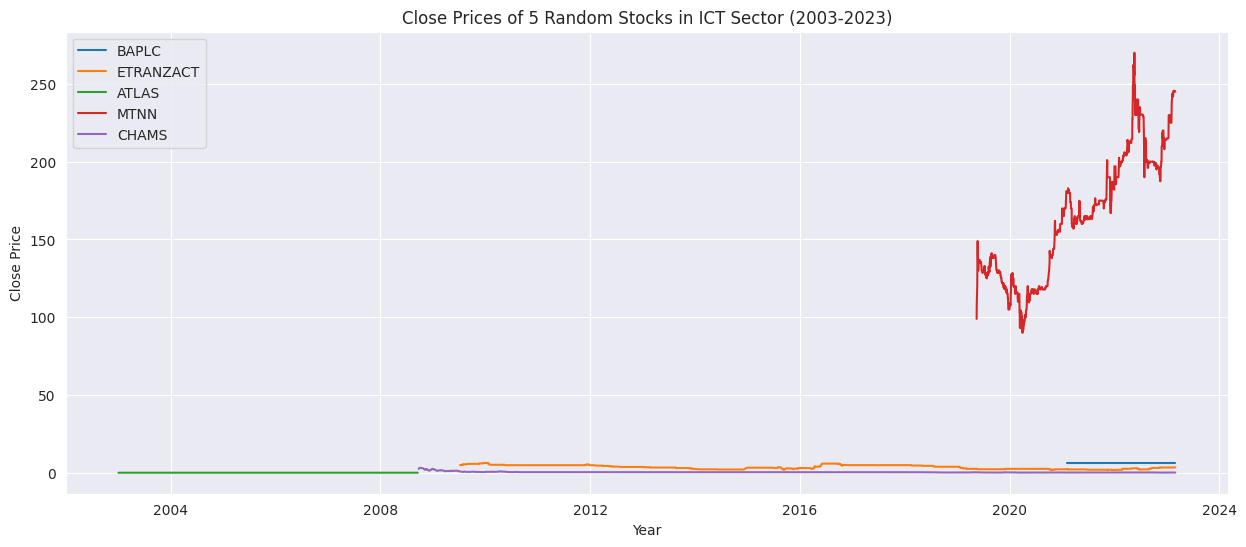

In [125]:
ict_random_stocks = random.sample(list(ict_stocks_sectordata['SYMBOL'].unique()), 5)
plt.figure(figsize = (15, 6))

for ict_stock_symbol in ict_random_stocks:
    ict_stockdata_subset = ict_stocks_sectordata[ict_stocks_sectordata['SYMBOL'] == ict_stock_symbol]
    plt.plot(ict_stockdata_subset.index, ict_stockdata_subset['CLOSEPRICE'], label = ict_stock_symbol)

plt.xlabel('Year')
plt.ylabel('Close Price')
plt.title(f'Close Prices of 5 Random Stocks in {ict_target_sector} Sector (2003-2023)')
plt.legend()
plt.grid(True)
plt.show()

step3: high value stock to sector filtering and visualization

In [126]:
ict_highprice_stocks = ict_stocks_sectordata.groupby('SYMBOL')['CLOSEPRICE'].max().sort_values(ascending = False)
ict_highprice_stocks[0:10]

SYMBOL
AIRTELAFRI    2040.00
MTNN           270.00
NCR             18.70
STARCOMMS       14.90
ETRANZACT        6.40
BAPLC            6.25
CWG              6.05
IHS              5.51
OMATEK           5.14
MTI              4.20
Name: CLOSEPRICE, dtype: float64

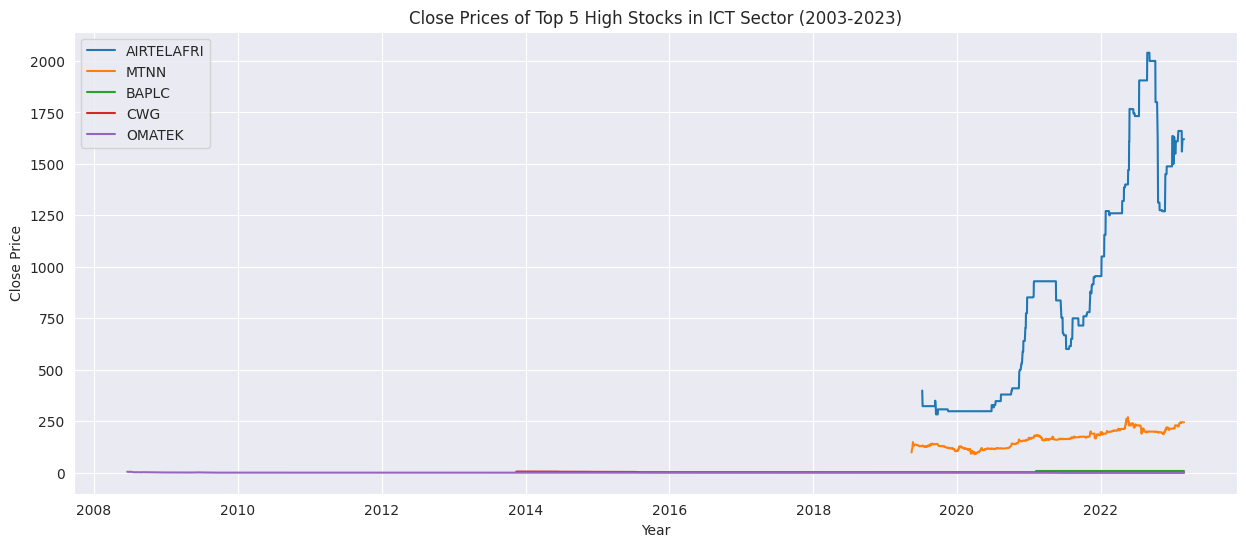

In [127]:
ict_exclude1 = 'NCR'
ict_exclude2 = 'STARCOMMS'
ict_exclude3 = 'ETRANZACT'
ict_exclude4 = 'IHS'
ict_top5_highstocks = ict_highprice_stocks[~ict_highprice_stocks.index.isin([ict_exclude1, ict_exclude2, ict_exclude3, ict_exclude4])].head(5)
# ict_top5_highstocks = ict_highprice_stocks.head(5)

plt.figure(figsize = (15, 6))

for ict_highstock_symbol in ict_top5_highstocks.index:
    ict_highstockdata_subset = ict_stocks_sectordata[ict_stocks_sectordata['SYMBOL'] == ict_highstock_symbol]
    plt.plot(ict_highstockdata_subset.index, ict_highstockdata_subset['CLOSEPRICE'], label = ict_highstock_symbol)

plt.xlabel('Year')
plt.ylabel('Close Price')
plt.title(f'Close Prices of Top 5 High Stocks in {ict_target_sector} Sector (2003-2023)')
plt.legend()
plt.grid(True)
plt.show()

### sector11 - agriculture

step1: extract stock data

In [128]:
agriculture_target_sector = 'AGRICULTURE'
agriculture_stocks_sectordata = tsdata_copy[tsdata_copy['SECTOR'] == agriculture_target_sector]
# cgstocks_sector = tsdata_copy[tsdata_copy['SECTOR'] == target_sector]['SYMBOL'] to get only the stocks

print(agriculture_stocks_sectordata.SYMBOL.nunique())
print(agriculture_stocks_sectordata.SYMBOL.unique())

7
['ELLAHLAKES' 'GROMMAC' 'LIVESTOCK' 'OKITIPUPA' 'OKOMUOIL' 'PRESCO'
 'FTNCOCOA']


In [129]:
agriculture_stocks_sectordata

SYMBOL  CLOSEPRICE    Volume        Value  NoOfTransaction  \
DATE                                                                         
2003-01-02  ELLAHLAKES         0.5       0.0     42000.00              7.0   
2003-01-03  ELLAHLAKES         0.5       0.0      1660.00              1.0   
2003-01-06  ELLAHLAKES         0.5       0.0    346284.45              8.0   
2003-01-07  ELLAHLAKES         0.5       0.0       500.00              7.0   
2003-01-08  ELLAHLAKES         0.5       0.0      1080.00             15.0   
...                ...         ...       ...          ...              ...   
2023-02-22      PRESCO       150.8  515901.0  75827199.60             36.0   
2023-02-23      PRESCO       150.8  192612.0  28627327.40             28.0   
2023-02-24      PRESCO       150.8   63074.0   9308449.20             29.0   
2023-02-27      PRESCO       150.8   25729.0   3822181.80             19.0   
2023-02-28      PRESCO       150.8  556087.0  82352051.40             51.0   

            OpenPrice       EPS    PERatio       SECTOR  
DATE                                                     
2003-01-02        0.0  0.010000  50.000000  AGRICULTURE  
2003-01-03        0.0  0.010000  50.000000  AGRICULTURE  
2003-01-06        0.0  0.010000  50.000000  AGRICULTURE  
2003-01-07        0.0  0.010000  50.000000  AGRICULTURE  
2003-01-08        0.0  0.010000  50.000000  AGRICULTURE  
...               ...       ...        ...          ...  
2023-02-22      150.8  2.651902  56.864846  AGRICULTURE  
2023-02-23      150.8  2.651902  56.864846  AGRICULTURE  
2023-02-24      150.8  2.651902  56.864846  AGRICULTURE  
2023-02-27      150.8  2.651902  56.864846  AGRICULTURE  
2023-02-28      150.8  2.651902  56.864846  AGRICULTURE  

[27033 rows x 9 columns]

step2: visualization plot of stock to sector

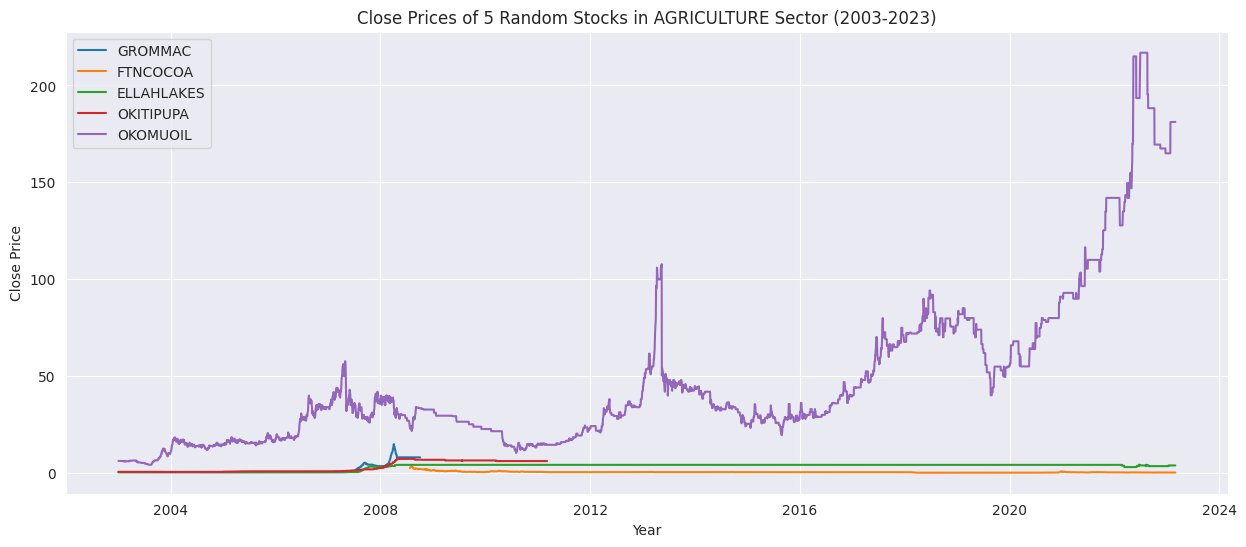

In [130]:
agriculture_random_stocks = random.sample(list(agriculture_stocks_sectordata['SYMBOL'].unique()), 5)
plt.figure(figsize = (15, 6))

for agriculture_stock_symbol in agriculture_random_stocks:
    agriculture_stockdata_subset = agriculture_stocks_sectordata[agriculture_stocks_sectordata['SYMBOL'] == agriculture_stock_symbol]
    plt.plot(agriculture_stockdata_subset.index, agriculture_stockdata_subset['CLOSEPRICE'], label = agriculture_stock_symbol)

plt.xlabel('Year')
plt.ylabel('Close Price')
plt.title(f'Close Prices of 5 Random Stocks in {agriculture_target_sector} Sector (2003-2023)')
plt.legend()
plt.grid(True)
plt.show()

step3: high value stock to sector filtering and visualization

In [131]:
agriculture_highprice_stocks = agriculture_stocks_sectordata.groupby('SYMBOL')['CLOSEPRICE'].max().sort_values(ascending = False)
agriculture_highprice_stocks[0:10]

SYMBOL
OKOMUOIL      216.90
PRESCO        200.00
GROMMAC        15.00
LIVESTOCK       9.98
OKITIPUPA       7.35
ELLAHLAKES      4.40
FTNCOCOA        3.78
Name: CLOSEPRICE, dtype: float64

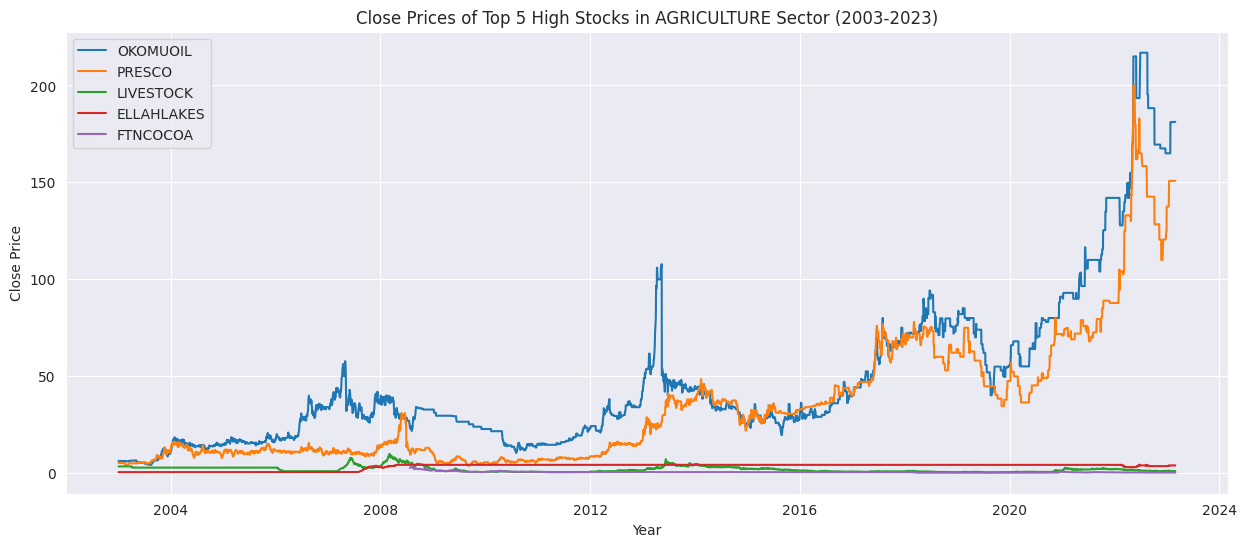

In [132]:
agriculture_exclude1 = 'GROMMAC'
agriculture_exclude2 = 'OKITIPUPA'
agriculture_top5_highstocks = agriculture_highprice_stocks[~agriculture_highprice_stocks.index.isin([agriculture_exclude1, agriculture_exclude2])].head(5)
# agriculture_top5_highstocks = agriculture_highprice_stocks.head(5)

plt.figure(figsize = (15, 6))

for agriculture_highstock_symbol in agriculture_top5_highstocks.index:
    agriculture_highstockdata_subset = agriculture_stocks_sectordata[agriculture_stocks_sectordata['SYMBOL'] == agriculture_highstock_symbol]
    plt.plot(agriculture_highstockdata_subset.index, agriculture_highstockdata_subset['CLOSEPRICE'], label = agriculture_highstock_symbol)

plt.xlabel('Year')
plt.ylabel('Close Price')
plt.title(f'Close Prices of Top 5 High Stocks in {agriculture_target_sector} Sector (2003-2023)')
plt.legend()
plt.grid(True)
plt.show()

### sector12 - utilities

step1: extract stock data

In [133]:
utilities_target_sector = 'UTILITIES'
utilities_stocks_sectordata = tsdata_copy[tsdata_copy['SECTOR'] == utilities_target_sector]
# cgstocks_sector = tsdata_copy[tsdata_copy['SECTOR'] == target_sector]['SYMBOL'] to get only the stocks

print(utilities_stocks_sectordata.SYMBOL.nunique())
print(utilities_stocks_sectordata.SYMBOL.unique())

1
['GEREGU']


In [134]:
utilities_stocks_sectordata

SYMBOL  CLOSEPRICE     Volume        Value  NoOfTransaction  \
DATE                                                                      
2022-10-04  GEREGU       100.0        0.0     380054.1              0.0   
2022-10-05  GEREGU       110.0  8500000.0  935000000.0             70.0   
2022-10-06  GEREGU       120.9  4964132.0  586759777.2            467.0   
2022-10-07  GEREGU       120.9   737546.0   85993126.2            261.0   
2022-10-11  GEREGU       120.9   644749.0   72132816.9            232.0   
...            ...         ...        ...          ...              ...   
2023-02-22  GEREGU       246.4  1429966.0  329583956.2             91.0   
2023-02-23  GEREGU       255.0   284151.0   71207460.0            104.0   
2023-02-24  GEREGU       255.0    83693.0   21147571.2             44.0   
2023-02-27  GEREGU       269.5   134252.0   35948083.5             49.0   
2023-02-28  GEREGU       275.5   142544.0   39271936.6             48.0   

            OpenPrice       EPS  PERatio     SECTOR  
DATE                                                 
2022-10-04        0.0  2.337381      0.0  UTILITIES  
2022-10-05      100.0  2.337381      0.0  UTILITIES  
2022-10-06      120.9  2.337381      0.0  UTILITIES  
2022-10-07      120.9  2.337381      0.0  UTILITIES  
2022-10-11      120.9  2.337381      0.0  UTILITIES  
...               ...       ...      ...        ...  
2023-02-22      224.0  2.337381      0.0  UTILITIES  
2023-02-23      246.4  2.337381      0.0  UTILITIES  
2023-02-24      255.0  2.337381      0.0  UTILITIES  
2023-02-27      255.0  2.337381      0.0  UTILITIES  
2023-02-28      261.5  2.337381      0.0  UTILITIES  

[102 rows x 9 columns]

step2: visulization plot of stock to sector

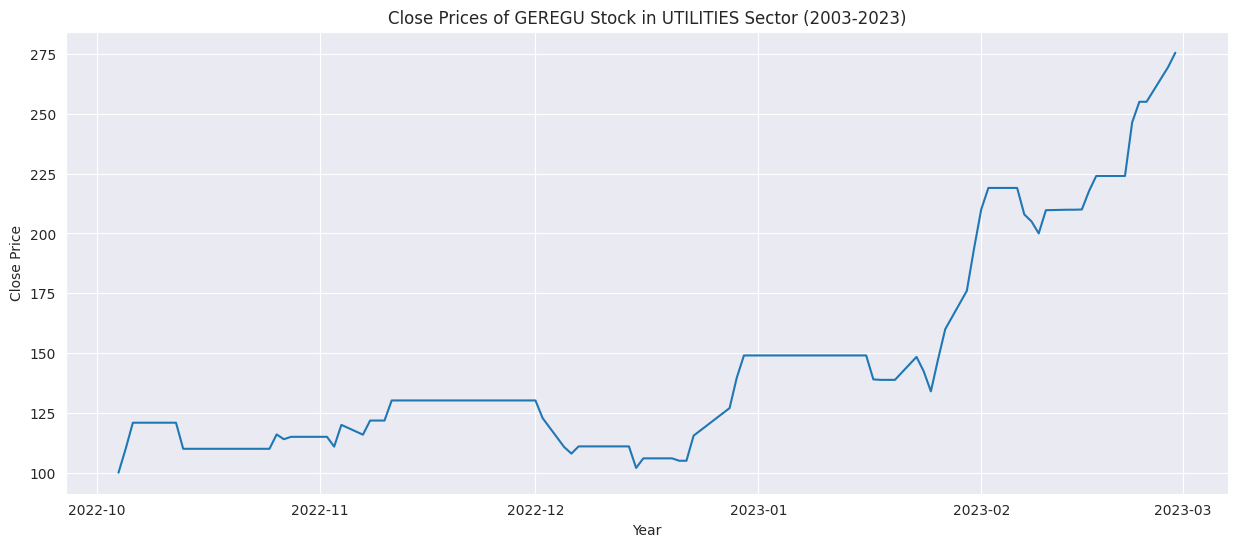

In [135]:
plt.figure(figsize = (15, 6))

only_stock = 'GEREGU'
plt.plot(utilities_stocks_sectordata.index, utilities_stocks_sectordata['CLOSEPRICE'])

plt.xlabel('Year')
plt.ylabel('Close Price')
plt.title(f'Close Prices of {only_stock} Stock in {utilities_target_sector} Sector (2003-2023)')
plt.grid(True)
plt.show()

## **** highs and lows stock recorded visualization
WARNING: monthly visualization not completed because of resampling

### yearly
visualize stocks based on per year, i.e single year
(5 - 10 years in-view)

#### highest

In [136]:
specific_year = 2010
# by specific year filter
specific_year_data = tsdata_copy[tsdata_copy.index.year == specific_year]

# feature for visualization - closeprice, filter max closeprices
high_closeprice_perstock = specific_year_data.groupby('SYMBOL')['CLOSEPRICE'].max()

# top 5 high stocks
specific_year_top5_stocks = high_closeprice_perstock.sort_values(ascending = False).head(5)

specific_year_top5_stocks

SYMBOL
NESF        552.20
NESTLE      401.00
TOTAL       254.10
GUINNESS    190.56
MOBIL       182.99
Name: CLOSEPRICE, dtype: float64

plot

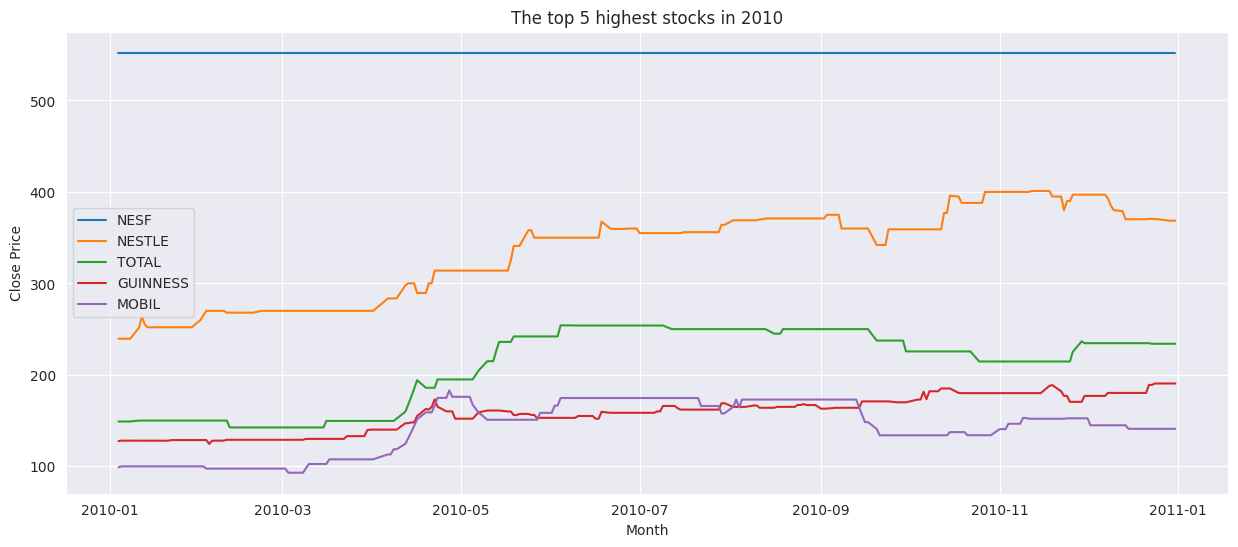

In [137]:
plt.figure(figsize = (15, 6))

for high_stock_symbol in specific_year_top5_stocks.index:
    high_subset_stockdata = specific_year_data[specific_year_data['SYMBOL'] == high_stock_symbol]
    plt.plot(high_subset_stockdata.index, high_subset_stockdata['CLOSEPRICE'], label = high_stock_symbol)

plt.xlabel('Month')
plt.ylabel('Close Price')
plt.title(f'The top 5 highest stocks in {specific_year}')
plt.legend()
plt.grid(True)
plt.show()

Check for each specific highest stock, see if they are still relevant

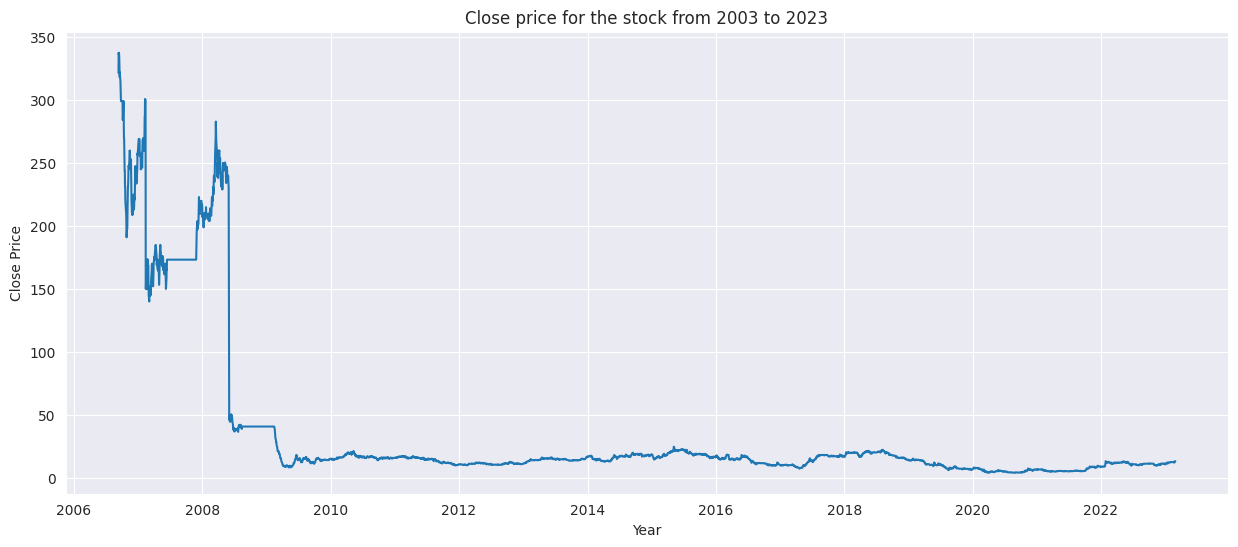

In [138]:
# the stock you to look into
actual_stock = 'ETI' # stock by symbol

# filter data based on the specific stock
stock_filter = tsdata_copy[tsdata_copy['SYMBOL'] == actual_stock]

# dataframe to show the specified stock
actual_stock_data = stock_filter[['CLOSEPRICE', 'Volume', 'Value', 'NoOfTransaction', 'OpenPrice', 'EPS', 'PERatio', 'SECTOR']].copy()

# plotting the stock
plt.rcParams['figure.figsize'] = (15, 6)
plt.plot(actual_stock_data.index, actual_stock_data['CLOSEPRICE'])
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.title('Close price for the stock from 2003 to 2023')

plt.grid(True)
plt.show()

HIGH INSIGHT ANALYSIS:
From the top 5 highest stock in the following years are as follows;
* 2003 & 2004
    * unfortunately "NIDBFUND" and "MOBIL" which recorded one of the highest stock had been delisted
    * 'NESF', 'TOTAL' and 'MRS' recorded one of the highest and **relevant valuable** stocks till date

* 2005
    * 'NESTLE' is one of the highest stocks and still a **relevant valuable** stock till date

* 2006
    * 'ETI' is one of the highest stocks and still a **relevant** stock till date

* 2007
    * 'ARDOVA' is one of the highest stocks and still a **relevant valuable** stock till date

* 2010
    * 'GUINESS' is one of the highest stocks and still a **relevant** stock till date

* 2011
    * 'NB' is one of the highest stocks and still a **relevant valuable** stock till date

* 2013
    * 'DANGCEM' is one of the highest stocks and still a **relevant** stock till date

* 2014
    * 'SEPLAT' is one of the highest stocks and still a **relevant valuable** stock till date

* 2019
    * 'AIRTELAFRI' is one of the highest stocks and still a **relevant valuable** stock till date

we shall observe the year in which they had their highest records, and review each months data

#### lowest

In [139]:
specific_year = 2023
# by specific year filter
specific_year_data = tsdata_copy[tsdata_copy.index.year == specific_year]

# feature for visualization - closeprice, filter mininum closeprices
low_closeprice_perstock = specific_year_data.groupby('SYMBOL')['CLOSEPRICE'].min()

# top 5 low stocks
specific_year_low5_stocks = low_closeprice_perstock.sort_values(ascending = False).tail(5)

specific_year_low5_stocks

SYMBOL
STDINSURE    0.2
RAKUNITY     0.0
JULI         0.0
CAPOIL       0.0
SMURFIT      0.0
Name: CLOSEPRICE, dtype: float64

plot

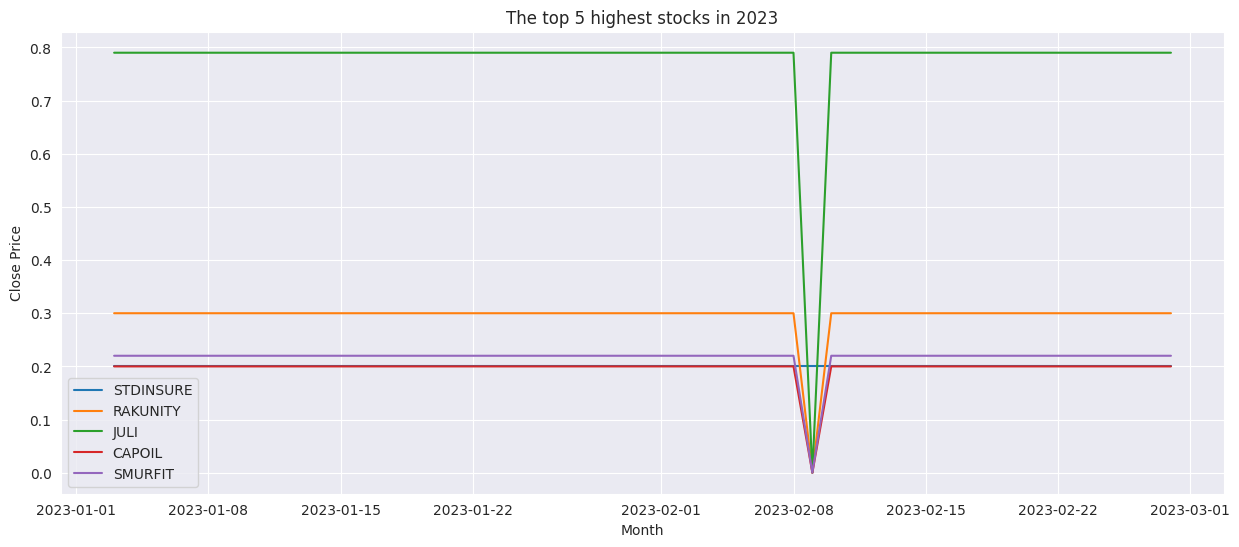

In [140]:
plt.figure(figsize = (15, 6))

for low_stock_symbol in specific_year_low5_stocks.index:
    low_subset_stockdata = specific_year_data[specific_year_data['SYMBOL'] == low_stock_symbol]
    plt.plot(low_subset_stockdata.index, low_subset_stockdata['CLOSEPRICE'], label = low_stock_symbol)

plt.xlabel('Month')
plt.ylabel('Close Price')
plt.title(f'The top 5 highest stocks in {specific_year}')
plt.legend()
plt.grid(True)
plt.show()

Check for each specific lowest stock, see if they are still relevant

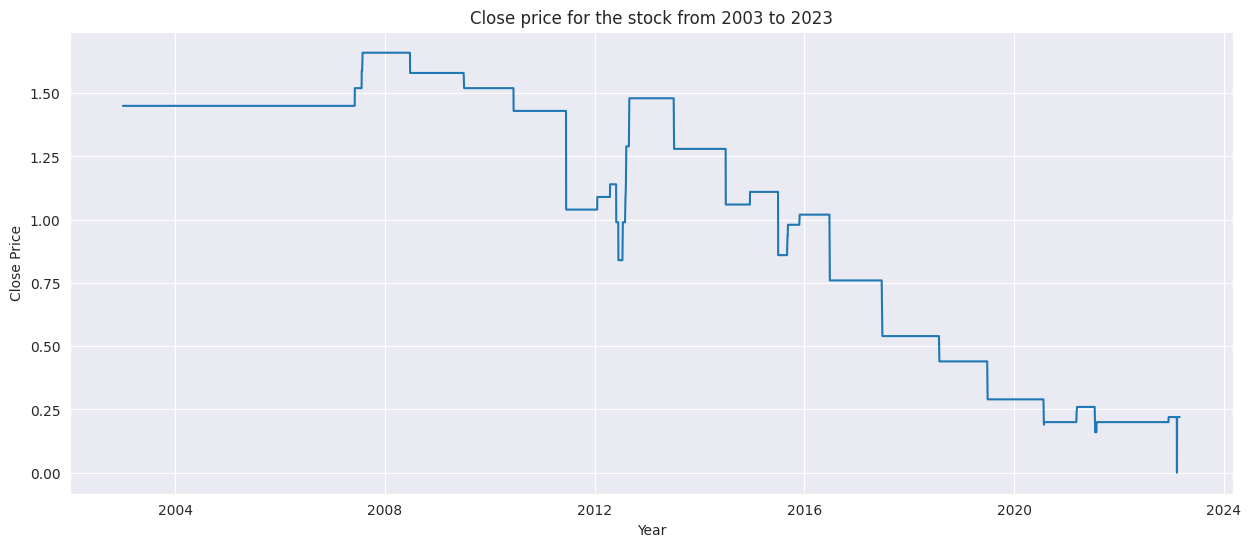

In [141]:
# the stock you to look into
actual_stock = 'SMURFIT' # stock by symbol

# filter data based on the specific stock
stock_filter = tsdata_copy[tsdata_copy['SYMBOL'] == actual_stock]

# dataframe to show the specified stock
actual_stock_data = stock_filter[['CLOSEPRICE', 'Volume', 'Value', 'NoOfTransaction', 'OpenPrice', 'EPS', 'PERatio', 'SECTOR']].copy()

# plotting the stock
plt.rcParams['figure.figsize'] = (15, 6)
plt.plot(actual_stock_data.index, actual_stock_data['CLOSEPRICE'])
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.title('Close price for the stock from 2003 to 2023')

# years = [2003, 2007, 2009, 2011, 2013, 2015, 2017, 2019, 2021, 2023]
# plt.yticks(years) # set y-axis ticks to display specific years
# plt.gca().xaxis.set_major_locator(mdates.YearLocator()) # format the date on x-axis


plt.grid(True)
plt.show()

LOW INSIGHT ANALYSIS: from the top 5 lowest stocks in the years below;
* The lowest stock in 2003 to 2006 are not relevant till till date, most likely they had been unlisted, they are **NIGSEWING**, **STOKVIS**, **ATLAS**, **KRABO**, **ONWUTEK**

* 2008
    * **ABOSELAB** recording one of the lowest stock is no more relevant

* 2009
    * **ANINO** also is no longer relevant

* 2013
    * **LAWUNION** no longer relevant

* 2014
    * **MWICABLE** no longer relevant

* 2015
    * **NSLTECH** are sill relevant

* 2016
    * **MULTITREX** is stil relevant

* 2017
    * **LASACO** is still relevant

* 2018
    * **SOVRENINGS**, **MULTIVERSE**, **REGALINS** Still relevant

* 2019
    * **DUNLOP**, **SUNUASSRE**, **TANTALIZER** is still relevant

* 2020 
    * **RTBRISCOE** is sill relevant

* 2021
    * **CAPOIL**, **DEAPCAT**, **MEYER** are still relevant

* 2023
    * **STDINSURE**, **SMURFIT**, **RAKUNITY**, **JULI** are still relevant


### monthly
visualize stocks based on per month, i.e January to December of a selected year

#### high stocks
we will be looking into the following stocks;
* 03-04: NESF, TOTAL, MRS
* 05: NESTLE
* 06: ETI
* 07: ARDOVA
* 10: GUINESS
* 11: NB
* 13: DANGCEM
* 14: SEPLAT
* 19: AIRTELAFRI

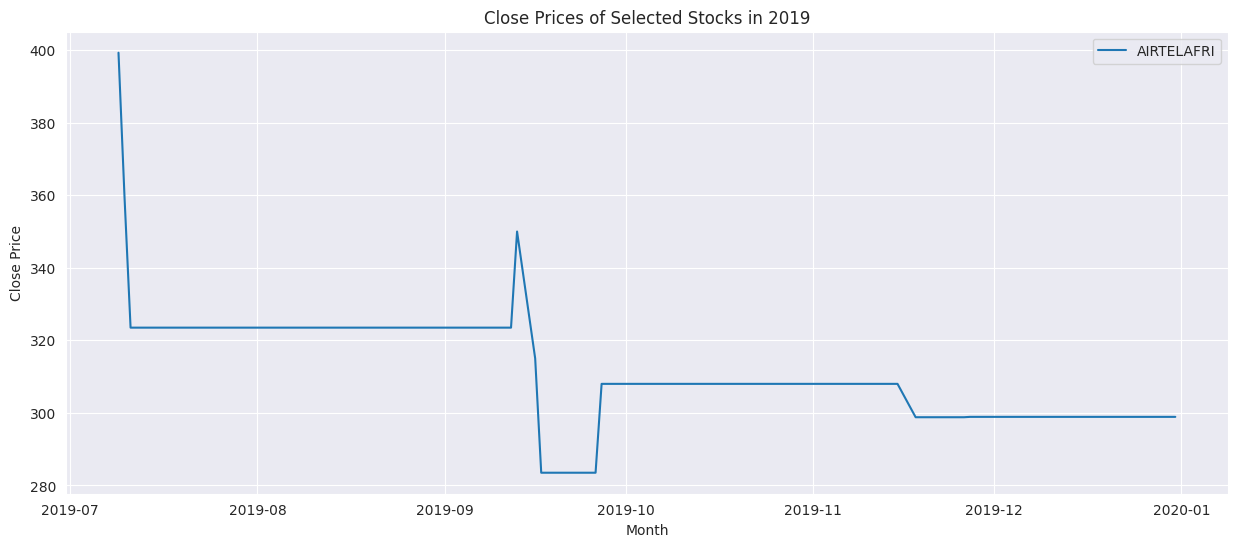

In [142]:
# year and stocks of interest
interested_year = 2019
interested_stock = ['AIRTELAFRI'] 

# Filter data for year and stock
tsdata_copy_year_stock = tsdata_copy[(tsdata_copy.index.year == interested_year) & (tsdata_copy['SYMBOL'].isin(interested_stock))]

plt.figure(figsize=(15, 6))

for istock_symbol in interested_stock:
    tsdata_copy_istock_subset = tsdata_copy_year_stock[tsdata_copy_year_stock['SYMBOL'] == istock_symbol]
    plt.plot(tsdata_copy_istock_subset.index, tsdata_copy_istock_subset['CLOSEPRICE'], label=istock_symbol)

plt.xlabel('Month')
plt.ylabel('Close Price')
plt.title(f'Close Prices of Selected Stocks in {interested_year}')
plt.legend()
plt.grid(True)
plt.show()


## ***** time series decomposition and plots
this plot identify the undelying components of the data (trends, seasonality, residual)

### resampling
by daily frequency using `interpolate()` fucntion. 
* due to fact that the data is a time series data recorded in a form of a rolling day basis, there appear to be an imbalance in the data. In order to resolve this we have to resamle it with a linear interpolation process

#### step1: remove all non-numerical columns

In [143]:
non_numerical_drop = 'SECTOR'
tsdata_numerical = tsdata_copy.drop(columns=[non_numerical_drop])

In [144]:
tsdata_numerical

SYMBOL  CLOSEPRICE      Volume         Value  NoOfTransaction  \
DATE                                                                            
2003-01-03         7UP        6.00     29300.0  1.753140e+05             11.0   
2003-01-06         7UP        5.80     58010.0  3.378608e+05              7.0   
2003-01-07         7UP        6.00     34550.0  2.070690e+05             12.0   
2003-01-08         7UP        5.97     16013.0  9.562535e+04             12.0   
2003-01-09         7UP        5.87     29812.0  1.764836e+05             13.0   
...                ...         ...         ...           ...              ...   
2023-02-22  ZENITHBANK       25.20  13000968.0  3.261339e+08            212.0   
2023-02-23  ZENITHBANK       25.35  11525976.0  2.921314e+08            199.0   
2023-02-24  ZENITHBANK       25.75   8129969.0  2.066553e+08            167.0   
2023-02-27  ZENITHBANK       25.95   7953025.0  2.055500e+08            193.0   
2023-02-28  ZENITHBANK       26.50  34247198.0  9.075359e+08            350.0   

            OpenPrice        EPS   PERatio  
DATE                                        
2003-01-03       0.00   3.510000  1.709402  
2003-01-06       0.00   3.510000  1.652422  
2003-01-07       0.00   3.510000  1.709402  
2003-01-08       0.00   3.510000  1.700855  
2003-01-09       0.00   3.510000  1.672365  
...               ...        ...       ...  
2023-02-22      25.00  13.303581  1.894227  
2023-02-23      25.20  13.303581  1.905502  
2023-02-24      25.35  13.303581  1.935569  
2023-02-27      25.75  13.303581  1.950603  
2023-02-28      25.95  13.303581  1.991945  

[952405 rows x 8 columns]

#### step2: modify the data
The main reason is to have all the different stock data records in a single column each

In [145]:
# Pivot the DataFrame
pivoted_tsdata = tsdata_numerical.pivot(columns='SYMBOL')

# Flatten the multi-level column index
pivoted_tsdata.columns = [f'{col[1]}_{col[0]}' for col in pivoted_tsdata.columns]

pivoted_tsdata

1STFINBANK_CLOSEPRICE  2NDINTERCO_CLOSEPRICE  7UP_CLOSEPRICE  \
DATE                                                                       
2003-01-02                    NaN                    NaN             NaN   
2003-01-03                    NaN                    NaN            6.00   
2003-01-06                    NaN                    NaN            5.80   
2003-01-07                    NaN                    NaN            6.00   
2003-01-08                    NaN                    NaN            5.97   
...                           ...                    ...             ...   
2023-02-22                    NaN                    NaN             NaN   
2023-02-23                    NaN                    NaN             NaN   
2023-02-24                    NaN                    NaN             NaN   
2023-02-27                    NaN                    NaN             NaN   
2023-02-28                    NaN                    NaN             NaN   

            ABATEX_CLOSEPRICE  ABBEYBDS_CLOSEPRICE  ABCTRANS_CLOSEPRICE  \
DATE                                                                      
2003-01-02               0.91                  NaN                  NaN   
2003-01-03               0.91                  NaN                  NaN   
2003-01-06               0.91                  NaN                  NaN   
2003-01-07               0.91                  NaN                  NaN   
2003-01-08               0.91                  NaN                  NaN   
...                       ...                  ...                  ...   
2023-02-22                NaN                 1.68                 0.35   
2023-02-23                NaN                 1.68                 0.35   
2023-02-24                NaN                 1.68                 0.38   
2023-02-27                NaN                 1.68                 0.38   
2023-02-28                NaN                 1.68                 0.38   

            ABOSELAB_CLOSEPRICE  ABPLAST_CLOSEPRICE  ACADEMY_CLOSEPRICE  \
DATE                                                                      
2003-01-02                 0.67                1.11                0.53   
2003-01-03                 0.67                1.11                0.53   
2003-01-06                 0.67                1.11                0.53   
2003-01-07                 0.67                1.11                0.53   
2003-01-08                 0.67                1.11                0.53   
...                         ...                 ...                 ...   
2023-02-22                  NaN                 NaN                1.28   
2023-02-23                  NaN                 NaN                1.28   
2023-02-24                  NaN                 NaN                1.28   
2023-02-27                  NaN                 NaN                1.28   
2023-02-28                  NaN                 NaN                1.28   

            ACB_CLOSEPRICE  ...  VITAFOAM_PERatio  VONO_PERatio  WAAP_PERatio  \
DATE                        ...                                                 
2003-01-02             NaN  ...          9.765625      2.605634           0.0   
2003-01-03             NaN  ...         10.156250      2.605634           0.0   
2003-01-06             NaN  ...         10.156250      2.605634           0.0   
2003-01-07             NaN  ...          9.687500      2.605634           0.0   
2003-01-08             NaN  ...          9.218750      2.605634           0.0   
...                    ...  ...               ...           ...           ...   
2023-02-22             NaN  ...          7.569004           NaN           NaN   
2023-02-23             NaN  ...          7.569004           NaN           NaN   
2023-02-24             NaN  ...          7.569004           NaN           NaN   
2023-02-27             NaN  ...          7.569004           NaN           NaN   
2023-02-28             NaN  ...          7.569004           NaN           NaN   

            WAGLA

#### step3: resample and interpolate

In [146]:
duplicated = pivoted_tsdata.duplicated(keep=False)
duplicated_data = pivoted_tsdata[duplicated]
duplicated_data

Empty DataFrame
Columns: [1STFINBANK_CLOSEPRICE, 2NDINTERCO_CLOSEPRICE, 7UP_CLOSEPRICE, ABATEX_CLOSEPRICE, ABBEYBDS_CLOSEPRICE, ABCTRANS_CLOSEPRICE, ABOSELAB_CLOSEPRICE, ABPLAST_CLOSEPRICE, ACADEMY_CLOSEPRICE, ACB_CLOSEPRICE, ACBINTBANK_CLOSEPRICE, ACCESSCORP_CLOSEPRICE, ACENINS_CLOSEPRICE, ADC_CLOSEPRICE, ADSWITCH_CLOSEPRICE, AFEXBANK_CLOSEPRICE, AFPRINT_CLOSEPRICE, AFRIBANK_CLOSEPRICE, AFRIK_CLOSEPRICE, AFRINSURE_CLOSEPRICE, AFRIPRUD_CLOSEPRICE, AFROIL_CLOSEPRICE, AFROMEDIA_CLOSEPRICE, AFRPAINTS_CLOSEPRICE, AGIP_CLOSEPRICE, AGLEVENT_CLOSEPRICE, AIICO_CLOSEPRICE, AIRSERVICE_CLOSEPRICE, AIRTELAFRI_CLOSEPRICE, ALBARKAIR_CLOSEPRICE, ALEX_CLOSEPRICE, ALLIEDBANK_CLOSEPRICE, ALPHA_CLOSEPRICE, ALUMACO_CLOSEPRICE, AMICABLE_CLOSEPRICE, ANINO_CLOSEPRICE, ARBICO_CLOSEPRICE, ARDOVA_CLOSEPRICE, ASABATEXT_CLOSEPRICE, ASHAKACEM_CLOSEPRICE, ASOSAVINGS_CLOSEPRICE, ATLANTICBK_CLOSEPRICE, ATLAS_CLOSEPRICE, AUSTINLAZ_CLOSEPRICE, AVONCROWN_CLOSEPRICE, BAGCO_CLOSEPRICE, BAICO_CLOSEPRICE, BAPLC_CLOSEPRICE, BCC_CLOSEPRICE, BCN_CLOSEPRICE, BECOPETRO_CLOSEPRICE, BERGER_CLOSEPRICE, BETAGLAS_CLOSEPRICE, BEVERAGES_CLOSEPRICE, BEWAC_CLOSEPRICE, BHN_CLOSEPRICE, BIGTREAT_CLOSEPRICE, BUACEMENT_CLOSEPRICE, BUAFOODS_CLOSEPRICE, CADBURY_CLOSEPRICE, CAP_CLOSEPRICE, CAPALBETO_CLOSEPRICE, CAPHOTEL_CLOSEPRICE, CAPOIL_CLOSEPRICE, CAVERTON_CLOSEPRICE, CCNN_CLOSEPRICE, CERAMIC_CLOSEPRICE, CFAO_CLOSEPRICE, CHAMPION_CLOSEPRICE, CHAMS_CLOSEPRICE, CHARTERED_CLOSEPRICE, CHELLARAM_CLOSEPRICE, CHIPLC_CLOSEPRICE, CHRISTLIB_CLOSEPRICE, CILEASING_CLOSEPRICE, CONFDINS_CLOSEPRICE, CONOIL_CLOSEPRICE, CONTINSURE_CLOSEPRICE, COOPBANK_CLOSEPRICE, COOPDEV_CLOSEPRICE, CORNERST_CLOSEPRICE, COSTAIN_CLOSEPRICE, COURTVILLE_CLOSEPRICE, CRUSADER_CLOSEPRICE, CUSTODIAN_CLOSEPRICE, CUTIX_CLOSEPRICE, CWG_CLOSEPRICE, DAARCOMM_CLOSEPRICE, DANGCEM_CLOSEPRICE, DANGFLOUR_CLOSEPRICE, DANGSUGAR_CLOSEPRICE, DEAPCAP_CLOSEPRICE, DIAMONDBNK_CLOSEPRICE, DTIMES_CLOSEPRICE, DUNLOP_CLOSEPRICE, ECOBANK_CLOSEPRICE, EKOBANK_CLOSEPRICE, EKOCORP_CLOSEPRICE, ELLAHLAKES_CLOSEPRICE, ENAMELWA_CLOSEPRICE, ...]
Index: []

[0 rows x 2219 columns]

In [147]:
# Resample the data with daily frequency by interpolation
final_tsdata = pivoted_tsdata.resample('D').interpolate(method='linear')

In [148]:
final_tsdata

1STFINBANK_CLOSEPRICE  2NDINTERCO_CLOSEPRICE  7UP_CLOSEPRICE  \
DATE                                                                       
2003-01-02                    NaN                    NaN             NaN   
2003-01-03                    NaN                    NaN        6.000000   
2003-01-04                    NaN                    NaN        5.933333   
2003-01-05                    NaN                    NaN        5.866667   
2003-01-06                    NaN                    NaN        5.800000   
...                           ...                    ...             ...   
2023-02-24                    9.5                   13.5      101.970000   
2023-02-25                    9.5                   13.5      101.970000   
2023-02-26                    9.5                   13.5      101.970000   
2023-02-27                    9.5                   13.5      101.970000   
2023-02-28                    9.5                   13.5      101.970000   

            ABATEX_CLOSEPRICE  ABBEYBDS_CLOSEPRICE  ABCTRANS_CLOSEPRICE  \
DATE                                                                      
2003-01-02               0.91                  NaN                  NaN   
2003-01-03               0.91                  NaN                  NaN   
2003-01-04               0.91                  NaN                  NaN   
2003-01-05               0.91                  NaN                  NaN   
2003-01-06               0.91                  NaN                  NaN   
...                       ...                  ...                  ...   
2023-02-24               0.91                 1.68                 0.38   
2023-02-25               0.91                 1.68                 0.38   
2023-02-26               0.91                 1.68                 0.38   
2023-02-27               0.91                 1.68                 0.38   
2023-02-28               0.91                 1.68                 0.38   

            ABOSELAB_CLOSEPRICE  ABPLAST_CLOSEPRICE  ACADEMY_CLOSEPRICE  \
DATE                                                                      
2003-01-02                 0.67                1.11                0.53   
2003-01-03                 0.67                1.11                0.53   
2003-01-04                 0.67                1.11                0.53   
2003-01-05                 0.67                1.11                0.53   
2003-01-06                 0.67                1.11                0.53   
...                         ...                 ...                 ...   
2023-02-24                 4.92                3.98                1.28   
2023-02-25                 4.92                3.98                1.28   
2023-02-26                 4.92                3.98                1.28   
2023-02-27                 4.92                3.98                1.28   
2023-02-28                 4.92                3.98                1.28   

            ACB_CLOSEPRICE  ...  VITAFOAM_PERatio  VONO_PERatio  WAAP_PERatio  \
DATE                        ...                                                 
2003-01-02             NaN  ...          9.765625      2.605634           0.0   
2003-01-03             NaN  ...         10.156250      2.605634           0.0   
2003-01-04             NaN  ...         10.156250      2.605634           0.0   
2003-01-05             NaN  ...         10.156250      2.605634           0.0   
2003-01-06             NaN  ...         10.156250      2.605634           0.0   
...                    ...  ...               ...           ...           ...   
2023-02-24            0.56  ...          7.569004      0.000000           0.0   
2023-02-25            0.56  ...          7.569004      0.000000           0.0   
2023-02-26            0.56  ...          7.569004      0.000000           0.0   
2023-02-27            0.56  ...          7.569004      0.000000           0.0   
2023-02-28            0.56  ...          7.569004      0.000000           0.0   

            WAGLA

As a result of resampling we have some missing values, because there is no record or existence of the data during those periods.

Therefore, resolve this by filling them with zeros

In [149]:
final_tsdata.fillna(0, inplace=True)

In [150]:
final_tsdata

1STFINBANK_CLOSEPRICE  2NDINTERCO_CLOSEPRICE  7UP_CLOSEPRICE  \
DATE                                                                       
2003-01-02                    0.0                    0.0        0.000000   
2003-01-03                    0.0                    0.0        6.000000   
2003-01-04                    0.0                    0.0        5.933333   
2003-01-05                    0.0                    0.0        5.866667   
2003-01-06                    0.0                    0.0        5.800000   
...                           ...                    ...             ...   
2023-02-24                    9.5                   13.5      101.970000   
2023-02-25                    9.5                   13.5      101.970000   
2023-02-26                    9.5                   13.5      101.970000   
2023-02-27                    9.5                   13.5      101.970000   
2023-02-28                    9.5                   13.5      101.970000   

            ABATEX_CLOSEPRICE  ABBEYBDS_CLOSEPRICE  ABCTRANS_CLOSEPRICE  \
DATE                                                                      
2003-01-02               0.91                 0.00                 0.00   
2003-01-03               0.91                 0.00                 0.00   
2003-01-04               0.91                 0.00                 0.00   
2003-01-05               0.91                 0.00                 0.00   
2003-01-06               0.91                 0.00                 0.00   
...                       ...                  ...                  ...   
2023-02-24               0.91                 1.68                 0.38   
2023-02-25               0.91                 1.68                 0.38   
2023-02-26               0.91                 1.68                 0.38   
2023-02-27               0.91                 1.68                 0.38   
2023-02-28               0.91                 1.68                 0.38   

            ABOSELAB_CLOSEPRICE  ABPLAST_CLOSEPRICE  ACADEMY_CLOSEPRICE  \
DATE                                                                      
2003-01-02                 0.67                1.11                0.53   
2003-01-03                 0.67                1.11                0.53   
2003-01-04                 0.67                1.11                0.53   
2003-01-05                 0.67                1.11                0.53   
2003-01-06                 0.67                1.11                0.53   
...                         ...                 ...                 ...   
2023-02-24                 4.92                3.98                1.28   
2023-02-25                 4.92                3.98                1.28   
2023-02-26                 4.92                3.98                1.28   
2023-02-27                 4.92                3.98                1.28   
2023-02-28                 4.92                3.98                1.28   

            ACB_CLOSEPRICE  ...  VITAFOAM_PERatio  VONO_PERatio  WAAP_PERatio  \
DATE                        ...                                                 
2003-01-02            0.00  ...          9.765625      2.605634           0.0   
2003-01-03            0.00  ...         10.156250      2.605634           0.0   
2003-01-04            0.00  ...         10.156250      2.605634           0.0   
2003-01-05            0.00  ...         10.156250      2.605634           0.0   
2003-01-06            0.00  ...         10.156250      2.605634           0.0   
...                    ...  ...               ...           ...           ...   
2023-02-24            0.56  ...          7.569004      0.000000           0.0   
2023-02-25            0.56  ...          7.569004      0.000000           0.0   
2023-02-26            0.56  ...          7.569004      0.000000           0.0   
2023-02-27            0.56  ...          7.569004      0.000000           0.0   
2023-02-28            0.56  ...          7.569004      0.000000           0.0   

            WAGLA

Now henceforth, our main data for use will now be `final_tsdata`

visualization test

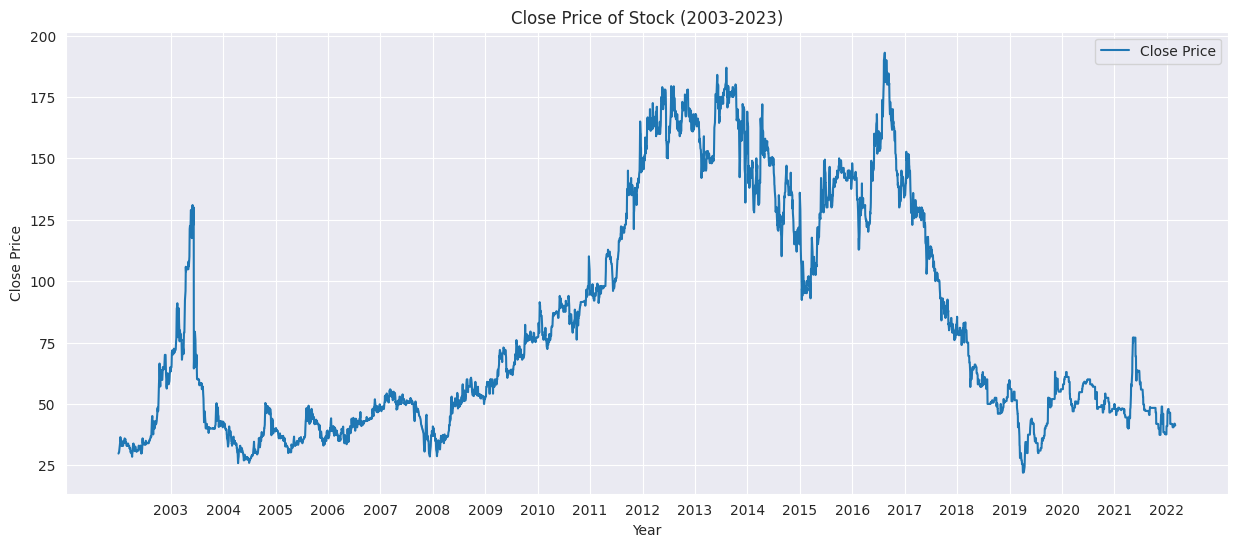

In [151]:
# Filter data from 2003 to 2023
start_date = '2003-01-02'
end_date = '2023-02-28'
filtered_data = final_tsdata[start_date:end_date]

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(filtered_data['NB_CLOSEPRICE'], label='Close Price')
plt.title('Close Price of Stock (2003-2023)')
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.xticks(pd.date_range(start=start_date, end=end_date, freq='Y'), 
           [str(year.year) for year in pd.date_range(start=start_date, end=end_date, freq='Y')])
plt.grid(True)
plt.legend()
plt.show()

# plt.figure(figsize=(15, 6))
# final_tsdata.NB_CLOSEPRICE.plot()

### decomposition

running decompostion for few stocks

#### NB

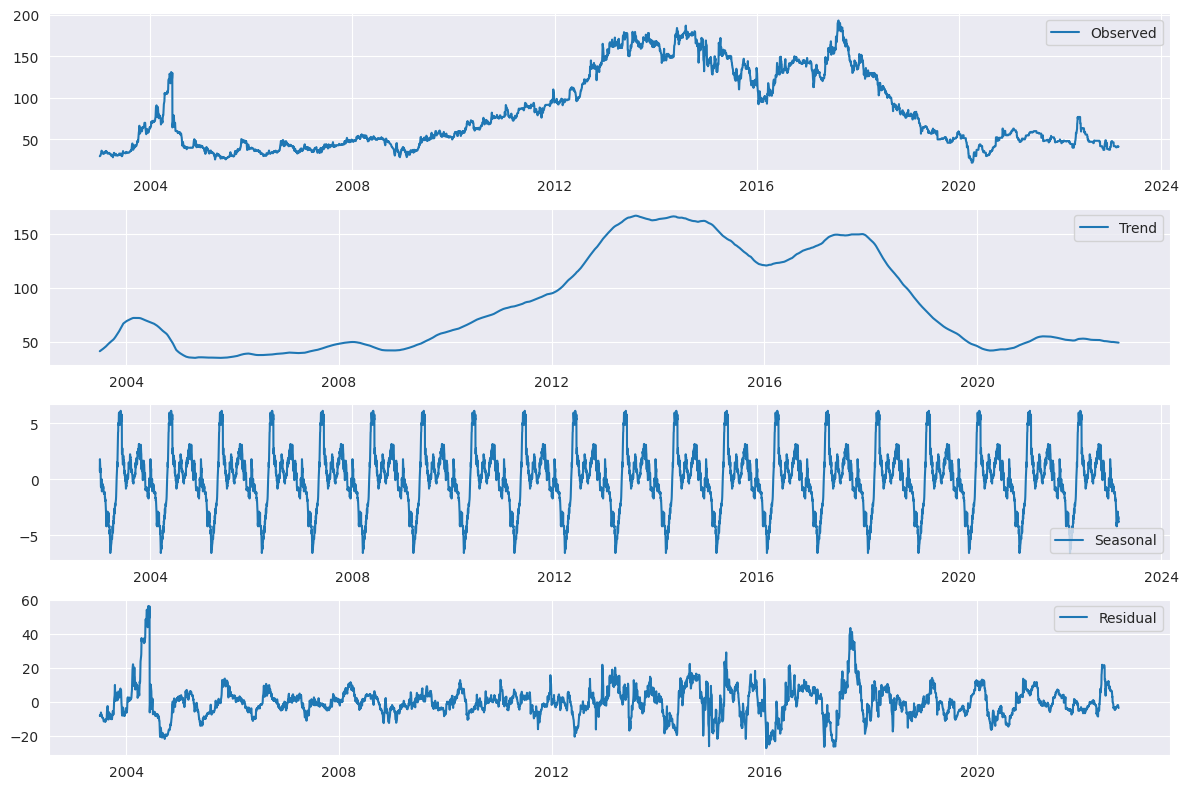

In [152]:
# actual stock closeprice in-view
stock_closeprice = final_tsdata['NB_CLOSEPRICE']

# Perform time series decomposition
result = seasonal_decompose(stock_closeprice, model='additive', period=365)

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(result.observed, label='Observed')
plt.legend()
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend()
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()
plt.subplot(414)
plt.plot(result.resid, label='Residual')
plt.legend()
plt.tight_layout()
plt.show()

#### SEPLAT

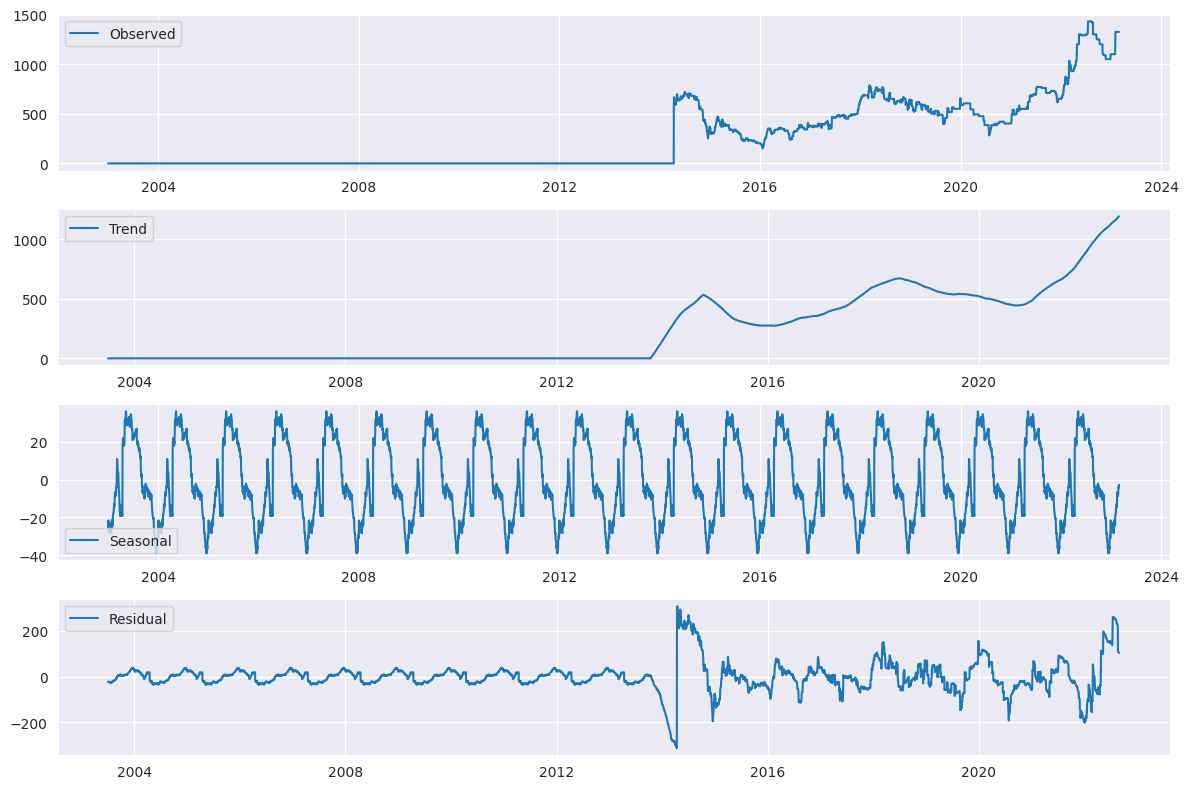

In [153]:
# actual stock closeprice in-view
stock_closeprice = final_tsdata['SEPLAT_CLOSEPRICE']

# Perform time series decomposition
result = seasonal_decompose(stock_closeprice, model='additive', period=365)

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(result.observed, label='Observed')
plt.legend()
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend()
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()
plt.subplot(414)
plt.plot(result.resid, label='Residual')
plt.legend()
plt.tight_layout()
plt.show()

#### NESTLE

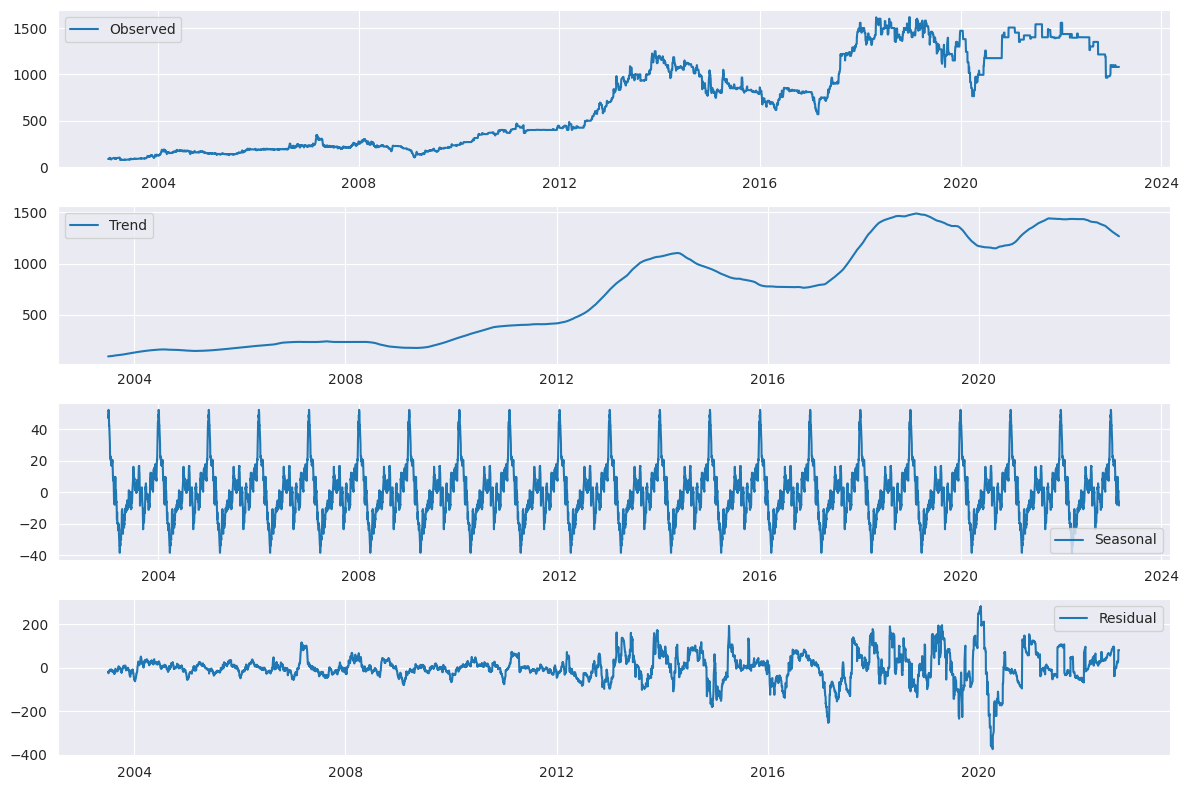

In [154]:
# actual stock closeprice in-view
stock_closeprice = final_tsdata['NESTLE_CLOSEPRICE']

# Perform time series decomposition
result = seasonal_decompose(stock_closeprice, model='additive', period=365)

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(result.observed, label='Observed')
plt.legend()
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend()
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()
plt.subplot(414)
plt.plot(result.resid, label='Residual')
plt.legend()
plt.tight_layout()
plt.show()

#### GUINESS

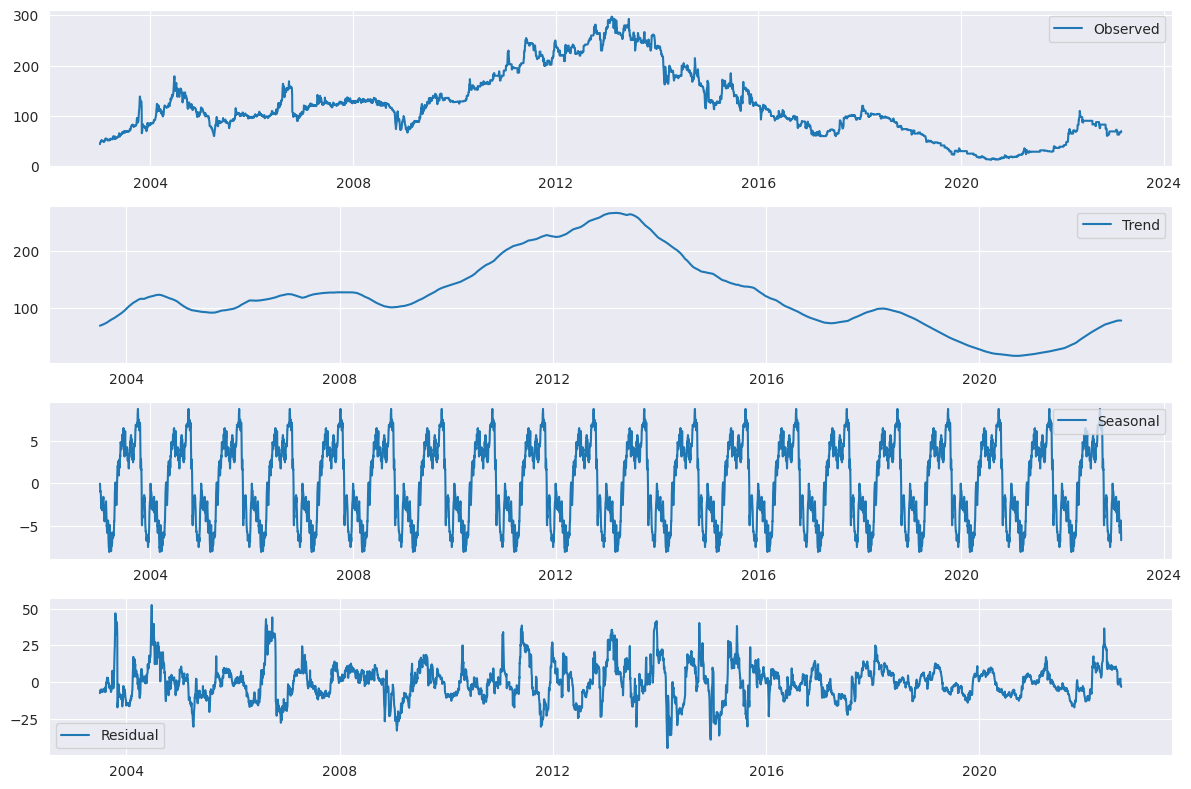

In [155]:
# actual stock closeprice in-view
stock_closeprice = final_tsdata['GUINNESS_CLOSEPRICE']

# Perform time series decomposition
result = seasonal_decompose(stock_closeprice, model='additive', period=365)

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(result.observed, label='Observed')
plt.legend()
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend()
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()
plt.subplot(414)
plt.plot(result.resid, label='Residual')
plt.legend()
plt.tight_layout()
plt.show()

#### ARDOVA

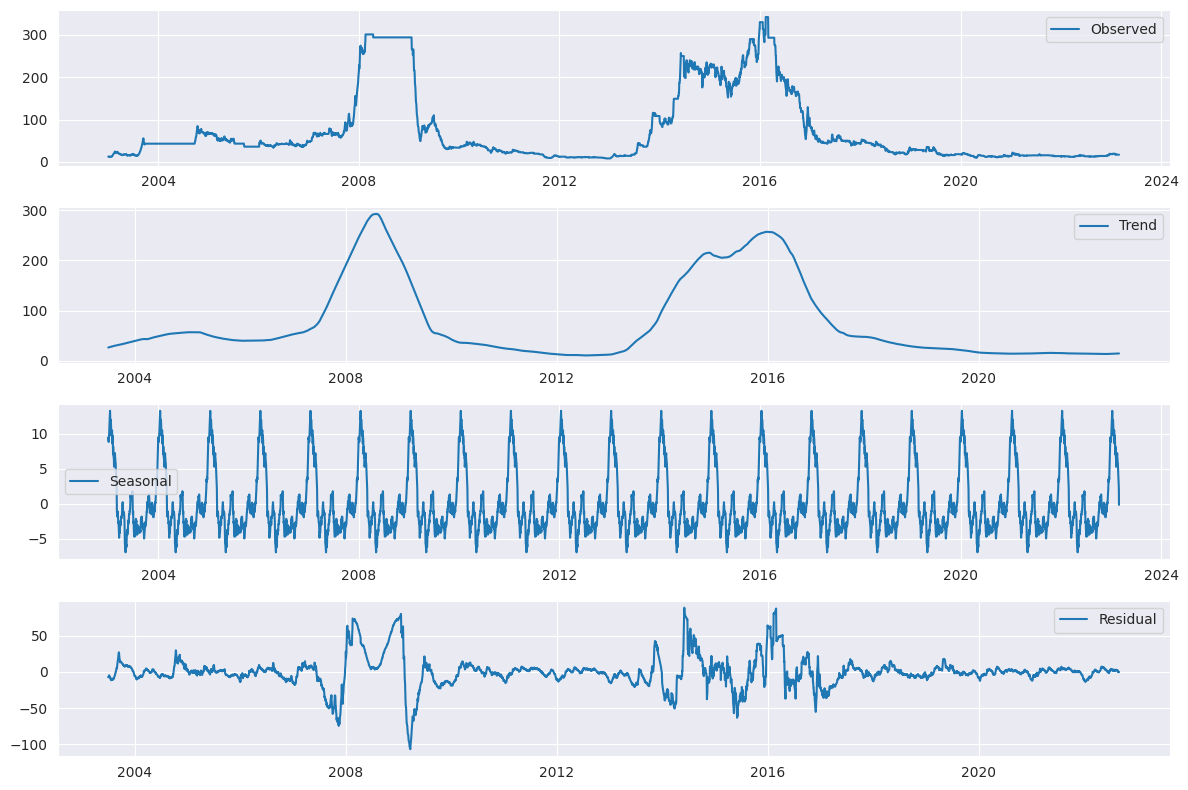

In [156]:
# actual stock closeprice in-view
stock_closeprice = final_tsdata['ARDOVA_CLOSEPRICE']

# Perform time series decomposition
result = seasonal_decompose(stock_closeprice, model='additive', period=365)

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(result.observed, label='Observed')
plt.legend()
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend()
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()
plt.subplot(414)
plt.plot(result.resid, label='Residual')
plt.legend()
plt.tight_layout()
plt.show()

# 4. TIME SERIES ANALYSIS TECHNIQUES
  * check for stationarity using Augmented Dickey-Fuller (ADF) test
  * if non-stationary, apply transformation (e.g differencing)
  * use autocorrelation function (ACF) & partial autocorrelation function (PACF) plots to determine the order of autoregressive (AR) & moving average (MA) components for modelling

## * check for stationarity in the series stock data
using augmented dickey-fuller test <br>
checking for stationarity of all relevant stocks - 157 stocks

total non-stationary stocks = 42

### 1. groupA (15 stocks)
stationary = 1 (`berger`)

In [157]:
# 1. ACADEMY
adf_aa = adfuller(final_tsdata['ACADEMY_CLOSEPRICE'])
print('ACADEMY p-value:', adf_aa[1])

# 2. ACCESSCORP
adf_ac = adfuller(final_tsdata['ACCESSCORP_CLOSEPRICE'])
print('ACCESSCORP p-value:', adf_ac[1])

# 3. AIICO
adf_ai = adfuller(final_tsdata['AIICO_CLOSEPRICE'])
print('AIICO p-value:', adf_ai[1])

# 4. ALEX
adf_ax = adfuller(final_tsdata['ALEX_CLOSEPRICE'])
print('ALEX p-value:', adf_ax[1])

# 5. ARBICO
adf_ar = adfuller(final_tsdata['ARBICO_CLOSEPRICE'])
print('ARBICO p-value:', adf_ar[1])

# 6. ARDOVA
adf_ad = adfuller(final_tsdata['ARDOVA_CLOSEPRICE'])
print('ARDOVA p-value:', adf_ad[1])

# 7. BERGER
adf_be = adfuller(final_tsdata['BERGER_CLOSEPRICE'])
print('BERGER p-value:', adf_be[1])

# 8. BETAGLAS
adf_bt = adfuller(final_tsdata['BETAGLAS_CLOSEPRICE'])
print('BETAGLAS p-value:', adf_bt[1])

# 9. CADBURY
adf_cd = adfuller(final_tsdata['CADBURY_CLOSEPRICE'])
print('CADBURY p-value:', adf_cd[1])

# 10. CAP
adf_cp = adfuller(final_tsdata['CAP_CLOSEPRICE'])
print('CAP p-value:', adf_cp[1])

# 11. CAPOIL
adf_co = adfuller(final_tsdata['CAPOIL_CLOSEPRICE'])
print('CAPOIL p-value:', adf_co[1])

# 12. CHAMPION
adf_ch = adfuller(final_tsdata['CHAMPION_CLOSEPRICE'])
print('CHAMPION p-value:', adf_ch[1])

# 13. CHELLARAM
adf_cr = adfuller(final_tsdata['CHELLARAM_CLOSEPRICE'])
print('CHELLARAM p-value:', adf_cr[1])

# 14. CILEASING
adf_ci = adfuller(final_tsdata['CILEASING_CLOSEPRICE'])
print('CILEASING p-value:', adf_ci[1])

# 15. CONOIL
adf_cl = adfuller(final_tsdata['CONOIL_CLOSEPRICE'])
print('CONOIL p-value:', adf_cl[1])

ACADEMY p-value: 0.23839356880129653
ACCESSCORP p-value: 0.13865947733834294
AIICO p-value: 0.08701778793471848
ALEX p-value: 0.4292766674906731
ARBICO p-value: 0.16963788050366896
ARDOVA p-value: 0.2940299101699321
BERGER p-value: 0.018113609600486472
BETAGLAS p-value: 0.5164595755618114
CADBURY p-value: 0.4154049345482226
CAP p-value: 0.12987295951068262
CAPOIL p-value: 0.16526911513230452
CHAMPION p-value: 0.08119168199121402
CHELLARAM p-value: 0.41747583662979904
CILEASING p-value: 0.26804218701739335
CONOIL p-value: 0.2572398426276781


OBSERVATION1: let's now deduce the result:
* **STATIONARY STOCKS:** BERGER

* **NON-STATIONARY STOCKS:** BETAGLAS, ACADEMY, ACCESSCORP, AIICO, ALEX, ARBICO, ARDOVA, , CADBURY, CAP, CAPOIL, CHAMPION, CHELLARAM, CILEASING, CONOIL

### 2. groupB (15 stocks)
stationary = 1 (`guineains`)

In [158]:
# 1. CORNERST
adf_cornerst = adfuller(final_tsdata['CORNERST_CLOSEPRICE'])
print('CORNEST p-value:', adf_cornerst[1])

# 2. CUTIX
adf_cutix = adfuller(final_tsdata['CUTIX_CLOSEPRICE'])
print('CUTIX p-value:', adf_cutix[1])

# 3. DUNLOP
adf_dunlop = adfuller(final_tsdata['DUNLOP_CLOSEPRICE'])
print('DUNLOP p-value:', adf_dunlop[1])

# 4. EKOCORP
adf_ekocorp = adfuller(final_tsdata['EKOCORP_CLOSEPRICE'])
print('EKOCORP p-value:', adf_ekocorp[1])

# 5. ELLAHLAKES
adf_ellahlakes = adfuller(final_tsdata['ELLAHLAKES_CLOSEPRICE'])
print('ELLAHLAKES p-value:', adf_ellahlakes[1])

# 6. ENAMELWA
adf_enamelwa = adfuller(final_tsdata['ENAMELWA_CLOSEPRICE'])
print('ENAMELWA p-value:', adf_enamelwa[1])

# 7. ETERNA
adf_eterna = adfuller(final_tsdata['ETERNA_CLOSEPRICE'])
print('ETERNA p-value:', adf_eterna[1])

# 8. EUNISELL
adf_eunisell = adfuller(final_tsdata['EUNISELL_CLOSEPRICE'])
print('EUNISELL p-value:', adf_eunisell[1])

# 9. FBNH
adf_fbnh = adfuller(final_tsdata['FBNH_CLOSEPRICE'])
print('FBNH p-value:', adf_fbnh[1])

# 10. FLOURMILL
adf_flourmill = adfuller(final_tsdata['FLOURMILL_CLOSEPRICE'])
print('FLOURMILL p-value:', adf_flourmill[1])

# 11. GLAXOSMITH
adf_glaxosmith = adfuller(final_tsdata['GLAXOSMITH_CLOSEPRICE'])
print('GLAXOSMITH p-value:', adf_glaxosmith[1])

# 12. GOLDBREW
adf_goldbrew = adfuller(final_tsdata['GOLDBREW_CLOSEPRICE'])
print('GOLDBREW p-value:', adf_goldbrew[1])

# 13. GTCO
adf_gtco = adfuller(final_tsdata['GTCO_CLOSEPRICE'])
print('GTCO p-value:', adf_gtco[1])

# 14. GUINEAINS
adf_guineains = adfuller(final_tsdata['GUINEAINS_CLOSEPRICE'])
print('GUINEAINS p-value:', adf_guineains[1])

# 15. GUINNESS
adf_guinness = adfuller(final_tsdata['GUINNESS_CLOSEPRICE'])
print('GUINNESS p-value:', adf_guinness[1])

CORNEST p-value: 0.21222925861979236
CUTIX p-value: 0.06285187017565873
DUNLOP p-value: 0.17907193421211043
EKOCORP p-value: 0.1317038197595592
ELLAHLAKES p-value: 0.35894278943162405
ENAMELWA p-value: 0.11118610924410183
ETERNA p-value: 0.2559591877567793
EUNISELL p-value: 0.4746070833824882
FBNH p-value: 0.4283158448000861
FLOURMILL p-value: 0.41334427010425645
GLAXOSMITH p-value: 0.5659323832495704
GOLDBREW p-value: 0.7088499582775818
GTCO p-value: 0.1054629772833966
GUINEAINS p-value: 0.02928617215606348
GUINNESS p-value: 0.4105455794338107


OBSERVATION2: let's now deduce the result:
* **STATIONARY STOCKS:** GUINEAINS

* **NON-STATIONARY STOCKS:** GLAXOSMITH, GOLDBREW, CORNERST, CUTIX, DUNLOP, EKOCORP, ELLAHLAKES, ENAMELWA, ETERNA, EUNISELL, FBNH, FLOURMILL, GTCO, GUINNESS

### 3. groupC (15 stocks)
stationary = 2 (`img, livestock`)

In [159]:
# 1. IMG
adf_img = adfuller(final_tsdata['IMG_CLOSEPRICE'])
print('IMG p-value:', adf_img[1])

# 2. INTBREW
adf_int = adfuller(final_tsdata['INTBREW_CLOSEPRICE'])
print('INTBREW p-value:', adf_int[1])

# 3. JBERGER
adf_jb = adfuller(final_tsdata['JBERGER_CLOSEPRICE'])
print('JBERGER p-value:', adf_jb[1])

# 4. JOHNHOLT
adf_johnh = adfuller(final_tsdata['JOHNHOLT_CLOSEPRICE'])
print('JOHNHOLT p-value:', adf_johnh[1])

# 5. JULI
adf_juli = adfuller(final_tsdata['JULI_CLOSEPRICE'])
print('JULI p-value:', adf_juli[1])

# 6. LASACO
adf_lasaco = adfuller(final_tsdata['LASACO_CLOSEPRICE'])
print('LASACO p-value:', adf_lasaco[1])

# 7. LEARNAFRCA
adf_learnaf = adfuller(final_tsdata['LEARNAFRCA_CLOSEPRICE'])
print('LEARNAFRCA p-value:', adf_learnaf[1])

# 8. LINKASSURE
adf_linkass = adfuller(final_tsdata['LINKASSURE_CLOSEPRICE'])
print('LINKASSURE p-value:', adf_linkass[1])

# 9. LIVESTOCK
adf_livestock = adfuller(final_tsdata['LIVESTOCK_CLOSEPRICE'])
print('LIVESTOCK p-value:', adf_livestock[1])

# 10. MAYBAKER
adf_maybaker = adfuller(final_tsdata['MAYBAKER_CLOSEPRICE'])
print('MAYBAKER p-value:', adf_maybaker[1])

# 11. MBENEFIT
adf_mbenefit = adfuller(final_tsdata['MBENEFIT_CLOSEPRICE'])
print('MBENEFIT p-value:', adf_mbenefit[1])

# 12. MEYER
adf_meyer = adfuller(final_tsdata['MEYER_CLOSEPRICE'])
print('MEYER p-value:', adf_meyer[1])

# 13. MORISON
adf_morison = adfuller(final_tsdata['MORISON_CLOSEPRICE'])
print('MORISON p-value:', adf_morison[1])

# 14. MRS
adf_mrs = adfuller(final_tsdata['MRS_CLOSEPRICE'])
print('MRS p-value:', adf_mrs[1])

# 15. NASCON
adf_nascon = adfuller(final_tsdata['NASCON_CLOSEPRICE'])
print('NASCON p-value:', adf_nascon[1])

IMG p-value: 0.014140799365195142
INTBREW p-value: 0.5378119781059817
JBERGER p-value: 0.05439218162565071
JOHNHOLT p-value: 0.39475010762596585
JULI p-value: 0.12233128593024217
LASACO p-value: 0.21438280284797367
LEARNAFRCA p-value: 0.2158805614893372
LINKASSURE p-value: 0.057704977353586595
LIVESTOCK p-value: 0.009926114515001255
MAYBAKER p-value: 0.22448315307036237
MBENEFIT p-value: 0.13925856961131766
MEYER p-value: 0.22288798324257086
MORISON p-value: 0.30783666331114024
MRS p-value: 0.25419572084252784
NASCON p-value: 0.06256930134911051


OBSERVATION3: deducing result
* **STATIONARY STOCKS:** IMG, LIVESTOCK

* **NON-STATIONARY STOCKS:** INTBREW, JBERGER, JOHNHOLT, JULI, LASACO, LEARNAFRCA, LINKASSURE, MAYBAKER, MBENEFIT, MEYER, MORISON, MRS, NASCON

### 4. groupD (15 stocks)
sationary = 1 (`neimeth`)

In [160]:
# 1. NB
adf_nb = adfuller(final_tsdata['NB_CLOSEPRICE'])
print('NB p-value:', adf_nb[1])

# 2. NCR
adf_ncr = adfuller(final_tsdata['NCR_CLOSEPRICE'])
print('NCR p-value:', adf_ncr[1])

# 3. NEIMETH
adf_neimeth = adfuller(final_tsdata['NEIMETH_CLOSEPRICE'])
print('NEIMETH p-value:', adf_neimeth[1])

# 4. NESF
adf_nesf = adfuller(final_tsdata['NESF_CLOSEPRICE'])
print('NESF p-value:', adf_nesf[1])

# 5. NESTLE
adf_nestle = adfuller(final_tsdata['NESTLE_CLOSEPRICE'])
print('NESTLE p-value:', adf_nestle[1])

# 6. NIGERINS
adf_nigerins = adfuller(final_tsdata['NIGERINS_CLOSEPRICE'])
print('NIGERINS p-value:', adf_nigerins[1])

# 7. NNFM
adf_nnfm = adfuller(final_tsdata['NNFM_CLOSEPRICE'])
print('NNFM p-value:', adf_nnfm[1])

# 8. OANDO
adf_oando = adfuller(final_tsdata['OANDO_CLOSEPRICE'])
print('OANDO p-value:', adf_oando[1])

# 9. OKOMUOIL
adf_okomuoil = adfuller(final_tsdata['OKOMUOIL_CLOSEPRICE'])
print('OKOMUOIL p-value:', adf_okomuoil[1])

# 10. PHARMDEKO
adf_pharmdeko = adfuller(final_tsdata['PHARMDEKO_CLOSEPRICE'])
print('PHARMDEKO p-value:', adf_pharmdeko[1])

# 11. PREMPAINTS
adf_prempaints = adfuller(final_tsdata['PREMPAINTS_CLOSEPRICE'])
print('PREMPAINTS p-value:', adf_prempaints[1])

# 12. PRESCO
adf_presco = adfuller(final_tsdata['PRESCO_CLOSEPRICE'])
print('PRESCO p-value:', adf_presco[1])

# 13. PRESTIGE
adf_prestige = adfuller(final_tsdata['PRESTIGE_CLOSEPRICE'])
print('PRESTIGE p-value:', adf_prestige[1])

# 14. PZ
adf_pz = adfuller(final_tsdata['PZ_CLOSEPRICE'])
print('PZ p-value:', adf_pz[1])

# 15. NEM
adf_nem = adfuller(final_tsdata['NEM_CLOSEPRICE'])
print('NEM p-value:', adf_nem[1])

NB p-value: 0.43739120817338156
NCR p-value: 0.3998895387951439
NEIMETH p-value: 0.020217724150416835
NESF p-value: 0.1336885200821138
NESTLE p-value: 0.6288662897560299
NIGERINS p-value: 0.383789987494302
NNFM p-value: 0.2856613984494584
OANDO p-value: 0.5249068630906124
OKOMUOIL p-value: 0.9781101381796061
PHARMDEKO p-value: 0.060264783588166136
PREMPAINTS p-value: 0.2512011857623887
PRESCO p-value: 0.9915948330092794
PRESTIGE p-value: 0.4422346436551685
PZ p-value: 0.3699360133114884
NEM p-value: 0.2158413683052831


OBSERVATION4: result deducing
* **STATIONARITY:** NEIMETH

* **NON-STATIONARY:** NESTLE, OANDO, OKOMUOIL, PRESCO, NB, NCR, NESF, NIGERINS, NNFM, PHARMDEKO, PREMPAINTS, PRESTIGE, PZ, NEM

### 5. groupE (15 stocks)
stationary = 2 (`thomaswy, total`)

In [161]:
# 1. RAKUNITY
adf_rakunity = adfuller(final_tsdata['RAKUNITY_CLOSEPRICE'])
print('RAKUNITY p-value:', adf_rakunity[1])

# 2. ROYALEX
adf_royalex = adfuller(final_tsdata['ROYALEX_CLOSEPRICE'])
print('ROYALEX p-value:', adf_royalex[1])

# 3. RTBRISCOE
adf_rtbriscoe = adfuller(final_tsdata['RTBRISCOE_CLOSEPRICE'])
print('RTBRISCOE p-value:', adf_rtbriscoe[1])

# 4. SCOA
adf_scoa = adfuller(final_tsdata['SCOA_CLOSEPRICE'])
print('SCOA p-value:', adf_scoa[1])

# 5. SMURFIT
adf_smurfit = adfuller(final_tsdata['SMURFIT_CLOSEPRICE'])
print('SMURFIT p-value:', adf_smurfit[1])

# 6. STDINSURE
adf_stdinsure = adfuller(final_tsdata['STDINSURE_CLOSEPRICE'])
print('STDINSURE p-value:', adf_stdinsure[1])

# 7. STERLNBANK
adf_sterlnbank = adfuller(final_tsdata['STERLNBANK_CLOSEPRICE'])
print('STERLNBANK p-value:', adf_sterlnbank[1])

# 8. SUNUASSUR
adf_sunuassur = adfuller(final_tsdata['SUNUASSUR_CLOSEPRICE'])
print('SUNUASSUR p-value:', adf_sunuassur[1])

# 9. THOMASWY
adf_thomaswy = adfuller(final_tsdata['THOMASWY_CLOSEPRICE'])
print('THOMASWY p-value:', adf_thomaswy[1])

# 10. TOTAL
adf_total = adfuller(final_tsdata['TOTAL_CLOSEPRICE'])
print('TOTAL p-value:', adf_total[1])

# 11. TRANSEXPR
adf_transexpr = adfuller(final_tsdata['TRANSEXPR_CLOSEPRICE'])
print('TRANSEXPR p-value:', adf_transexpr[1])

# 12. TRIPPLEG
adf_trippleg = adfuller(final_tsdata['TRIPPLEG_CLOSEPRICE'])
print('TRIPPLEG p-value:', adf_trippleg[1])

# 13. UACN
adf_uacn = adfuller(final_tsdata['UACN_CLOSEPRICE'])
print('UACN p-value:', adf_uacn[1])

# 14. UBA
adf_uba = adfuller(final_tsdata['UBA_CLOSEPRICE'])
print('UBA p-value:', adf_uba[1])

# 15. UBN
adf_ubn = adfuller(final_tsdata['UBN_CLOSEPRICE'])
print('UBN p-value:', adf_ubn[1])

RAKUNITY p-value: 0.48891271611947223
ROYALEX p-value: 0.3026006560564196
RTBRISCOE p-value: 0.6127532983376309
SCOA p-value: 0.2060756990936245
SMURFIT p-value: 0.9404662095047694
STDINSURE p-value: 0.2408096748986942
STERLNBANK p-value: 0.11046303430148702
SUNUASSUR p-value: 0.15365725679841497
THOMASWY p-value: 0.028850824505845505
TOTAL p-value: 0.00895101561575179
TRANSEXPR p-value: 0.3514473334968475
TRIPPLEG p-value: 0.15627560960599735
UACN p-value: 0.47207174134662405
UBA p-value: 0.4443418898618725
UBN p-value: 0.40383300990047843


OBSERVATION5: deducing result
* **STATIONARY STOCKS:** THOMASWY, TOTAL

* **NON-STATIONARY STOCKS:** RTBRISCOE, SMURFIT, RAKUNITY, ROYALEX, SCOA, STDINSURE, STERLNBANK, SUNUASSUR, TRANSEXPR, TRPPLEG, UACN, UBN

### 6. groupF (15 stocks)
stationary = 0

In [162]:
# 1. UNILEVER
adf_unilever = adfuller(final_tsdata['UNILEVER_CLOSEPRICE'])
print('UNILEVER p-value:', adf_unilever[1])

# 2. UNIONDICON
adf_uniondicon = adfuller(final_tsdata['UNIONDICON_CLOSEPRICE'])
print('UNIONDICON p-value:', adf_uniondicon[1])

# 3. UPDC
adf_updc = adfuller(final_tsdata['UPDC_CLOSEPRICE'])
print('UPDC p-value:', adf_updc[1])

# 4. UPL
adf_upl = adfuller(final_tsdata['UPL_CLOSEPRICE'])
print('UPL p-value:', adf_upl[1])

# 5. VANLEER
adf_vanleer = adfuller(final_tsdata['VANLEER_CLOSEPRICE'])
print('VANLEER p-value:', adf_vanleer[1])

# 6. VITAFOAM
adf_vitafoam = adfuller(final_tsdata['VITAFOAM_CLOSEPRICE'])
print('VITAFOAM p-value:', adf_vitafoam[1])

# 7. WAPCO
adf_wapco = adfuller(final_tsdata['WAPCO_CLOSEPRICE'])
print('WAPCO p-value:', adf_wapco[1])

# 8. WAPIC
adf_wapic = adfuller(final_tsdata['WAPIC_CLOSEPRICE'])
print('WAPIC p-value:', adf_wapic[1])

# 9. WEMABANK
adf_wemabank = adfuller(final_tsdata['WEMABANK_CLOSEPRICE'])
print('WEMABANK p-value:', adf_wemabank[1])

# 10. FCMB
adf_fcmb = adfuller(final_tsdata['FCMB_CLOSEPRICE'])
print('FCMB p-value:', adf_fcmb[1])

# 11. TOURIST
adf_tourist = adfuller(final_tsdata['TOURIST_CLOSEPRICE'])
print('TOURIST p-value:', adf_tourist[1])

# 12. ZENITHBANK
adf_zenithbank = adfuller(final_tsdata['ZENITHBANK_CLOSEPRICE'])
print('ZENITHBANK p-value:', adf_zenithbank[1])

# 13. FIDELLITYBK
adf_fidelitybk = adfuller(final_tsdata['FIDELITYBK_CLOSEPRICE'])
print('FIDELITYBK p-value:', adf_fidelitybk[1])

# 14. JAPAULGOLD
adf_japaulgold = adfuller(final_tsdata['JAPAULGOLD_CLOSEPRICE'])
print('JAPAULGOLD p-value:', adf_japaulgold[1])

# 15. STANBIC
adf_stanbic = adfuller(final_tsdata['STANBIC_CLOSEPRICE'])
print('STANBIC p-value:', adf_stanbic[1])

UNILEVER p-value: 0.36264273872453334
UNIONDICON p-value: 0.22020235795005183
UPDC p-value: 0.6425720232969648
UPL p-value: 0.058151002873031654
VANLEER p-value: 0.31730411851640855
VITAFOAM p-value: 0.9546788366132921
WAPCO p-value: 0.47438676942786695
WAPIC p-value: 0.23869870255611858
WEMABANK p-value: 0.26674242184341546
FCMB p-value: 0.31127620865814876
TOURIST p-value: 0.06516348067269757
ZENITHBANK p-value: 0.12085447581999886
FIDELITYBK p-value: 0.31482810783627957
JAPAULGOLD p-value: 0.11804938300282797
STANBIC p-value: 0.731772642405865


OBSERVATION6: let's deduce the result

* **NON-STATIONARY STOCKS:** UPDC, VITAFOAM, STANBIC, UNILEVER, UNIONDICON, UPL, VANLEER, WAPCO, WAPIC, WEMABANK, FCMB, TOURIST, ZENITHBANK, FIDELITYBK, JAPAULGOLD

### 7. groupG (15 stocks)
stationary = 4 (`eti, dangsugar, transcorp, intenegins`)

In [163]:
# 1. UNITYBNK
adf_unitybnk = adfuller(final_tsdata['UNITYBNK_CLOSEPRICE'])
print('UNITYBNK p-value:', adf_unitybnk[1])

# 2. ABCTRANS
adf_abctrans = adfuller(final_tsdata['ABCTRANS_CLOSEPRICE'])
print('ABCTRANS p-value:', adf_abctrans[1])

# 3. ETI
adf_eti = adfuller(final_tsdata['ETI_CLOSEPRICE'])
print('ETI p-value:', adf_eti[1])

# 4. NAHCO
adf_nacho = adfuller(final_tsdata['NAHCO_CLOSEPRICE'])
print('NAHCO p-value:', adf_nacho[1])

# 5. SOVRENINS
adf_sovrenins = adfuller(final_tsdata['SOVRENINS_CLOSEPRICE'])
print('SOVRENINS p-value:', adf_sovrenins[1])

# 6. TRANSCORP
adf_transcorp = adfuller(final_tsdata['TRANSCORP_CLOSEPRICE'])
print('TRANSCORP p-value:', adf_transcorp[1])

# 7. UNHOMES
adf_unhomes = adfuller(final_tsdata['UNHOMES_CLOSEPRICE'])
print('UNHOMES p-value:', adf_unhomes[1])

# 8. CUSTODIAN
adf_custodian = adfuller(final_tsdata['CUSTODIAN_CLOSEPRICE'])
print('CUSTODIAN p-value:', adf_custodian[1])

# 9. DANGSUGAR
adf_dangsugar = adfuller(final_tsdata['DANGSUGAR_CLOSEPRICE'])
print('DANGSUGAR p-value:', adf_dangsugar[1])

# 10. DEAPCAP
adf_deapcap = adfuller(final_tsdata['DEAPCAP_CLOSEPRICE'])
print('DEAPCAP p-value:', adf_deapcap[1])

# 11. IKEJAHOTEL
adf_ikejahotel = adfuller(final_tsdata['IKEJAHOTEL_CLOSEPRICE'])
print('IKEJAHOTEL p-value:', adf_ikejahotel[1])

# 12. INTENEGINS
adf_intenegins = adfuller(final_tsdata['INTENEGINS_CLOSEPRICE'])
print('INTENEGINS p-value:', adf_intenegins[1])

# 13. NSLTECH
adf_nsltech = adfuller(final_tsdata['NSLTECH_CLOSEPRICE'])
print('NSLTECH p-value:', adf_nsltech[1])

# 14. REDSTAREX
adf_redstarex = adfuller(final_tsdata['REDSTAREX_CLOSEPRICE'])
print('REDSTAREX p-value:', adf_redstarex[1])

# 15. STACO
adf_staco = adfuller(final_tsdata['STACO_CLOSEPRICE'])
print('STACO p-value:', adf_staco[1])

UNITYBNK p-value: 0.15201718999494412
ABCTRANS p-value: 0.08194057137581506
ETI p-value: 0.0026678350037583932
NAHCO p-value: 0.07330648486154281
SOVRENINS p-value: 0.19383423051144105
TRANSCORP p-value: 0.01633691816323846
UNHOMES p-value: 0.12250248281813808
CUSTODIAN p-value: 0.5102706148921677
DANGSUGAR p-value: 0.03725828882189784
DEAPCAP p-value: 0.07826537227884597
IKEJAHOTEL p-value: 0.0610766175767831
INTENEGINS p-value: 0.00321360053978996
NSLTECH p-value: 0.09696398053046512
REDSTAREX p-value: 0.05022314748974134
STACO p-value: 0.25753152534091384


by deductive observation;

* **STATIONARY STOCKS:** ETI, TRANSCORP, DANGSUGAR, INTENEGINS

* **NON-STATIONARY STOCKS:** CUSTODIAN, UNITYBNK, ABCTRANS, NAHCO, SOVRENINS, UNHOMES, DEAPCAP, IKEJAHOTEL, NSLTECH, REDSTAREX, STACO

### 8. groupH (15 stocks)
stationary = 11 (`abbeybds, asosavings, chams, chiplc, daarcomm, ftncoca, goldinsure, omatek, regalins, tantalizer, univinsure`)

In [164]:
# 1. ABBEYBDS
adf_abbeybds = adfuller(final_tsdata['ABBEYBDS_CLOSEPRICE'])
print('ABBEYBDS p-value:', adf_abbeybds[1])

# 2. ASOSAVINGS
adf_asosavings = adfuller(final_tsdata['ASOSAVINGS_CLOSEPRICE'])
print('ASOSAVINGS p-value:', adf_asosavings[1])

# 3. CAPHOTEL
adf_caphotel = adfuller(final_tsdata['CAPHOTEL_CLOSEPRICE'])
print('CAPHOTEL p-value:', adf_caphotel[1])

# 4. CHAMS
adf_chams = adfuller(final_tsdata['CHAMS_CLOSEPRICE'])
print('CHAMS p-value:', adf_chams[1])

# 5. CHIPLC
adf_chiplc = adfuller(final_tsdata['CHIPLC_CLOSEPRICE'])
print('CHIPLC p-value:', adf_chiplc[1])

# 6. DAARCOMM
adf_daarcomm = adfuller(final_tsdata['DAARCOMM_CLOSEPRICE'])
print('DAARCOMM p-value:', adf_daarcomm[1])

# 7. FIDSON
adf_fidson = adfuller(final_tsdata['FIDSON_CLOSEPRICE'])
print('FIDSON p-value:', adf_fidson[1])

# 8. FTNCOCOA
adf_ftncocoa = adfuller(final_tsdata['FTNCOCOA_CLOSEPRICE'])
print('FTNCOCOA p-value:', adf_ftncocoa[1])

# 9. GOLDINSURE
adf_goldinsure = adfuller(final_tsdata['GOLDINSURE_CLOSEPRICE'])
print('GOLDINSURE p-value:', adf_goldinsure[1])

# 10. MULTIVERSE
adf_multiverse = adfuller(final_tsdata['MULTIVERSE_CLOSEPRICE'])
print('MULTIVERSE p-value:', adf_multiverse[1])

# 11. OMATEK
adf_omatek = adfuller(final_tsdata['OMATEK_CLOSEPRICE'])
print('OMATEK p-value:', adf_omatek[1])

# 12. REGALINS
adf_regalins = adfuller(final_tsdata['REGALINS_CLOSEPRICE'])
print('REGALINS p-value:', adf_regalins[1])

# 13. SFSREIT
adf_sfsreit = adfuller(final_tsdata['SFSREIT_CLOSEPRICE'])
print('SFSREIT p-value:', adf_sfsreit[1])

# 14. TANTALIZER
adf_tantalizer = adfuller(final_tsdata['TANTALIZER_CLOSEPRICE'])
print('TANTALIZER p-value:', adf_tantalizer[1])

# 15. UNIVINSURE
adf_univinsure = adfuller(final_tsdata['UNIVINSURE_CLOSEPRICE'])
print('UNIVINSURE p-value:', adf_univinsure[1])

ABBEYBDS p-value: 0.0213222990403603
ASOSAVINGS p-value: 1.1585219400424705e-05
CAPHOTEL p-value: 0.2789478751485098
CHAMS p-value: 8.540004540270359e-06
CHIPLC p-value: 0.00023946330170175048
DAARCOMM p-value: 1.8976514405345766e-06
FIDSON p-value: 0.6803504877065663
FTNCOCOA p-value: 0.001172377170494281
GOLDINSURE p-value: 0.0001195927063996175
MULTIVERSE p-value: 0.9868648113317426
OMATEK p-value: 0.0002676555106726529
REGALINS p-value: 0.0002890994094970428
SFSREIT p-value: 0.3364966530024285
TANTALIZER p-value: 0.008592232195428706
UNIVINSURE p-value: 0.0012561620846245603


by deductive observation;

* **STATIONARY STOCKS:** ABBEYBDS, ASOSAVINGS, CHAMS, CHIPLC, DAARCOMM, FTNCOCOA, GOLDINSURE, OMATEK, REGALINS, TANTALIZER, UNIVIINSURE

* **NON-STATIONARY STOCKS:** CAPHOTEL, SFSREIT, FIDSON, MULTIVERSE

### 9. groupI (15 stocks)
stationary = 5 (`afrinsure, afromedia, courtville, veritaskap, multitrex`)

In [165]:
# 1. AFRINSURE
adf_afrinsure = adfuller(final_tsdata['AFRINSURE_CLOSEPRICE'])
print('AFRINSURE p-value:', adf_afrinsure[1])

# 2. AFROMEDIA
adf_afromedia = adfuller(final_tsdata['AFROMEDIA_CLOSEPRICE'])
print('AFROMEDIA p-value:', adf_afromedia[1])

# 3. COURTVILLE
adf_courtville = adfuller(final_tsdata['COURTVILLE_CLOSEPRICE'])
print('COURTVILLE p-value:', adf_courtville[1])

# 4. ETRANZACT
adf_etranzact = adfuller(final_tsdata['ETRANZACT_CLOSEPRICE'])
print('ETRANZACT p-value:', adf_etranzact[1])

# 5. HONYFLOUR
adf_honyflour = adfuller(final_tsdata['HONYFLOUR_CLOSEPRICE'])
print('HONYFLOUR p-value:', adf_honyflour[1])

# 6. MANSARD
adf_mansard = adfuller(final_tsdata['MANSARD_CLOSEPRICE'])
print('MANSARD p-value:', adf_mansard[1])

# 7. MCNICHOLS
adf_mcnichols = adfuller(final_tsdata['MCNICHOLS_CLOSEPRICE'])
print('MCNICHOLS p-value:', adf_mcnichols[1])

# 8. RESORTSAL
adf_resortsal = adfuller(final_tsdata['RESORTSAL_CLOSEPRICE'])
print('RESORTSAL p-value:', adf_resortsal[1])

# 9. VERITASKAP
adf_veritaskap = adfuller(final_tsdata['VERITASKAP_CLOSEPRICE'])
print('VERITASKAP p-value:', adf_veritaskap[1])

# 10. DANGCEM
adf_dangcem = adfuller(final_tsdata['DANGCEM_CLOSEPRICE'])
print('DANGCEM p-value:', adf_dangcem[1])

# 11. MULTITREX
adf_multitrex = adfuller(final_tsdata['MULTITREX_CLOSEPRICE'])
print('MULTITREX p-value:', adf_multitrex[1])

# 12. NPFMCRFBK
adf_npfmcrfbk = adfuller(final_tsdata['NPFMCRFBK_CLOSEPRICE'])
print('NPFMCRFBK p-value:', adf_npfmcrfbk[1])

# 13. UHOMREIT
adf_uhomreit = adfuller(final_tsdata['UHOMREIT_CLOSEPRICE'])
print('UHOMREIT p-value:', adf_uhomreit[1])

# 14. AUSTINLAZ
adf_austinlaz = adfuller(final_tsdata['AUSTINLAZ_CLOSEPRICE'])
print('AUSTINLAZ p-value:', adf_austinlaz[1])

# 15. AFRIPRUD
adf_afriprud = adfuller(final_tsdata['AFRIPRUD_CLOSEPRICE'])
print('AFRIPRUD p-value:', adf_afriprud[1])

AFRINSURE p-value: 8.088845109697144e-08
AFROMEDIA p-value: 0.00031567159044384037
COURTVILLE p-value: 8.304509835235621e-05
ETRANZACT p-value: 0.4264720974207506
HONYFLOUR p-value: 0.08586506189546783
MANSARD p-value: 0.2825009268241046
MCNICHOLS p-value: 0.16074239866134304
RESORTSAL p-value: 0.2953779643206197
VERITASKAP p-value: 0.0002044245099676716
DANGCEM p-value: 0.8311151099809799
MULTITREX p-value: 0.028609592248633433
NPFMCRFBK p-value: 0.43889527733906897
UHOMREIT p-value: 0.5255949543232945
AUSTINLAZ p-value: 0.7218000197821068
AFRIPRUD p-value: 0.9346154890811721


let's deduce our Augmented Dickey-Fuller test result here;

* **STATIONARY STOCKS:** AFRINSURE, AFROMEDIA, COURTVILLE, VERITASKAP, MULTITREX

* **NON-STATIONARY STOCKS:** ETRANZACT, HONYFLOUR, MANSARD, MCNICHOLS, RESORTSAL, DANGCEM, UHOMREIT, NPFMCRFBK, AUSTINLAZM, AFRIPRUD

### 10. groupJ (15 stocks)
stationary = 1 (`caverton`)

In [166]:
# 1. CWG
adf_cwg = adfuller(final_tsdata['CWG_CLOSEPRICE'])
print('CWG p-value:', adf_cwg[1])

# 2. INFINITY
adf_infinity = adfuller(final_tsdata['INFINITY_CLOSEPRICE'])
print('INFINITY p-value:', adf_infinity[1])

# 3. UCAP
adf_ucap = adfuller(final_tsdata['UCAP_CLOSEPRICE'])
print('UCAP p-value:', adf_ucap[1])

# 4. UPDCREIT
adf_updcreit = adfuller(final_tsdata['UPDCREIT_CLOSEPRICE'])
print('UPDCREIT p-value:', adf_updcreit[1])

# 5. CAVERTON
adf_caverton = adfuller(final_tsdata['CAVERTON_CLOSEPRICE'])
print('CAVERTON p-value:', adf_caverton[1])

# 6. LIVINGTRUST
adf_livingtrust = adfuller(final_tsdata['LIVINGTRUST_CLOSEPRICE'])
print('LIVINGTRUST p-value:', adf_livingtrust[1])

# 7. SEPLAT 
adf_seplat = adfuller(final_tsdata['SEPLAT_CLOSEPRICE'])
print('SEPLAT p-value:', adf_seplat[1])

# 8. TRANSCOHOT
adf_transcohot = adfuller(final_tsdata['TRANSCOHOT_CLOSEPRICE'])
print('TRANSCOHOT p-value:', adf_transcohot[1])

# 9. GSPECPLC
adf_gspecplc = adfuller(final_tsdata['GSPECPLC_CLOSEPRICE'])
print('GSPECPLC p-value:', adf_gspecplc[1])

# 10. JAIZBANK
adf_jaizbank = adfuller(final_tsdata['JAIZBANK_CLOSEPRICE'])
print('JAIZBANK p-value:', adf_jaizbank[1])

# 11. MEDVIEWAIR
adf_medviewair = adfuller(final_tsdata['MEDVIEWAIR_CLOSEPRICE'])
print('MEDVIEWAIR p-value:', adf_medviewair[1])

# 12. NOTORE
adf_notore = adfuller(final_tsdata['NOTORE_CLOSEPRICE'])
print('NOTORE p-value:', adf_notore[1])

# 13. AIRTELAFRI
adf_airtelafri = adfuller(final_tsdata['AIRTELAFRI_CLOSEPRICE'])
print('AIRTELAFRI p-value:', adf_airtelafri[1])

# 14. MTNN
adf_mtnn = adfuller(final_tsdata['MTNN_CLOSEPRICE'])
print('MTNN p-value:', adf_mtnn[1])

# 15. SKYAVN
adf_skyavn = adfuller(final_tsdata['SKYAVN_CLOSEPRICE'])
print('SKYAVN p-value:', adf_skyavn[1])

CWG p-value: 0.2635858357976398
INFINITY p-value: 0.7206889613364722
UCAP p-value: 1.0
UPDCREIT p-value: 0.5393132142868988
CAVERTON p-value: 0.03942952614445676
LIVINGTRUST p-value: 1.0
SEPLAT p-value: 0.9677445789162952
TRANSCOHOT p-value: 0.501800904693449
GSPECPLC p-value: 0.5006495952821322
JAIZBANK p-value: 0.30338071876314177
MEDVIEWAIR p-value: 0.8688862747420664
NOTORE p-value: 0.8835893599909792
AIRTELAFRI p-value: 0.9872233022933933
MTNN p-value: 0.9930515387688152
SKYAVN p-value: 0.8649756325076826


by deductive observation of the ADF test here;

* **STATIONARY STOCKS:** CAVERTON

* **NON-STATIONARY STOCKS:** CWG, INFINITY, UCAP, UPDCREIT, LIVINGTRUST, SEPLAT, TRANSCOHOT, GSPECPLC, JAIZBANK, MEDVIEWAIR, NOTORE, AIRTELAFRI, MTNN, SKYAVN

### 11. groupK (6 stocks)
stationary = 0

In [167]:
# 1. BUACEMENT
adf_buacement = adfuller(final_tsdata['BUACEMENT_CLOSEPRICE'])
print('BUACEMENT p-value:', adf_buacement[1])

# 2. BAPLC
adf_baplc = adfuller(final_tsdata['BAPLC_CLOSEPRICE'])
print('BAPLC p-value:', adf_baplc[1])

# 3. NGXGROUP
adf_ngxgroup = adfuller(final_tsdata['NGXGROUP_CLOSEPRICE'])
print('NGXGROUP p-value:', adf_ngxgroup[1])

# 4. RONCHESS
adf_ronchess = adfuller(final_tsdata['RONCHESS_CLOSEPRICE'])
print('RONCHESS p-value:', adf_ronchess[1])

# 5. TIP
adf_tip = adfuller(final_tsdata['TIP_CLOSEPRICE'])
print('TIP p-value:', adf_tip[1])

# 6. BUAFOODS
adf_buafoods = adfuller(final_tsdata['BUAFOODS_CLOSEPRICE'])
print('BUAFOODS p-value:', adf_buafoods[1])

# 7. GEREGU
adf_geregu = adfuller(final_tsdata['GEREGU_CLOSEPRICE'])
print('GEREGU p-value:', adf_geregu[1])

BUACEMENT p-value: 0.9985670406326524
BAPLC p-value: 0.9200192515799206
NGXGROUP p-value: 0.9988094230389863
RONCHESS p-value: 0.9320985699688332
TIP p-value: 0.9206229756717093
BUAFOODS p-value: 0.9980423441744313
GEREGU p-value: 1.0


by deductive analysis from the stocks ADF test, we have that;

* **NON-STATIONARY STOCKS:** BUACEMENT, BAPLC, NGXGROUP, RONCHESS, TIP, BUAFOODS, GEREGU 

### general summary of stationarity check/confirmation
stationary stocks are: 28
* caverton, afromedia, courtville, veritaskap, multitrex
* afrinsure, abbeybds, asosavings, chams, chiplc 
* daarcomm, ftncoca, goldinsure, omatek, regalins
* tantalizer, univinsure, eti, dangsugar, transcorp
* intenegins, thomaswy, total, neimeth, img
* livestock, guineains, berger

non-stationary stocks are: 128
* academy, betaglas, accesscorp, aiico, alex, arbico, ardova, cadbury, cap, capoil
* champion, chellaram, cileasing, conoil, glaxosmith, goldbrew, cornerst, cutix, dunlop, ekocorp
* ellahlakes, enamelwa, eterna, eunisell, fbnh, flourmill, gtco, guinness, intbrew, jberger
* johnholt, juli, lasaco, learnafrca, linkassure, maybaker, mbenefit, meyer, morison, mrs
* nascon, nestle, oando, okomuoil, presco, nb, ncr, nesf, nigerians, nnfm
* pharmdeko, prempaints, prestige, pz, nem, rtbriscoe, smurfit, rakunity, royalex, scoa
* stdinsure, sterlnbank, sunuassur, transexpr, trppleg, uacn, ubn, updc, vitafoam, stanbic
* unilever, uniondicon, upl, vanleer, wapco, wapic, wemabank, fcmb, tourist, zenithbank
* fidelitybk, japaulgold, custodian, unitybnk, abctrans, nahco, sovrenins, unhomes, deapcap, ikejahotel
* nsltech, redstarex, staco, caphotel, sfsreit, fidson, multiverse, etranzact, honyflour, mansard
* mcnichols, resortsal, dangcem, uhomreit, npfmcrfbk, austinlazm, afriprud, cwg, infinity, ucap
* updcreit, livingtrust, seplat, transcohot, gspecplc, jaizbank, medviewair, notore, airtelafri, mtnn
* skyavn, buacement, baplc, ngxgroup, ronchess, tip, buafoods, geregu

using log scale and moving average

In [168]:
# academy_data_log_scaled = np.log(academy_data)
# test_stationarity(academy_data_log_scaled)

In [169]:
# ma = academy_data_log_scaled.rolling(window=12).mean()

# academy_data_log_scaled_minus_ma = academy_data_log_scaled - ma

# test_stationarity(academy_data_log_scaled_minus_ma.dropna())

## ** #5. achieve stationarity
since most of our data is seasonal

### nascon

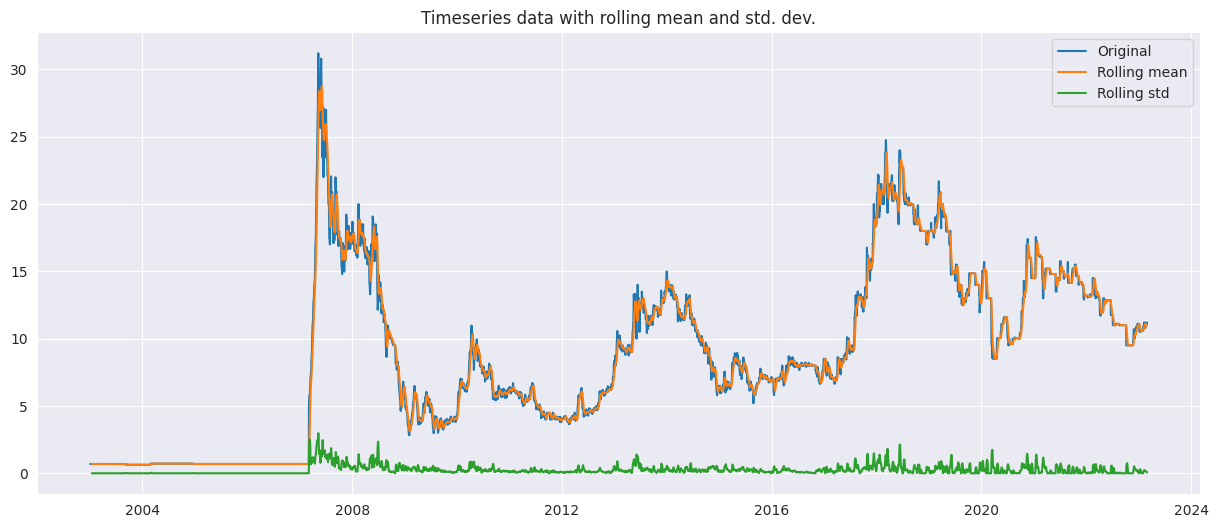

NASCON p-value: 0.06256930134911051


In [170]:
# actual stock closeprice in-view
nascon_data = final_tsdata[['NASCON_CLOSEPRICE']]

# funtion to check the stationariy by visualization and adftest
def test_stationarity(timeseries):
    stock_sym = 'NASCON'

    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    orig = plt.plot(timeseries, label='Original')
    mean = plt.plot(rolmean, label='Rolling mean')
    std = plt.plot(rolstd, label='Rolling std')

    plt.legend(loc='best')
    plt.title('Timeseries data with rolling mean and std. dev.')
    plt.show()

    adftest = adfuller(timeseries)
    print(f'{stock_sym} p-value:', adftest[1])

test_stationarity(nascon_data)

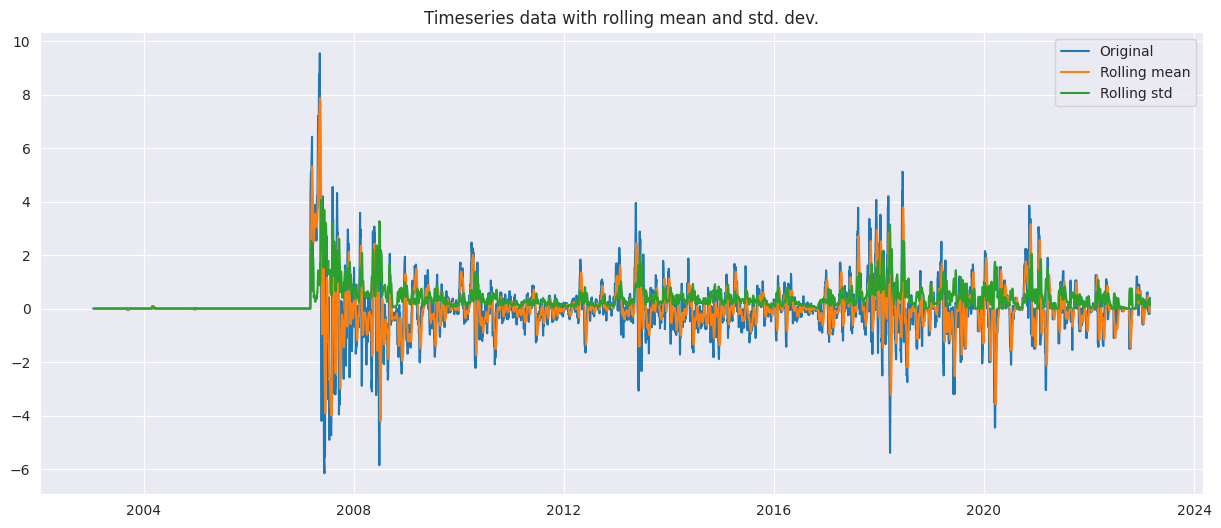

NASCON p-value: 4.12666435889119e-17


In [171]:
nascon_data_diff = nascon_data.diff(periods=12)
test_stationarity(nascon_data_diff.dropna())

### nestle
oando, okomuoil, presco, nb, ncr, nesf, nigerians, nnfm

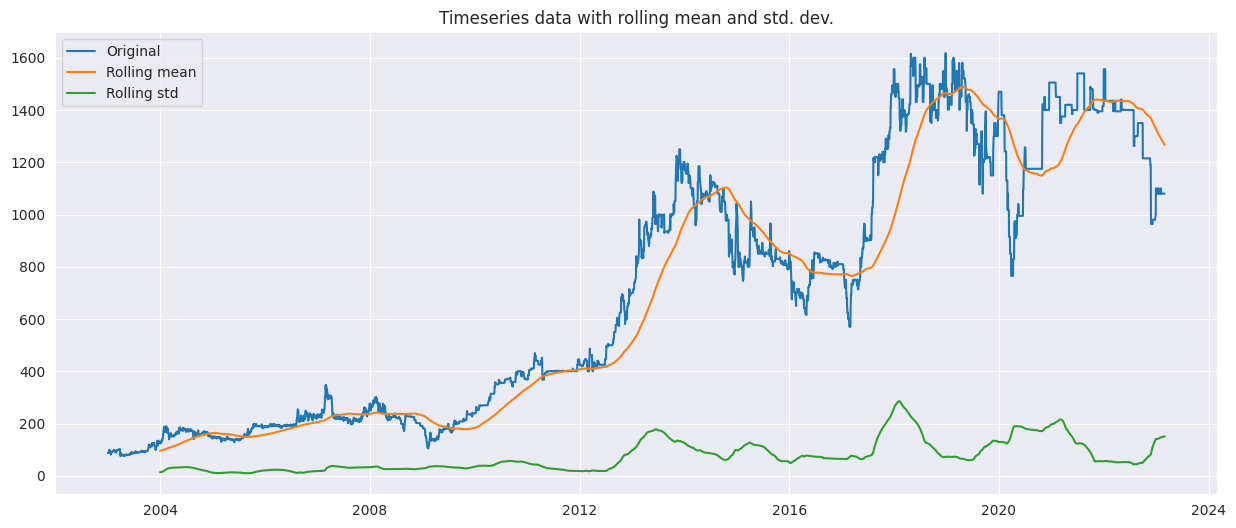

NESTLE p-value: 0.6288662897560299


In [172]:
# actual stock closeprice in-view
nestle_data = final_tsdata[['NESTLE_CLOSEPRICE']]

# funtion to check the stationariy by visualization and adftest
def test_stationarity(timeseries):
    stock_sym = 'NESTLE'

    rolmean = timeseries.rolling(window=365).mean()
    rolstd = timeseries.rolling(window=365).std()

    orig = plt.plot(timeseries, label='Original')
    mean = plt.plot(rolmean, label='Rolling mean')
    std = plt.plot(rolstd, label='Rolling std')

    plt.legend(loc='best')
    plt.title('Timeseries data with rolling mean and std. dev.')
    plt.show()

    adftest = adfuller(timeseries)
    print(f'{stock_sym} p-value:', adftest[1])

test_stationarity(nestle_data)

dataset

In [173]:
nestle_data.isna().sum()

NESTLE_CLOSEPRICE    0
dtype: int64

In [174]:
nestle_data_diff = nestle_data.diff(periods=365)
nestle_data_diff.dropna(inplace=True)

In [175]:
nestle_data_diff

NESTLE_CLOSEPRICE
DATE                         
2004-01-02          36.500000
2004-01-03          36.833333
2004-01-04          37.000000
2004-01-05          37.166667
2004-01-06          43.010000
...                       ...
2023-02-24        -354.700000
2023-02-25        -354.700000
2023-02-26        -354.700000
2023-02-27        -354.700000
2023-02-28        -354.700000

[6998 rows x 1 columns]

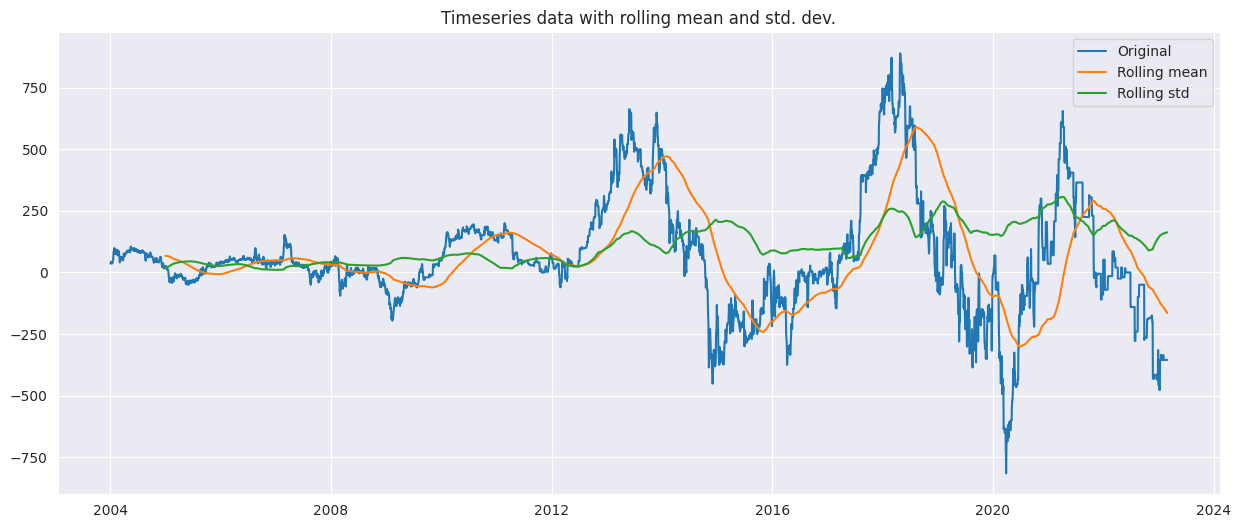

NESTLE p-value: 0.02267637167038508


In [176]:
test_stationarity(nestle_data_diff)

#### getting ARIMA hyperparameters

In [177]:
# import itertools

In [178]:
# train = nestle_data[:5890]
# test = nestle_data[5890:]

In [179]:
# p = range(0, 8)
# q = range(0, 8)
# d = range(0, 2)

In [180]:
# pdq_combination = list(itertools.product(p,d,q))

In [181]:
# len(pdq_combination)

In [182]:
# rmse = []
# order1 = []

In [183]:
# for pdq in pdq_combination:
#     try:
#         model = ARIMA(train, order=pdq).fit()
#         pred = model.predict(start=len(train), end=(len(nestle_data) - 1))
#         error = np.sqrt(mean_squared_error(test, pred))
#         order1.append(pdq)
#         rmse.append(error)

#     except:
#         continue

In [184]:
# result = pd.DataFrame()

normal data acf/pacf plot

In [185]:
# lag_acf = acf(nestle_data_diff, nlags=70)
# lag_pacf = pacf(nestle_data_diff, nlags=70)

# fig, ax = plt.subplots(1, 2, figsize=(20,5))

# plot_acf(lag_acf, ax=ax[0])
# plot_pacf(lag_pacf, ax=ax[1])

# plt.show()

In [186]:
# from statsmodels.tsa.arima.model import ARIMA
# from sklearn.model_selection import train_test_split

# model_arima = ARIMA(nestle_data['NESTLE_CLOSEPRICE'], order=(2, 2, 0))
# result = model_arima.fit()

# nestle_data['predict'] = result.predict(start='2003-01-02', end='2023-02-28', dynamic = True)
# nestle_data[['NESTLE_CLOSEPRICE', 'predict']].plot(figsize=(15, 6))

In [187]:
# model_sarimax = sm.tsa.statespace.SARIMAX(nestle_data['NESTLE_CLOSEPRICE'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
# sarimax_result = model_sarimax.fit()

# nestle_data['predict'] = sarimax_result.predict(start='2003-01-02', end='2023-02-28', dynamic = True)
# nestle_data[['NESTLE_CLOSEPRICE', 'predict']].plot(figsize=(15, 6))

## *** determine autoregressive & moving average 
(with acf and pacf)

## **** using facebook prophet

### NESTLE STOCKS

#### data explore

In [188]:
tsdata_copy[tsdata_copy['SYMBOL']=='NESTLE']

SYMBOL  CLOSEPRICE    Volume        Value  NoOfTransaction  \
DATE                                                                     
2003-01-02  NESTLE       87.50   18558.0   1618247.82              9.0   
2003-01-03  NESTLE       87.50   74372.0   6392010.00             25.0   
2003-01-06  NESTLE       88.00   43573.0   3833261.28             15.0   
2003-01-07  NESTLE       89.95   25111.0   2220633.75             23.0   
2003-01-08  NESTLE       89.50  129623.0  11574135.50             30.0   
...            ...         ...       ...          ...              ...   
2023-02-22  NESTLE     1080.30   17278.0  18911540.30             43.0   
2023-02-23  NESTLE     1080.30   51642.0  56991814.60             51.0   
2023-02-24  NESTLE     1080.30   22480.0  24739327.60             40.0   
2023-02-27  NESTLE     1080.30   18906.0  20796493.70             22.0   
2023-02-28  NESTLE     1080.30   49118.0  54172237.10             48.0   

            OpenPrice        EPS    PERatio          SECTOR  
DATE                                                         
2003-01-02        0.0   6.860000  12.755102  CONSUMER GOODS  
2003-01-03        0.0   6.860000  12.755102  CONSUMER GOODS  
2003-01-06        0.0   6.860000  12.827988  CONSUMER GOODS  
2003-01-07        0.0   6.860000  13.112245  CONSUMER GOODS  
2003-01-08        0.0   6.860000  13.046647  CONSUMER GOODS  
...               ...        ...        ...             ...  
2023-02-22     1080.3  41.305341  26.154003  CONSUMER GOODS  
2023-02-23     1080.3  41.305341  26.154003  CONSUMER GOODS  
2023-02-24     1080.3  41.305341  26.154003  CONSUMER GOODS  
2023-02-27     1080.3  41.305341  26.154003  CONSUMER GOODS  
2023-02-28     1080.3  41.305341  26.154003  CONSUMER GOODS  

[4992 rows x 9 columns]

In [189]:
nestle_stock = final_tsdata[['NESTLE_CLOSEPRICE','NESTLE_Volume','NESTLE_NoOfTransaction','NESTLE_OpenPrice','NESTLE_EPS','NESTLE_PERatio']].rename(columns={'NESTLE_CLOSEPRICE': 'Closeprice', 'NESTLE_Volume': 'Volume', 'NESTLE_NoOfTransaction': 'Nooftransaction', 'NESTLE_OpenPrice': 'Openprice', 'NESTLE_EPS': 'EPS', 'NESTLE_PERatio': 'Peratio'})
nestle_stock

Closeprice        Volume  Nooftransaction  Openprice        EPS  \
DATE                                                                           
2003-01-02    87.500000  18558.000000         9.000000        0.0   6.860000   
2003-01-03    87.500000  74372.000000        25.000000        0.0   6.860000   
2003-01-04    87.666667  64105.666667        21.666667        0.0   6.860000   
2003-01-05    87.833333  53839.333333        18.333333        0.0   6.860000   
2003-01-06    88.000000  43573.000000        15.000000        0.0   6.860000   
...                 ...           ...              ...        ...        ...   
2023-02-24  1080.300000  22480.000000        40.000000     1080.3  41.305341   
2023-02-25  1080.300000  21288.666667        34.000000     1080.3  41.305341   
2023-02-26  1080.300000  20097.333333        28.000000     1080.3  41.305341   
2023-02-27  1080.300000  18906.000000        22.000000     1080.3  41.305341   
2023-02-28  1080.300000  49118.000000        48.000000     1080.3  41.305341   

              Peratio  
DATE                   
2003-01-02  12.755102  
2003-01-03  12.755102  
2003-01-04  12.779397  
2003-01-05  12.803693  
2003-01-06  12.827988  
...               ...  
2023-02-24  26.154003  
2023-02-25  26.154003  
2023-02-26  26.154003  
2023-02-27  26.154003  
2023-02-28  26.154003  

[7363 rows x 6 columns]

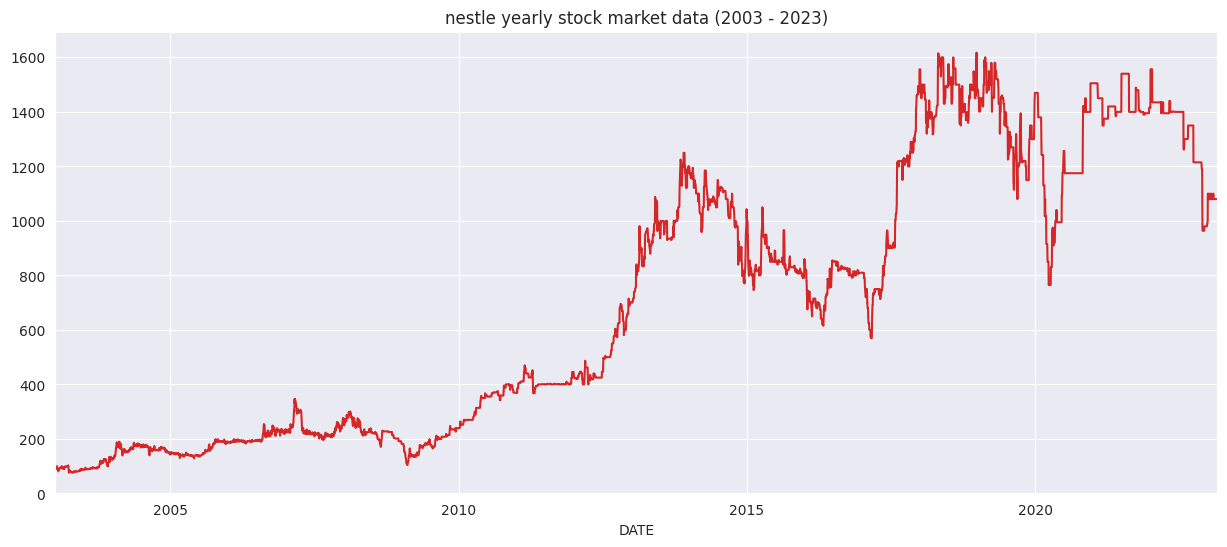

In [190]:
color_pal = sns.color_palette()
nestle_stock['Closeprice'].plot(ms=1,
                    color=color_pal[3],
                    title='nestle yearly stock market data (2003 - 2023)')

plt.show()

In [191]:
nestle_market = nestle_stock[['Closeprice']].reset_index() \
    .rename(columns={'DATE':'ds', 'Closeprice':'y'})
nestle_market

ds            y
0    2003-01-02    87.500000
1    2003-01-03    87.500000
2    2003-01-04    87.666667
3    2003-01-05    87.833333
4    2003-01-06    88.000000
...         ...          ...
7358 2023-02-24  1080.300000
7359 2023-02-25  1080.300000
7360 2023-02-26  1080.300000
7361 2023-02-27  1080.300000
7362 2023-02-28  1080.300000

[7363 rows x 2 columns]

#### modelling

In [192]:
m = Prophet(interval_width = 0.95, daily_seasonality=True)
model = m.fit(nestle_market)
future = m.make_future_dataframe(periods=0, freq='D')
forecast = m.predict(future)

06:21:27 - cmdstanpy - INFO - Chain [1] start processing
06:21:58 - cmdstanpy - INFO - Chain [1] done processing


In [193]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'daily',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [194]:
forecast.tail()

ds        trend   yhat_lower   yhat_upper  trend_lower  \
7358 2023-02-24  1289.249392  1109.528155  1457.027853  1289.249392   
7359 2023-02-25  1289.204099  1112.487904  1467.496957  1289.204099   
7360 2023-02-26  1289.158806  1105.612230  1457.938780  1289.158806   
7361 2023-02-27  1289.113512  1105.542241  1455.436528  1289.113512   
7362 2023-02-28  1289.068219  1099.649394  1456.358602  1289.068219   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
7358  1289.249392       -4.742452             -4.742452             -4.742452   
7359  1289.204099       -5.318650             -5.318650             -5.318650   
7360  1289.158806       -5.921002             -5.921002             -5.921002   
7361  1289.113512       -6.556043             -6.556043             -6.556043   
7362  1289.068219       -6.691421             -6.691421             -6.691421   

         daily  ...    weekly  weekly_lower  weekly_upper    yearly  \
7358 -2.579805  ...  0.720775      0.720775      0.720775 -2.883422   
7359 -2.579805  ...  0.254859      0.254859      0.254859 -2.993704   
7360 -2.579805  ... -0.213475     -0.213475     -0.213475 -3.127722   
7361 -2.579805  ... -0.681619     -0.681619     -0.681619 -3.294618   
7362 -2.579805  ... -0.608295     -0.608295     -0.608295 -3.503321   

      yearly_lower  yearly_upper  multiplicative_terms  \
7358     -2.883422     -2.883422                   0.0   
7359     -2.993704     -2.993704                   0.0   
7360     -3.127722     -3.127722                   0.0   
7361     -3.294618     -3.294618                   0.0   
7362     -3.503321     -3.503321                   0.0   

      multiplicative_terms_lower  multiplicative_terms_upper         yhat  
7358                         0.0                         0.0  1284.506940  
7359                         0.0                         0.0  1283.885449  
7360                         0.0                         0.0  1283.237803  
7361                         0.0                         0.0  1282.557470  
7362                         0.0                         0.0  1282.376799  

[5 rows x 22 columns]

In [195]:
forecast[['ds', 'yhat']]

ds         yhat
0    2003-01-02   115.543404
1    2003-01-03   116.327389
2    2003-01-04   115.877622
3    2003-01-05   115.238946
4    2003-01-06   114.426598
...         ...          ...
7358 2023-02-24  1284.506940
7359 2023-02-25  1283.885449
7360 2023-02-26  1283.237803
7361 2023-02-27  1282.557470
7362 2023-02-28  1282.376799

[7363 rows x 2 columns]

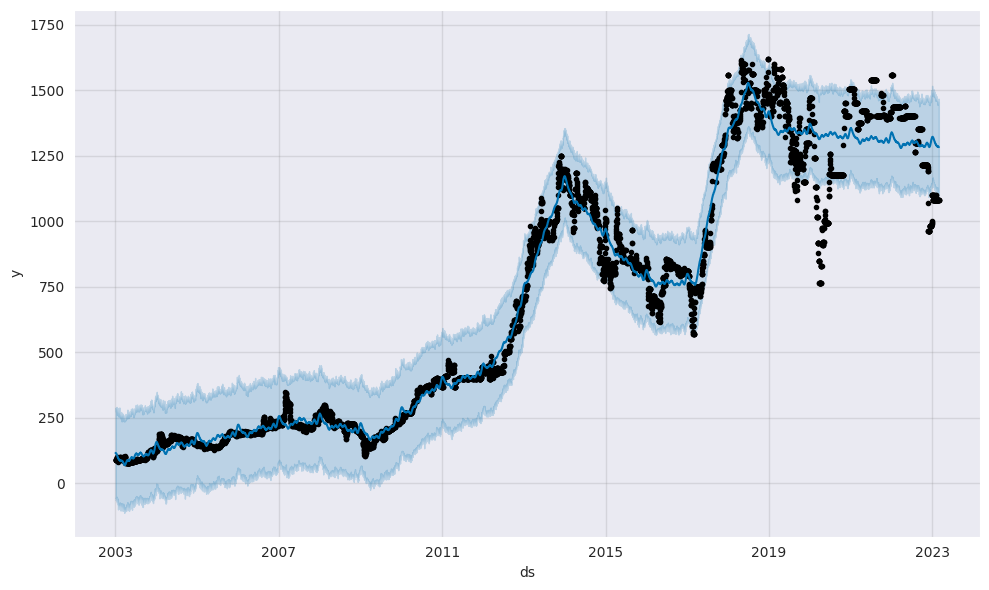

In [196]:
plot1 = m.plot(forecast)

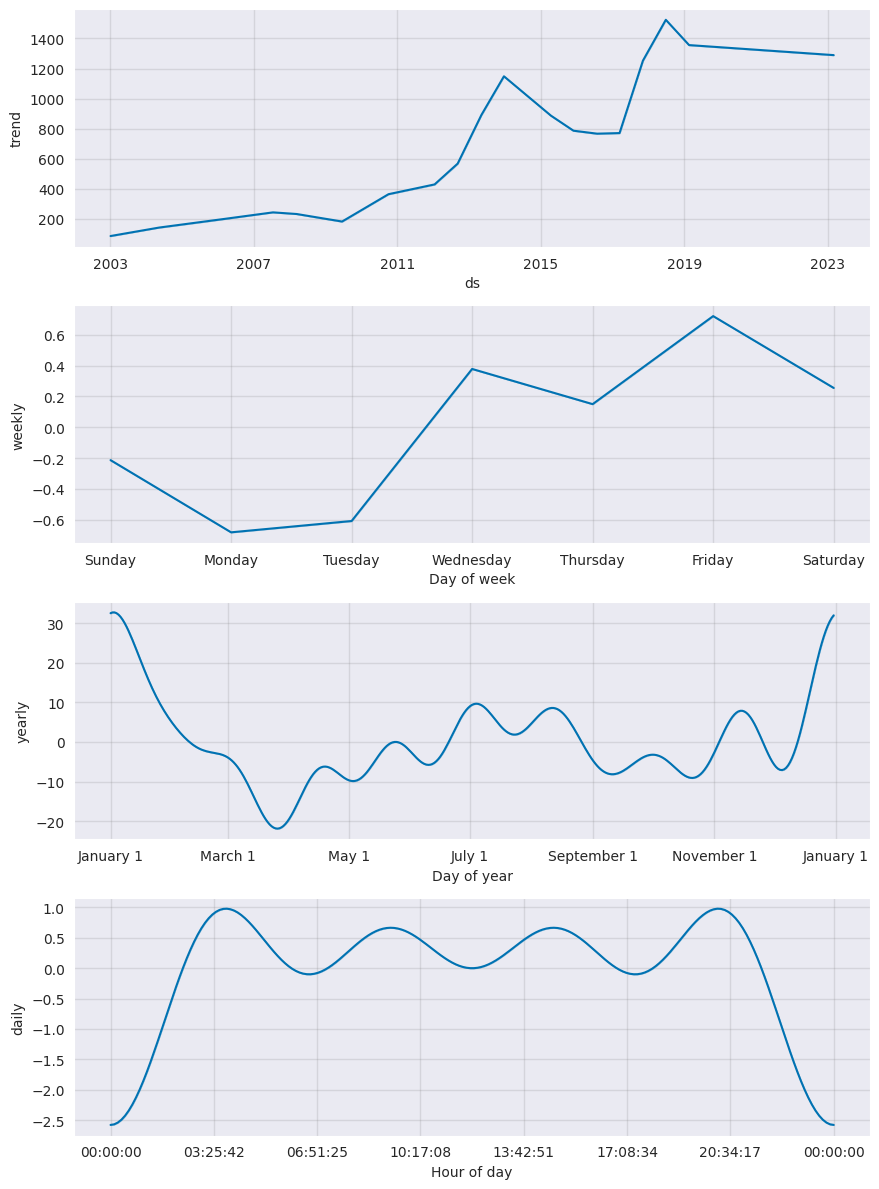

In [197]:
plot2 = m.plot_components(forecast)

#### metrics

In [198]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [199]:
mape_result = mean_absolute_percentage_error(nestle_market['y'], forecast['yhat'])
mse_result = mean_squared_error(nestle_market['y'], forecast['yhat'])
mae_result = mean_absolute_error(nestle_market['y'], forecast['yhat'])
print('MAE is: ', mae_result)
print('MSE is: ', mse_result)
print('MAPE is: ', mape_result)

MAE is:  57.68212592745686
MSE is:  7993.558863249247
MAPE is:  0.09394594840389532


### AIRTELAFRI STOCKS

#### data explore

In [200]:
tsdata_copy[tsdata_copy['SYMBOL']=='AIRTELAFRI']

SYMBOL  CLOSEPRICE    Volume        Value  NoOfTransaction  \
DATE                                                                         
2019-07-09  AIRTELAFRI       399.3  100110.0   39973923.0              7.0   
2019-07-10  AIRTELAFRI       359.4  579934.0  208429339.6            133.0   
2019-07-11  AIRTELAFRI       323.5  113242.0   36710904.2             47.0   
2019-07-12  AIRTELAFRI       323.5    2501.0     809073.5              4.0   
2019-07-15  AIRTELAFRI       323.5   21491.0    6678602.5             39.0   
...                ...         ...       ...          ...              ...   
2023-02-22  AIRTELAFRI      1620.0  603916.0  969692119.2             26.0   
2023-02-23  AIRTELAFRI      1620.0   81270.0  125897700.7             56.0   
2023-02-24  AIRTELAFRI      1620.0   68294.0  105322395.1             60.0   
2023-02-27  AIRTELAFRI      1620.0   65695.0  101822907.2             26.0   
2023-02-28  AIRTELAFRI      1620.0   86101.0  132165627.9             33.0   

            OpenPrice       EPS  PERatio SECTOR  
DATE                                             
2019-07-09        0.0  2.337381      0.0    ICT  
2019-07-10      399.3  2.337381      0.0    ICT  
2019-07-11      359.4  2.337381      0.0    ICT  
2019-07-12      323.5  2.337381      0.0    ICT  
2019-07-15      323.5  2.337381      0.0    ICT  
...               ...       ...      ...    ...  
2023-02-22     1620.0  2.337381      0.0    ICT  
2023-02-23     1620.0  2.337381      0.0    ICT  
2023-02-24     1620.0  2.337381      0.0    ICT  
2023-02-27     1620.0  2.337381      0.0    ICT  
2023-02-28     1620.0  2.337381      0.0    ICT  

[906 rows x 9 columns]

In [201]:
airtelafri_data = final_tsdata[['AIRTELAFRI_CLOSEPRICE','AIRTELAFRI_Volume','AIRTELAFRI_NoOfTransaction','AIRTELAFRI_OpenPrice','AIRTELAFRI_EPS','AIRTELAFRI_PERatio']].rename(columns={'AIRTELAFRI_CLOSEPRICE': 'Closeprice', 'AIRTELAFRI_Volume': 'Volume', 'AIRTELAFRI_NoOfTransaction': 'Nooftransaction', 'AIRTELAFRI_OpenPrice': 'Openprice', 'AIRTELAFRI_EPS': 'EPS', 'AIRTELAFRI_PERatio': 'Peratio'})
airtelafri_data.iloc[6020:6032]

Closeprice  Volume  Nooftransaction  Openprice  EPS  Peratio
DATE                                                                    
2019-06-27         0.0     0.0              0.0        0.0  0.0      0.0
2019-06-28         0.0     0.0              0.0        0.0  0.0      0.0
2019-06-29         0.0     0.0              0.0        0.0  0.0      0.0
2019-06-30         0.0     0.0              0.0        0.0  0.0      0.0
2019-07-01         0.0     0.0              0.0        0.0  0.0      0.0
2019-07-02         0.0     0.0              0.0        0.0  0.0      0.0
2019-07-03         0.0     0.0              0.0        0.0  0.0      0.0
2019-07-04         0.0     0.0              0.0        0.0  0.0      0.0
2019-07-05         0.0     0.0              0.0        0.0  0.0      0.0
2019-07-06         0.0     0.0              0.0        0.0  0.0      0.0
2019-07-07         0.0     0.0              0.0        0.0  0.0      0.0
2019-07-08         0.0     0.0              0.0        0.0  0.0      0.0

In [202]:
airtelafri_data.drop(airtelafri_data.index[:6032], inplace=True)

In [203]:
airtelafri_data

Closeprice         Volume  Nooftransaction  Openprice       EPS  \
DATE                                                                          
2019-07-09       399.3  100110.000000         7.000000        0.0  2.337381   
2019-07-10       359.4  579934.000000       133.000000      399.3  2.337381   
2019-07-11       323.5  113242.000000        47.000000      359.4  2.337381   
2019-07-12       323.5    2501.000000         4.000000      323.5  2.337381   
2019-07-13       323.5    8831.000000        15.666667      323.5  2.337381   
...                ...            ...              ...        ...       ...   
2023-02-24      1620.0   68294.000000        60.000000     1620.0  2.337381   
2023-02-25      1620.0   67427.666667        48.666667     1620.0  2.337381   
2023-02-26      1620.0   66561.333333        37.333333     1620.0  2.337381   
2023-02-27      1620.0   65695.000000        26.000000     1620.0  2.337381   
2023-02-28      1620.0   86101.000000        33.000000     1620.0  2.337381   

            Peratio  
DATE                 
2019-07-09      0.0  
2019-07-10      0.0  
2019-07-11      0.0  
2019-07-12      0.0  
2019-07-13      0.0  
...             ...  
2023-02-24      0.0  
2023-02-25      0.0  
2023-02-26      0.0  
2023-02-27      0.0  
2023-02-28      0.0  

[1331 rows x 6 columns]

In [204]:
airtel_market = airtelafri_data[['Closeprice']].reset_index() \
    .rename(columns={'DATE':'ds', 'Closeprice':'y'})
airtel_market

ds       y
0    2019-07-09   399.3
1    2019-07-10   359.4
2    2019-07-11   323.5
3    2019-07-12   323.5
4    2019-07-13   323.5
...         ...     ...
1326 2023-02-24  1620.0
1327 2023-02-25  1620.0
1328 2023-02-26  1620.0
1329 2023-02-27  1620.0
1330 2023-02-28  1620.0

[1331 rows x 2 columns]

In [205]:
airtel_market['ds'] = pd.to_datetime(airtel_market['ds'])

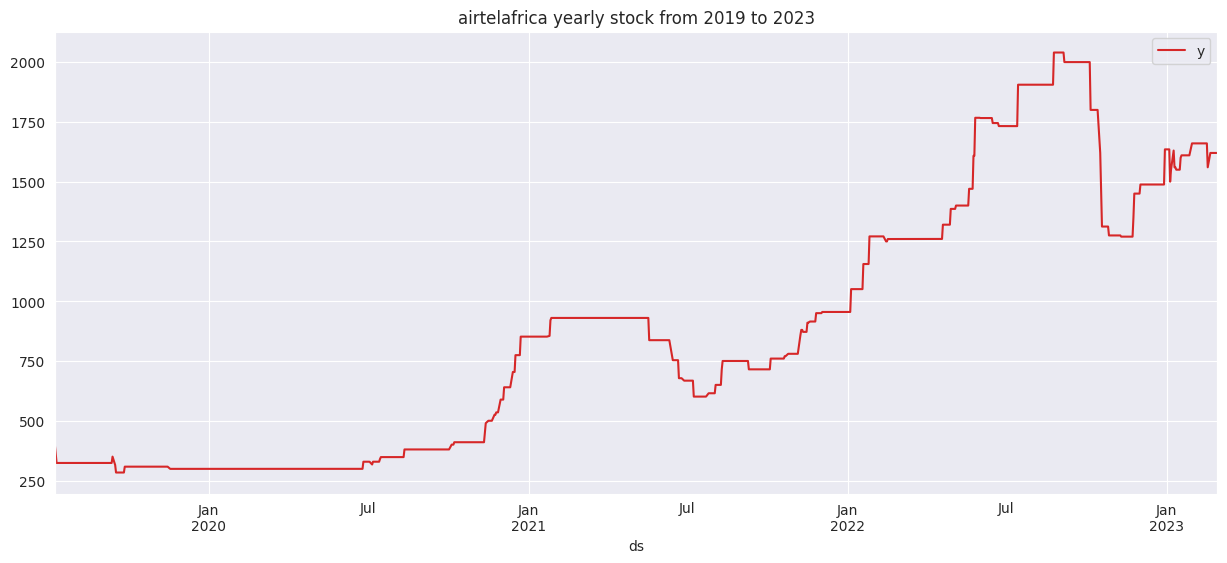

In [206]:
color_pal = sns.color_palette()
airtel_market.plot(x='ds',
                    y='y',
                    ms=1,
                    color=color_pal[3],
                    title='airtelafrica yearly stock from 2019 to 2023')

plt.show()

In [207]:
len(airtel_market)

1331

#### modelling

In [208]:
# train, test split
train_airtel = airtel_market.iloc[:len(airtel_market)-365]
test_airtel = airtel_market.iloc[len(airtel_market)-365:]

In [209]:
am = Prophet(interval_width=0.94, daily_seasonality=True)
airtel_model = am.fit(train_airtel)
future = am.make_future_dataframe(periods=365, freq='D')
forecast_airtel = am.predict(future)

06:23:21 - cmdstanpy - INFO - Chain [1] start processing
06:23:25 - cmdstanpy - INFO - Chain [1] done processing


In [210]:
airtel_model.component_modes

{'additive': ['yearly',
  'weekly',
  'daily',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [211]:
forecast_airtel.tail()

ds        trend  yhat_lower   yhat_upper  trend_lower  \
1326 2023-02-24  1996.753990  490.439936  3410.518477   414.669808   
1327 2023-02-25  1998.963308  499.039525  3401.404884   411.494032   
1328 2023-02-26  2001.172626  483.262747  3427.656953   408.318256   
1329 2023-02-27  2003.381944  495.559413  3424.609933   405.142480   
1330 2023-02-28  2005.591261  471.341521  3441.458804   401.966704   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
1326  3323.513446       75.515836             75.515836             75.515836   
1327  3330.033474       74.681177             74.681177             74.681177   
1328  3336.835754       74.131019             74.131019             74.131019   
1329  3346.149637       73.815940             73.815940             73.815940   
1330  3355.463520       75.217776             75.217776             75.217776   

          daily  ...    weekly  weekly_lower  weekly_upper     yearly  \
1326 -10.392814  ...  0.671883      0.671883      0.671883  85.236768   
1327 -10.392814  ...  0.003354      0.003354      0.003354  85.070637   
1328 -10.392814  ... -0.651111     -0.651111     -0.651111  85.174944   
1329 -10.392814  ... -1.345496     -1.345496     -1.345496  85.554250   
1330 -10.392814  ... -0.595653     -0.595653     -0.595653  86.206243   

      yearly_lower  yearly_upper  multiplicative_terms  \
1326     85.236768     85.236768                   0.0   
1327     85.070637     85.070637                   0.0   
1328     85.174944     85.174944                   0.0   
1329     85.554250     85.554250                   0.0   
1330     86.206243     86.206243                   0.0   

      multiplicative_terms_lower  multiplicative_terms_upper         yhat  
1326                         0.0                         0.0  2072.269827  
1327                         0.0                         0.0  2073.644485  
1328                         0.0                         0.0  2075.303645  
1329                         0.0                         0.0  2077.197883  
1330                         0.0                         0.0  2080.809037  

[5 rows x 22 columns]

In [212]:
forecast_airtel[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds         yhat  yhat_lower   yhat_upper
1326 2023-02-24  2072.269827  490.439936  3410.518477
1327 2023-02-25  2073.644485  499.039525  3401.404884
1328 2023-02-26  2075.303645  483.262747  3427.656953
1329 2023-02-27  2077.197883  495.559413  3424.609933
1330 2023-02-28  2080.809037  471.341521  3441.458804

In [213]:
test_airtel.tail()

ds       y
1326 2023-02-24  1620.0
1327 2023-02-25  1620.0
1328 2023-02-26  1620.0
1329 2023-02-27  1620.0
1330 2023-02-28  1620.0

In [214]:
plot_plotly(am, forecast_airtel)

In [215]:
plot_components_plotly(am, forecast_airtel)

#### metric evaluation

In [216]:
from statsmodels.tools.eval_measures import rmse

In [217]:
predictions = forecast_airtel.iloc[-365:]['yhat']

In [218]:
print('Root Mean Square Error between actual and predicted values: ', rmse(predictions,test_airtel['y']))
print('Mean value of test dataset: ', test_airtel['y'].mean())

Root Mean Square Error between actual and predicted values:  326.0965484747671
Mean value of test dataset:  1599.2378082191783


In [219]:
mape = mean_absolute_percentage_error(airtel_market['y'], forecast_airtel['yhat'])
mse = mean_squared_error(airtel_market['y'], forecast_airtel['yhat'])
mae = mean_absolute_error(airtel_market['y'], forecast_airtel['yhat'])
print('MAE is: ', mae)
print('MSE is: ', mse)
print('MAPE is: ', mape)

MAE is:  93.38047732999577
MSE is:  29582.718090165487
MAPE is:  0.07187473963784693


# 5. FEATURE ENGINEERING
  * time-based features to identify any external factors (e.g macroeconomics indicators) that might influence the stock prices and include them as additional features if relevant
    * day of the week
    * geographical componenets (e.g holiday)
  
  * Lag features

# 6. MODEL SELECTION AND BUILDING
  * depending on the characteristics of the data, use time series models or techniques like,
    * ARIMA
    * SARIMA
    * SARIMAX (multivariate variable)
    * LSTM
  
  * train multiple models for different stocks & select on with the best performance on evaluation

# 7. MODEL EVALUATION
  * split data into train & test (or cross validation) to evaluate model performance of unseen data
  * use appropriate metrics (MSE, MAE, etc) for model accuracy

# 8. FORECASTING
  * after selecting the best models, use it to make future prediction for each stock's price
  * visualize the forecast alongside the actual data to access model performance

# 9. SECTOR-WISE ANALYSIS
  * perfom seperate analysis for stocks belonging to different sectors to identify sector specific trends & patterns
  * compare performance & behaviour of stocks with each sector